In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv("weekly_consumption.csv")

## KNN

In [3]:
# Dictionary to store models for each EAN
knn_models = {}
knn_rmse_values = {}  # Dictionary to store RMSE per EAN

# Train a KNN model for each EAN
for ean in df["EAN"].unique():
    ean_data = df[df["EAN"] == ean]  # Filter data for specific EAN

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Split into features (X) and target (y)
    X = ean_data[["Lag_1", "Lag_2"]]  # Use lagged values as features
    y = ean_data["Total_Weekly_Consumption"]

    # Train-test split (keep last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Train KNN model
    knn_model = KNeighborsRegressor(n_neighbors=5)  # Default number of neighbors
    knn_model.fit(X_train, y_train)

    # Store model
    knn_models[ean] = knn_model

    # Predict and evaluate
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for this EAN
    knn_rmse_values[ean] = rmse

    print(f"EAN {ean} - KNN RMSE: {rmse:.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 1.0 - KNN RMSE: 0.0000
EAN 1013544381015.0 - KNN RMSE: 0.7574
EAN 1019421978364.0 - KNN RMSE: 0.0000
EAN 1024008213369.0 - KNN RMSE: 0.0000
EAN 1037601770462.0 - KNN RMSE: 0.0000
EAN 1042777655048.0 - KNN RMSE: 0.0000
EAN 1048540093755.0 - KNN RMSE: 0.0000
EAN 105685965293.0 - KNN RMSE: 0.0000
EAN 1062816480982.0 - KNN RMSE: 0.0000
EAN 1067813910580.0 - KNN RMSE: 0.0000
EAN 1075583423021.0 - KNN RMSE: 0.0000
EAN 1075822791015.0 - KNN RMSE: 0.0677
EAN 10884521517615.0 - KNN RMSE: 0.2336
EAN 10884524001043.0 - KNN RMSE: 0.0838
EAN 1162050286616.0 - KNN RMSE: 0.0000
EAN 118057573160.0 - KNN RMSE: 0.0242
EAN 1180575731602.0 - KNN RMSE: 0.0000
EAN 120705031062846.0 - KNN RMSE: 0.0000
EAN 1240386749345.0 - KNN RMSE: 0.0000
EAN 1277815980024.0 - KNN RMSE: 0.0000
EAN 1278912292463.0 - KNN RMSE: 0.0000
EAN 1284383292626.0 - KNN RMSE: 0.0000
EAN 1308327941400.0 - KNN RMSE: 0.0000
EAN 13661522031237.0 - KNN RMSE: 0.0000
EAN 1373933301655.0 - KNN RMSE: 0.0000
EAN 1383480568724.0 - KNN RMSE: 0.

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 14026704196156.0 - KNN RMSE: 0.0000
EAN 1412759868947.0 - KNN RMSE: 0.0000
EAN 1450516242969.0 - KNN RMSE: 0.0000
EAN 1464489984489.0 - KNN RMSE: 0.0000
EAN 1464675065289.0 - KNN RMSE: 0.0000
EAN 1470194808801.0 - KNN RMSE: 0.0000
EAN 1497123284245.0 - KNN RMSE: 0.0000
EAN 15060179631070.0 - KNN RMSE: 0.0570
EAN 15060179631087.0 - KNN RMSE: 0.0661
EAN 15060179631094.0 - KNN RMSE: 0.0494
EAN 15060179631100.0 - KNN RMSE: 0.0346
EAN 15060179631117.0 - KNN RMSE: 0.0294
EAN 15060179631124.0 - KNN RMSE: 0.0234
EAN 15060179631131.0 - KNN RMSE: 0.0319
EAN 15060179631148.0 - KNN RMSE: 0.0473
EAN 15060179631162.0 - KNN RMSE: 0.0407
EAN 15060179631186.0 - KNN RMSE: 0.0425
EAN 15060179633036.0 - KNN RMSE: 0.0576
EAN 15060179633043.0 - KNN RMSE: 0.1109
EAN 1507939511661.0 - KNN RMSE: 0.0000
EAN 1510782023292.0 - KNN RMSE: 0.0000
EAN 1531499223651.0 - KNN RMSE: 0.0000
EAN 1542326273160.0 - KNN RMSE: 0.0000
EAN 1546615419003.0 - KNN RMSE: 0.0242
EAN 1589831494629.0 - KNN RMSE: 0.0000
EAN 15962609

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 1609748113961.0 - KNN RMSE: 0.1055
EAN 1639645577800.0 - KNN RMSE: 0.0000
EAN 1688332222694.0 - KNN RMSE: 0.0000
EAN 1688646685289.0 - KNN RMSE: 0.0000
EAN 1712335957988.0 - KNN RMSE: 0.0000
EAN 1718200620073.0 - KNN RMSE: 0.0000
EAN 1738185596114.0 - KNN RMSE: 0.0372
EAN 175567822234.0 - KNN RMSE: 0.0000
EAN 1755678222341.0 - KNN RMSE: 0.0000
EAN 1761479344353.0 - KNN RMSE: 0.0000
EAN 1767499572952.0 - KNN RMSE: 0.0000
EAN 1771027390060.0 - KNN RMSE: 0.0000
EAN 1780331720899.0 - KNN RMSE: 0.0000
EAN 1800607202019.0 - KNN RMSE: 0.1438
EAN 1803681209421.0 - KNN RMSE: 0.0048
EAN 1813728385993.0 - KNN RMSE: 0.0000
EAN 1832848366992.0 - KNN RMSE: 0.0000
EAN 1855444883471.0 - KNN RMSE: 0.0000
EAN 1873020083400.0 - KNN RMSE: 0.0000
EAN 1897429578232.0 - KNN RMSE: 0.3771
EAN 1909219356360.0 - KNN RMSE: 0.0000
EAN 1915860909735.0 - KNN RMSE: 0.0000
EAN 1922560030028.0 - KNN RMSE: 0.0000


C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 1933851131207.0 - KNN RMSE: 0.0000
EAN 1943002619665.0 - KNN RMSE: 0.0000
EAN 1948160534256.0 - KNN RMSE: 0.0435
EAN 1982573136792.0 - KNN RMSE: 0.0000
EAN 2015475403957.0 - KNN RMSE: 0.0000
EAN 2016298661814.0 - KNN RMSE: 0.0000
EAN 2057926715649.0 - KNN RMSE: 0.0000
EAN 20705031062846.0 - KNN RMSE: 0.0171
EAN 2100071898239.0 - KNN RMSE: 0.0435
EAN 2104743992026.0 - KNN RMSE: 0.0241
EAN 2120360805884.0 - KNN RMSE: 0.0106
EAN 2123423898713.0 - KNN RMSE: 0.0000
EAN 21348801.0 - KNN RMSE: 0.0913
EAN 2135291832239.0 - KNN RMSE: 0.0223
EAN 215010.0 - KNN RMSE: 0.0188
EAN 215030.0 - KNN RMSE: 0.0156
EAN 215050.0 - KNN RMSE: 0.0156
EAN 2170932740099.0 - KNN RMSE: 0.0000
EAN 2190959690786.0 - KNN RMSE: 0.0000
EAN 21909596907862.0 - KNN RMSE: 0.0000
EAN 2194804352794.0 - KNN RMSE: 0.0000
EAN 2205180031087.0 - KNN RMSE: 0.0000
EAN 2230755547328.0 - KNN RMSE: 0.0145
EAN 2249239599551.0 - KNN RMSE: 0.0919
EAN 2257004538693.0 - KNN RMSE: 0.0000


C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 2279203890392.0 - KNN RMSE: 0.0000
EAN 23010817.0 - KNN RMSE: 0.0000
EAN 23013617.0 - KNN RMSE: 0.0000
EAN 2345698653587.0 - KNN RMSE: 0.0000
EAN 2351360560010.0 - KNN RMSE: 0.0000
EAN 2374587069991.0 - KNN RMSE: 0.0580
EAN 2398759984045.0 - KNN RMSE: 0.0865
EAN 2414340286503.0 - KNN RMSE: 0.0000
EAN 2420420509598.0 - KNN RMSE: 0.0000
EAN 2422238865434.0 - KNN RMSE: 0.0000
EAN 2468949508711.0 - KNN RMSE: 0.0116
EAN 2476057820077.0 - KNN RMSE: 0.0000
EAN 2509793612199.0 - KNN RMSE: 0.0792
EAN 2590927262825.0 - KNN RMSE: 0.0000
EAN 2632325282942.0 - KNN RMSE: 0.0000
EAN 2637364127826.0 - KNN RMSE: 0.0000
EAN 2655604760568.0 - KNN RMSE: 0.0099
EAN 2665843859264.0 - KNN RMSE: 0.0000
EAN 2713762021156.0 - KNN RMSE: 0.0000
EAN 2716291861999.0 - KNN RMSE: 0.0000
EAN 27290115922480.0 - KNN RMSE: 0.0070
EAN 27290115922503.0 - KNN RMSE: 0.0000
EAN 27290115922671.0 - KNN RMSE: 0.0070
EAN 2730445327374.0 - KNN RMSE: 0.8976
EAN 2757317910415.0 - KNN RMSE: 0.0000
EAN 2768878583544.0 - KNN RMSE: 

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 2774774050368.0 - KNN RMSE: 0.0000
EAN 2775651577713.0 - KNN RMSE: 0.0281
EAN 2779058193006.0 - KNN RMSE: 0.0000
EAN 2782562241641.0 - KNN RMSE: 0.0000
EAN 279293086221.0 - KNN RMSE: 0.0000
EAN 2797828264419.0 - KNN RMSE: 0.0000
EAN 28058090002400.0 - KNN RMSE: 0.3828
EAN 28058090002554.0 - KNN RMSE: 0.2452
EAN 2807785812708.0 - KNN RMSE: 0.0000
EAN 2807933159895.0 - KNN RMSE: 0.0000
EAN 2813566598125.0 - KNN RMSE: 0.0000
EAN 2835848657230.0 - KNN RMSE: 0.0000
EAN 2842773854504.0 - KNN RMSE: 0.0677
EAN 2856801777388.0 - KNN RMSE: 0.0435
EAN 2856973590110.0 - KNN RMSE: 0.0000
EAN 2859256765910.0 - KNN RMSE: 0.0000
EAN 2894756090239.0 - KNN RMSE: 0.0000
EAN 2905918145137.0 - KNN RMSE: 0.1054
EAN 2918720758953.0 - KNN RMSE: 0.0000
EAN 2952975683126.0 - KNN RMSE: 0.0000
EAN 2962705136569.0 - KNN RMSE: 0.0000
EAN 299778137097.0 - KNN RMSE: 0.0260
EAN 3000895104585.0 - KNN RMSE: 0.0857
EAN 3053241502053.0 - KNN RMSE: 0.0145
EAN 3058895722676.0 - KNN RMSE: 0.0000
EAN 30705031040094.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 30705031056989.0 - KNN RMSE: 0.0099
EAN 30705031086610.0 - KNN RMSE: 0.3236
EAN 30705031098835.0 - KNN RMSE: 0.2513
EAN 30705031104253.0 - KNN RMSE: 0.8097
EAN 30705031113170.0 - KNN RMSE: 0.3554
EAN 30705031114207.0 - KNN RMSE: 0.5988
EAN 30705031114214.0 - KNN RMSE: 0.2513
EAN 30705031114221.0 - KNN RMSE: 0.0000
EAN 30705031114252.0 - KNN RMSE: 0.2513
EAN 30705031115488.0 - KNN RMSE: 0.2514
EAN 30705031116553.0 - KNN RMSE: 0.0070
EAN 30705031119400.0 - KNN RMSE: 0.0838
EAN 30705031120871.0 - KNN RMSE: 0.0000
EAN 30705031120925.0 - KNN RMSE: 0.2514
EAN 30705031238941.0 - KNN RMSE: 0.0070
EAN 30705031238965.0 - KNN RMSE: 0.4267
EAN 30705031239047.0 - KNN RMSE: 0.2513
EAN 30705031239191.0 - KNN RMSE: 0.6276
EAN 30705031242122.0 - KNN RMSE: 0.0000
EAN 3071861206784.0 - KNN RMSE: 0.0076
EAN 309755102584.0 - KNN RMSE: 0.1499
EAN 3097551025843.0 - KNN RMSE: 0.0000


C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 309817319436.0 - KNN RMSE: 0.0000
EAN 3098173194362.0 - KNN RMSE: 0.0000
EAN 3100200724683.0 - KNN RMSE: 0.0000
EAN 3103870996300.0 - KNN RMSE: 0.0000
EAN 3112218932935.0 - KNN RMSE: 0.0000
EAN 3133662344773.0 - KNN RMSE: 0.0000
EAN 3158659879643.0 - KNN RMSE: 0.0000
EAN 3161869955261.0 - KNN RMSE: 0.0000
EAN 3181772299845.0 - KNN RMSE: 0.0000
EAN 3182550711050.0 - KNN RMSE: 0.0000
EAN 3182550711159.0 - KNN RMSE: 0.0097
EAN 3182550711166.0 - KNN RMSE: 0.0093
EAN 3182550771054.0 - KNN RMSE: 0.0451
EAN 3182550771207.0 - KNN RMSE: 0.0392
EAN 3182550771252.0 - KNN RMSE: 0.0195
EAN 3182550771337.0 - KNN RMSE: 0.0460
EAN 3182550858854.0 - KNN RMSE: 0.0000
EAN 3182550939218.0 - KNN RMSE: 0.0174
EAN 3182550940528.0 - KNN RMSE: 0.0155
EAN 3182550940580.0 - KNN RMSE: 0.0126
EAN 3182550940849.0 - KNN RMSE: 0.0349
EAN 3188546942934.0 - KNN RMSE: 0.0000
EAN 3189886286716.0 - KNN RMSE: 0.0048
EAN 3190181046656.0 - KNN RMSE: 0.0000
EAN 3192951509759.0 - KNN RMSE: 0.0000


C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3257287493844.0 - KNN RMSE: 0.0000
EAN 3272963066588.0 - KNN RMSE: 0.0000
EAN 3274271001036.0 - KNN RMSE: 0.0171
EAN 3286498723652.0 - KNN RMSE: 0.0000
EAN 3308532772567.0 - KNN RMSE: 0.0014
EAN 3318799177516.0 - KNN RMSE: 0.0000
EAN 3358464175796.0 - KNN RMSE: 0.0097
EAN 3372085279956.0 - KNN RMSE: 0.0193
EAN 3389360008923.0 - KNN RMSE: 0.1250
EAN 3389360008930.0 - KNN RMSE: 0.1919
EAN 3393804635757.0 - KNN RMSE: 0.0000
EAN 3400892013909.0 - KNN RMSE: 0.1014
EAN 3400892625171.0 - KNN RMSE: 0.0474
EAN 3400921730296.0 - KNN RMSE: 0.0554
EAN 3400921843750.0 - KNN RMSE: 0.0070
EAN 3400930038055.0 - KNN RMSE: 0.0864
EAN 3400930045220.0 - KNN RMSE: 0.0070
EAN 3400930092637.0 - KNN RMSE: 0.0095
EAN 3400930099001.0 - KNN RMSE: 0.0070
EAN 3400930168370.0 - KNN RMSE: 0.0000
EAN 3400930168400.0 - KNN RMSE: 0.0000
EAN 3400930206454.0 - KNN RMSE: 0.0631
EAN 3400930206461.0 - KNN RMSE: 0.1840
EAN 34009302151280.0 - KNN RMSE: 0.0000
EAN 3400930267219.0 - KNN RMSE: 0.1013
EAN 3400930484500.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 34009308537950.0 - KNN RMSE: 0.0000
EAN 3400930870365.0 - KNN RMSE: 0.0073
EAN 3400930985830.0 - KNN RMSE: 0.0070
EAN 3400931087267.0 - KNN RMSE: 0.0080
EAN 3400931112433.0 - KNN RMSE: 0.0734
EAN 3400931136385.0 - KNN RMSE: 0.0269
EAN 3400931152705.0 - KNN RMSE: 0.0014
EAN 3400931157618.0 - KNN RMSE: 0.0813
EAN 3400931316947.0 - KNN RMSE: 0.0070
EAN 3400931828693.0 - KNN RMSE: 0.0416
EAN 3400931922827.0 - KNN RMSE: 0.0103
EAN 34009319228270.0 - KNN RMSE: 0.0000
EAN 3400931923138.0 - KNN RMSE: 0.0193
EAN 34009319231382.0 - KNN RMSE: 0.0000
EAN 3400931953173.0 - KNN RMSE: 0.0563
EAN 34009319531732.0 - KNN RMSE: 0.0000
EAN 3400931988014.0 - KNN RMSE: 0.0122
EAN 3400932070268.0 - KNN RMSE: 0.0215
EAN 3400932172146.0 - KNN RMSE: 0.0000
EAN 3400932299386.0 - KNN RMSE: 0.0140
EAN 3400932341641.0 - KNN RMSE: 0.0140
EAN 3400932459087.0 - KNN RMSE: 0.0000
EAN 3400932805433.0 - KNN RMSE: 0.0209
EAN 3400932862092.0 - KNN RMSE: 0.3602
EAN 3400932884506.0 - KNN RMSE: 0.0070
EAN 3400932953615.0 -

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3400934194788.0 - KNN RMSE: 0.0000
EAN 3400934213571.0 - KNN RMSE: 0.0070
EAN 3400934606182.0 - KNN RMSE: 0.1492
EAN 3400935073433.0 - KNN RMSE: 0.0000
EAN 3400935073723.0 - KNN RMSE: 0.0000
EAN 3400935201256.0 - KNN RMSE: 0.0367
EAN 3400935235145.0 - KNN RMSE: 0.0122
EAN 34009352351452.0 - KNN RMSE: 0.0000
EAN 3400935322982.0 - KNN RMSE: 0.0000
EAN 3400935445452.0 - KNN RMSE: 0.0114
EAN 3400935541185.0 - KNN RMSE: 0.7131
EAN 34009355411852.0 - KNN RMSE: 0.0000
EAN 3400935601360.0 - KNN RMSE: 0.0070
EAN 3400935847638.0 - KNN RMSE: 0.0070
EAN 3400935952936.0 - KNN RMSE: 0.0000
EAN 3400936075764.0 - KNN RMSE: 0.0000
EAN 3400936120112.0 - KNN RMSE: 0.0000
EAN 3400936206779.0 - KNN RMSE: 0.0000
EAN 3400936299801.0 - KNN RMSE: 0.0000
EAN 3400936300323.0 - KNN RMSE: 0.0668
EAN 3400936341074.0 - KNN RMSE: 0.0121
EAN 3400936678514.0 - KNN RMSE: 0.0000
EAN 3400936695481.0 - KNN RMSE: 0.0000
EAN 3400936863637.0 - KNN RMSE: 0.0168
EAN 3400937013413.0 - KNN RMSE: 0.0318
EAN 34009370134130.0 - 

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3400938022209.0 - KNN RMSE: 0.0070
EAN 3400938838336.0 - KNN RMSE: 0.0070
EAN 3400939215747.0 - KNN RMSE: 0.0073
EAN 3400939482316.0 - KNN RMSE: 0.0000
EAN 3400939827599.0 - KNN RMSE: 0.0000
EAN 3400941626913.0 - KNN RMSE: 0.0000
EAN 3400949757381.0 - KNN RMSE: 0.0000
EAN 3400949758791.0 - KNN RMSE: 0.0000
EAN 3400956311651.0 - KNN RMSE: 0.0000
EAN 3400957068974.0 - KNN RMSE: 0.0431
EAN 3401054069888.0 - KNN RMSE: 0.8734
EAN 3401144846443.0 - KNN RMSE: 0.0070
EAN 3401151738861.0 - KNN RMSE: 0.0099
EAN 3401160387715.0 - KNN RMSE: 0.0160
EAN 3401179221222.0 - KNN RMSE: 0.0187
EAN 3401196161747.0 - KNN RMSE: 0.0534
EAN 3401196492742.0 - KNN RMSE: 0.0200
EAN 3401196492971.0 - KNN RMSE: 0.0195
EAN 3401360266841.0 - KNN RMSE: 0.0000
EAN 3404115417517.0 - KNN RMSE: 0.0000
EAN 3411110003534.0 - KNN RMSE: 0.2660
EAN 3411110006191.0 - KNN RMSE: 0.1117
EAN 3411110033203.0 - KNN RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3411110033210.0 - KNN RMSE: 0.0137
EAN 3411110107348.0 - KNN RMSE: 0.0163
EAN 3411110107355.0 - KNN RMSE: 0.0140
EAN 3411111914365.0 - KNN RMSE: 0.3729
EAN 3411112027958.0 - KNN RMSE: 0.0416
EAN 3411112132096.0 - KNN RMSE: 0.0092
EAN 3411112168798.0 - KNN RMSE: 0.0140
EAN 3411112168811.0 - KNN RMSE: 0.0159
EAN 3411112251285.0 - KNN RMSE: 0.0000
EAN 3411112251377.0 - KNN RMSE: 0.0000
EAN 3411112264049.0 - KNN RMSE: 0.0106
EAN 3411112264100.0 - KNN RMSE: 0.0135
EAN 3411112961481.0 - KNN RMSE: 0.0101
EAN 3411112961740.0 - KNN RMSE: 0.0288
EAN 3411112961771.0 - KNN RMSE: 0.0162
EAN 3411112977291.0 - KNN RMSE: 0.0177
EAN 3411113007201.0 - KNN RMSE: 0.0212
EAN 3411113007225.0 - KNN RMSE: 0.0220
EAN 3411113007232.0 - KNN RMSE: 0.0518
EAN 3411113007256.0 - KNN RMSE: 0.0173
EAN 3411113021276.0 - KNN RMSE: 0.0311
EAN 3411113030537.0 - KNN RMSE: 0.0070
EAN 3411113030568.0 - KNN RMSE: 0.0070
EAN 3411113030605.0 - KNN RMSE: 0.0000
EAN 3411113101381.0 - KNN RMSE: 0.0346
EAN 3424051378148.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 34264416512.0 - KNN RMSE: 0.0640
EAN 3426441651233.0 - KNN RMSE: 0.0000
EAN 3442806995097.0 - KNN RMSE: 0.0000
EAN 3445116407667.0 - KNN RMSE: 0.0000
EAN 3456789098766.0 - KNN RMSE: 0.0000
EAN 3457298507451.0 - KNN RMSE: 0.0000
EAN 3471220606698.0 - KNN RMSE: 0.0000
EAN 3515650460465.0 - KNN RMSE: 0.0140
EAN 3515652002007.0 - KNN RMSE: 0.0156
EAN 3518646126611.0 - KNN RMSE: 0.0552
EAN 3532296736242.0 - KNN RMSE: 0.0000
EAN 3546225501997.0 - KNN RMSE: 0.0000
EAN 3550455474317.0 - KNN RMSE: 0.0000
EAN 3552791573944.0 - KNN RMSE: 1.5355
EAN 3552791910527.0 - KNN RMSE: 0.0755
EAN 3552792272501.0 - KNN RMSE: 0.0000
EAN 3552792272525.0 - KNN RMSE: 0.0000
EAN 3552793063009.0 - KNN RMSE: 0.0140
EAN 3552793063023.0 - KNN RMSE: 0.0275
EAN 3552793063047.0 - KNN RMSE: 0.0294
EAN 3552793063061.0 - KNN RMSE: 0.0211
EAN 3552793063085.0 - KNN RMSE: 0.0204
EAN 3552793063108.0 - KNN RMSE: 0.0407
EAN 3552793063122.0 - KNN RMSE: 0.0215
EAN 3552793069001.0 - KNN RMSE: 0.1127
EAN 3552793069025.0 - KNN R

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3552793072148.0 - KNN RMSE: 0.1490
EAN 3552793078010.0 - KNN RMSE: 0.0644
EAN 3552793078065.0 - KNN RMSE: 0.0110
EAN 3552793078119.0 - KNN RMSE: 0.0167
EAN 3552793078300.0 - KNN RMSE: 0.0070
EAN 3552793078348.0 - KNN RMSE: 0.0070
EAN 3553379035862.0 - KNN RMSE: 0.0000
EAN 3581735512559.0 - KNN RMSE: 0.0000
EAN 3597132000086.0 - KNN RMSE: 0.0000
EAN 3597132001458.0 - KNN RMSE: 0.0141
EAN 3597132001465.0 - KNN RMSE: 0.0121
EAN 3597132001472.0 - KNN RMSE: 0.0156
EAN 3597132001489.0 - KNN RMSE: 0.0126
EAN 3597132101110.0 - KNN RMSE: 0.0140
EAN 3597132103305.0 - KNN RMSE: 0.0000
EAN 3597132103404.0 - KNN RMSE: 0.0000
EAN 3597132106108.0 - KNN RMSE: 0.0000
EAN 3597132108034.0 - KNN RMSE: 0.0140
EAN 3597132201056.0 - KNN RMSE: 0.0070
EAN 3597132202213.0 - KNN RMSE: 0.0000
EAN 3597132216043.0 - KNN RMSE: 0.0070
EAN 3597133047790.0 - KNN RMSE: 0.0403
EAN 3597133071504.0 - KNN RMSE: 0.0193
EAN 3597133082531.0 - KNN RMSE: 0.0148
EAN 3597133086836.0 - KNN RMSE: 0.0755
EAN 3597133087673.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3597133097740.0 - KNN RMSE: 0.0070
EAN 3597133097832.0 - KNN RMSE: 0.0070
EAN 3597133099010.0 - KNN RMSE: 0.0000
EAN 3597133099027.0 - KNN RMSE: 0.0070
EAN 3597610007729.0 - KNN RMSE: 0.0819
EAN 3597610273360.0 - KNN RMSE: 0.0409
EAN 3597610277146.0 - KNN RMSE: 0.0000
EAN 3597610427367.0 - KNN RMSE: 0.1043
EAN 35976104273670.0 - KNN RMSE: 0.0000
EAN 3597610428951.0 - KNN RMSE: 0.0757
EAN 3605870000166.0 - KNN RMSE: 0.0000
EAN 3605870000296.0 - KNN RMSE: 0.0000
EAN 3605870000388.0 - KNN RMSE: 0.0000
EAN 3605870000517.0 - KNN RMSE: 0.0000
EAN 3605870001057.0 - KNN RMSE: 0.0000
EAN 3605870001101.0 - KNN RMSE: 0.0070
EAN 3605870001163.0 - KNN RMSE: 0.0000
EAN 3605870001309.0 - KNN RMSE: 0.0000
EAN 3605870001866.0 - KNN RMSE: 0.0000
EAN 3605870002313.0 - KNN RMSE: 0.0808
EAN 3605870002351.0 - KNN RMSE: 0.0014
EAN 3605874094468.0 - KNN RMSE: 0.0140
EAN 3605874173910.0 - KNN RMSE: 0.0000
EAN 3605874232020.0 - KNN RMSE: 0.0000
EAN 3605874350847.0 - KNN RMSE: 0.0000
EAN 3605874350854.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3605874565487.0 - KNN RMSE: 0.0070
EAN 3605874565494.0 - KNN RMSE: 0.0000
EAN 3605874615328.0 - KNN RMSE: 0.0000
EAN 3605877020815.0 - KNN RMSE: 0.0634
EAN 3605877309941.0 - KNN RMSE: 0.0000
EAN 3605877310060.0 - KNN RMSE: 0.0142
EAN 3605877310145.0 - KNN RMSE: 0.0221
EAN 3605877486413.0 - KNN RMSE: 0.0103
EAN 3613093196938.0 - KNN RMSE: 0.0000
EAN 3630486218564.0 - KNN RMSE: 0.0000
EAN 3646084345799.0 - KNN RMSE: 0.0000
EAN 3652305282037.0 - KNN RMSE: 0.3120
EAN 36523052820372.0 - KNN RMSE: 0.0000
EAN 3654899254980.0 - KNN RMSE: 0.2699
EAN 3660144118824.0 - KNN RMSE: 0.0000
EAN 3660176011582.0 - KNN RMSE: 0.0273
EAN 3660176011605.0 - KNN RMSE: 0.0249
EAN 3660176011636.0 - KNN RMSE: 0.0537
EAN 3660176011667.0 - KNN RMSE: 0.0150
EAN 3660176011704.0 - KNN RMSE: 0.0073
EAN 3660176011759.0 - KNN RMSE: 0.0071
EAN 3660176013371.0 - KNN RMSE: 0.0221
EAN 3660176013470.0 - KNN RMSE: 0.0270
EAN 3660176015313.0 - KNN RMSE: 0.0140
EAN 3660176015320.0 - KNN RMSE: 0.0140
EAN 3660176015580.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3660176017065.0 - KNN RMSE: 0.0101
EAN 3660176020102.0 - KNN RMSE: 0.0508
EAN 3660176020119.0 - KNN RMSE: 0.0099
EAN 3660176503223.0 - KNN RMSE: 0.0000
EAN 3660812099202.0 - KNN RMSE: 0.0000
EAN 3661103000174.0 - KNN RMSE: 0.0070
EAN 3661103002819.0 - KNN RMSE: 0.0000
EAN 3661103068723.0 - KNN RMSE: 0.0076
EAN 3664499000292.0 - KNN RMSE: 0.1427
EAN 3664499000353.0 - KNN RMSE: 0.0081
EAN 3666560026415.0 - KNN RMSE: 0.0000
EAN 3666560026422.0 - KNN RMSE: 0.0000
EAN 3669548909765.0 - KNN RMSE: 0.0000
EAN 3676975864464.0 - KNN RMSE: 0.0000
EAN 3683524019642.0 - KNN RMSE: 0.0000
EAN 37000085019250.0 - KNN RMSE: 0.0070
EAN 3700178223740.0 - KNN RMSE: 0.0751
EAN 3700178235903.0 - KNN RMSE: 0.0000
EAN 37002013036300.0 - KNN RMSE: 0.0070
EAN 37002013039200.0 - KNN RMSE: 0.0000
EAN 3700201304231.0 - KNN RMSE: 0.0000
EAN 3700454500800.0 - KNN RMSE: 0.0171
EAN 3700454501456.0 - KNN RMSE: 0.0000
EAN 3700454501555.0 - KNN RMSE: 0.0561
EAN 3700454501746.0 - KNN RMSE: 0.0000
EAN 3700454502378.0 - 

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3700454505058.0 - KNN RMSE: 0.0142
EAN 3700454505423.0 - KNN RMSE: 0.0288
EAN 3700454505447.0 - KNN RMSE: 0.1587
EAN 3700454505614.0 - KNN RMSE: 0.0509
EAN 3700454505621.0 - KNN RMSE: 0.0647
EAN 3700454505706.0 - KNN RMSE: 0.0421
EAN 3700454506512.0 - KNN RMSE: 0.0000
EAN 3700454506536.0 - KNN RMSE: 0.0221
EAN 3700454507151.0 - KNN RMSE: 0.0325
EAN 3700454507328.0 - KNN RMSE: 0.0070
EAN 3700454507502.0 - KNN RMSE: 0.0000
EAN 3700454507724.0 - KNN RMSE: 0.0097
EAN 3700454507755.0 - KNN RMSE: 0.0377
EAN 3700454550171.0 - KNN RMSE: 0.0508
EAN 3700454550355.0 - KNN RMSE: 0.0070
EAN 3700454550485.0 - KNN RMSE: 0.1074
EAN 3700567704379.0 - KNN RMSE: 0.5895
EAN 3700572800028.0 - KNN RMSE: 0.0070
EAN 3700572800035.0 - KNN RMSE: 0.0121
EAN 3701126705547.0 - KNN RMSE: 0.0433
EAN 37011267111074.0 - KNN RMSE: 0.0366
EAN 3701362101356.0 - KNN RMSE: 0.0214
EAN 3701541300181.0 - KNN RMSE: 0.0000
EAN 3701637286109.0 - KNN RMSE: 0.0000
EAN 3723618082180.0 - KNN RMSE: 0.1103
EAN 3760087151572.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3760098110209.0 - KNN RMSE: 0.0215
EAN 3760098110353.0 - KNN RMSE: 0.0140
EAN 3760098110476.0 - KNN RMSE: 0.0156
EAN 3760098110575.0 - KNN RMSE: 0.0075
EAN 3760302730025.0 - KNN RMSE: 0.0070
EAN 3760302730032.0 - KNN RMSE: 0.0070
EAN 3760302730049.0 - KNN RMSE: 0.0135
EAN 3760302730056.0 - KNN RMSE: 0.0140
EAN 3762623297887.0 - KNN RMSE: 0.0000
EAN 37700102420310.0 - KNN RMSE: 0.0221
EAN 3802564845474.0 - KNN RMSE: 0.0014
EAN 3826631283060.0 - KNN RMSE: 0.0000
EAN 382900801032.0 - KNN RMSE: 0.0152
EAN 3829756071174.0 - KNN RMSE: 0.0000
EAN 3852637877416.0 - KNN RMSE: 0.0000
EAN 3858888794385.0 - KNN RMSE: 0.0090
EAN 3858888794408.0 - KNN RMSE: 0.0070
EAN 3858888795023.0 - KNN RMSE: 0.0372
EAN 3858888795320.0 - KNN RMSE: 0.0274
EAN 3858888795337.0 - KNN RMSE: 0.0321
EAN 3858888795627.0 - KNN RMSE: 0.0355
EAN 3858888795634.0 - KNN RMSE: 0.0495
EAN 3867390025060.0 - KNN RMSE: 0.0000
EAN 3882066618017.0 - KNN RMSE: 0.0000
EAN 3889790881236.0 - KNN RMSE: 0.0000
EAN 3920371640704.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 3941090565265.0 - KNN RMSE: 0.0000
EAN 3954167287856.0 - KNN RMSE: 0.0634
EAN 39541672878562.0 - KNN RMSE: 0.0000
EAN 3956117032742.0 - KNN RMSE: 0.0000
EAN 3978722224639.0 - KNN RMSE: 0.0000
EAN 3982678663251.0 - KNN RMSE: 0.2086
EAN 3983834449523.0 - KNN RMSE: 0.0000
EAN 3988059171112.0 - KNN RMSE: 0.0000
EAN 4000007012888.0 - KNN RMSE: 0.0070
EAN 4000007012889.0 - KNN RMSE: 0.0070
EAN 4007221009702.0 - KNN RMSE: 0.0000
EAN 4007221009726.0 - KNN RMSE: 0.0000
EAN 4007221009740.0 - KNN RMSE: 0.0171
EAN 4007221012405.0 - KNN RMSE: 0.0000
EAN 4007221012412.0 - KNN RMSE: 0.0000
EAN 4007221012429.0 - KNN RMSE: 0.0000
EAN 4007221016649.0 - KNN RMSE: 0.0174
EAN 4007221016656.0 - KNN RMSE: 0.0071
EAN 4007221016663.0 - KNN RMSE: 0.0134
EAN 4007221016670.0 - KNN RMSE: 0.0145
EAN 4007221016687.0 - KNN RMSE: 0.0378
EAN 4007221016694.0 - KNN RMSE: 0.0489
EAN 4007221016700.0 - KNN RMSE: 0.0070
EAN 4007221016830.0 - KNN RMSE: 0.0104
EAN 4007221016847.0 - KNN RMSE: 0.0086
EAN 4007221016854.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 40156300190690.0 - KNN RMSE: 0.0000
EAN 4018653208854.0 - KNN RMSE: 0.0000
EAN 4018653208861.0 - KNN RMSE: 0.0070
EAN 4021447169453.0 - KNN RMSE: 0.1114
EAN 4021447939360.0 - KNN RMSE: 0.0562
EAN 4021447939384.0 - KNN RMSE: 0.0377
EAN 4021447939407.0 - KNN RMSE: 0.0397
EAN 4022495257062.0 - KNN RMSE: 0.0349
EAN 4026704032631.0 - KNN RMSE: 0.0378
EAN 4026704032648.0 - KNN RMSE: 0.0275
EAN 4026704032655.0 - KNN RMSE: 0.0422
EAN 4026704032662.0 - KNN RMSE: 0.0472
EAN 4026704196194.0 - KNN RMSE: 0.0000
EAN 4028163050485.0 - KNN RMSE: 0.0000
EAN 4028691511069.0 - KNN RMSE: 0.0199
EAN 4028691511168.0 - KNN RMSE: 0.1081
EAN 4028691511182.0 - KNN RMSE: 0.0416
EAN 4028691511434.0 - KNN RMSE: 0.1239
EAN 4028691511670.0 - KNN RMSE: 0.0529
EAN 4028691534204.0 - KNN RMSE: 0.0000
EAN 4028691536352.0 - KNN RMSE: 0.0894
EAN 4028691548478.0 - KNN RMSE: 0.0146
EAN 4028691553991.0 - KNN RMSE: 0.0310
EAN 4028691554196.0 - KNN RMSE: 0.2544
EAN 4028691562238.0 - KNN RMSE: 0.0099
EAN 4028691562979.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 4030539047173.0 - KNN RMSE: 0.3228
EAN 4030539047197.0 - KNN RMSE: 0.2852
EAN 4030539047210.0 - KNN RMSE: 0.6945
EAN 4030539047258.0 - KNN RMSE: 0.0070
EAN 4030539060165.0 - KNN RMSE: 0.0529
EAN 4030539107082.0 - KNN RMSE: 0.0505
EAN 4038372384266.0 - KNN RMSE: 1.2522
EAN 4042809044997.0 - KNN RMSE: 0.1421
EAN 4042809084573.0 - KNN RMSE: 0.0000
EAN 4042809084603.0 - KNN RMSE: 0.0000
EAN 4042809084665.0 - KNN RMSE: 0.0000
EAN 4042927072856.0 - KNN RMSE: 0.0000
EAN 4046955279470.0 - KNN RMSE: 0.0000
EAN 4046955279487.0 - KNN RMSE: 0.0122
EAN 4046955279500.0 - KNN RMSE: 0.0000
EAN 4046955279517.0 - KNN RMSE: 0.0338
EAN 4046955279531.0 - KNN RMSE: 0.0000
EAN 4046955279548.0 - KNN RMSE: 0.0208
EAN 4046955279562.0 - KNN RMSE: 0.0000
EAN 4046955279579.0 - KNN RMSE: 0.0154
EAN 4046955279593.0 - KNN RMSE: 0.0000
EAN 4046955279609.0 - KNN RMSE: 0.0039
EAN 4046955279630.0 - KNN RMSE: 0.0000
EAN 4046955661329.0 - KNN RMSE: 0.0140
EAN 4046963734794.0 - KNN RMSE: 0.0987
EAN 4051711192960.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 41054316501.0 - KNN RMSE: 0.0000
EAN 4105431650134.0 - KNN RMSE: 0.0000
EAN 4110752636553.0 - KNN RMSE: 0.0000
EAN 4117605456446.0 - KNN RMSE: 0.0000
EAN 4118175158100.0 - KNN RMSE: 0.0000
EAN 4143784581829.0 - KNN RMSE: 0.0000
EAN 4150156233336.0 - KNN RMSE: 0.0000
EAN 4151440532561.0 - KNN RMSE: 0.0042
EAN 4162627151329.0 - KNN RMSE: 0.0000
EAN 4223952571628.0 - KNN RMSE: 0.0145
EAN 4231814815510.0 - KNN RMSE: 9.3944
EAN 4274587416402.0 - KNN RMSE: 0.0000
EAN 4275786578234.0 - KNN RMSE: 0.0000
EAN 4278321394637.0 - KNN RMSE: 0.0000
EAN 4285378105493.0 - KNN RMSE: 0.0000
EAN 4306543712228.0 - KNN RMSE: 0.0298
EAN 4332789564692.0 - KNN RMSE: 0.0193
EAN 4361563956869.0 - KNN RMSE: 0.0000
EAN 4362729393847.0 - KNN RMSE: 0.0000
EAN 4367592547185.0 - KNN RMSE: 0.0000
EAN 4368293746374.0 - KNN RMSE: 0.0000
EAN 4378825409951.0 - KNN RMSE: 0.0000
EAN 4389346819491.0 - KNN RMSE: 0.0000
EAN 4389968126916.0 - KNN RMSE: 0.0000
EAN 4393589654226.0 - KNN RMSE: 0.0000
EAN 4422297466315.0 - KNN R

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 4480378875730.0 - KNN RMSE: 0.0000
EAN 4483889538343.0 - KNN RMSE: 0.0000
EAN 4499000292.0 - KNN RMSE: 0.0919
EAN 4499000292765.0 - KNN RMSE: 0.0000
EAN 45048381.0 - KNN RMSE: 0.0000
EAN 45048382.0 - KNN RMSE: 0.0000
EAN 4559428504601.0 - KNN RMSE: 0.0000
EAN 4599560038680.0 - KNN RMSE: 0.0000
EAN 4615671743527.0 - KNN RMSE: 0.0000
EAN 4644672775341.0 - KNN RMSE: 0.0000
EAN 4663973143894.0 - KNN RMSE: 0.0000
EAN 4683468931053.0 - KNN RMSE: 0.0197
EAN 4696482295003.0 - KNN RMSE: 0.0000
EAN 4703709293285.0 - KNN RMSE: 0.0000
EAN 4708698643423.0 - KNN RMSE: 0.0000
EAN 4714116476994.0 - KNN RMSE: 0.0000
EAN 4719842159386.0 - KNN RMSE: 0.0000
EAN 4729298919537.0 - KNN RMSE: 0.0140
EAN 4731777992446.0 - KNN RMSE: 0.0435
EAN 4747402540592.0 - KNN RMSE: 0.0000
EAN 475925670937.0 - KNN RMSE: 0.0103
EAN 4759256709375.0 - KNN RMSE: 0.0000
EAN 4761879043052.0 - KNN RMSE: 0.0523
EAN 4769582168359.0 - KNN RMSE: 0.1257
EAN 4777155500226.0 - KNN RMSE: 0.0000
EAN 4781708287391.0 - KNN RMSE: 0.0000


C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 4856174562284.0 - KNN RMSE: 0.0000
EAN 4924950354271.0 - KNN RMSE: 0.0000
EAN 4938337679751.0 - KNN RMSE: 0.0660
EAN 4951590588601.0 - KNN RMSE: 0.0000
EAN 4977774456334.0 - KNN RMSE: 0.0000
EAN 4999555131138.0 - KNN RMSE: 0.0000
EAN 5000223435356.0 - KNN RMSE: 0.0000
EAN 5017363022919.0 - KNN RMSE: 0.0252
EAN 5017363520064.0 - KNN RMSE: 0.0000
EAN 5017363520088.0 - KNN RMSE: 0.0139
EAN 5017363520484.0 - KNN RMSE: 0.0070
EAN 5021791001316.0 - KNN RMSE: 0.0876
EAN 5022852400715.0 - KNN RMSE: 0.0000
EAN 5023534029502.0 - KNN RMSE: 0.0226
EAN 5027314497314.0 - KNN RMSE: 0.0435
EAN 5027314497321.0 - KNN RMSE: 0.0444
EAN 5027314497338.0 - KNN RMSE: 0.0761
EAN 5027314497345.0 - KNN RMSE: 0.0323
EAN 5027314498779.0 - KNN RMSE: 0.0861
EAN 5030267051373.0 - KNN RMSE: 0.0279
EAN 5030267051397.0 - KNN RMSE: 0.0279
EAN 5030267051465.0 - KNN RMSE: 0.0489
EAN 5030267051557.0 - KNN RMSE: 0.0698
EAN 5030267057085.0 - KNN RMSE: 0.0000
EAN 5030267062188.0 - KNN RMSE: 0.0000
EAN 50302670636420.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 5060179631100.0 - KNN RMSE: 0.0000
EAN 5060179631117.0 - KNN RMSE: 0.0000
EAN 5060179631124.0 - KNN RMSE: 0.0000
EAN 5060179631131.0 - KNN RMSE: 0.0000
EAN 5060179631148.0 - KNN RMSE: 0.0000
EAN 5060179631162.0 - KNN RMSE: 0.0000
EAN 5060179631186.0 - KNN RMSE: 0.0000
EAN 5060179633036.0 - KNN RMSE: 0.0000
EAN 5060179633043.0 - KNN RMSE: 0.0000
EAN 5060337262194.0 - KNN RMSE: 0.0279
EAN 5073577116107.0 - KNN RMSE: 0.0000
EAN 5094790917602.0 - KNN RMSE: 0.0000
EAN 510404491573.0 - KNN RMSE: 0.0048
EAN 5104044915733.0 - KNN RMSE: 0.0000
EAN 5110414000361.0 - KNN RMSE: 0.0000
EAN 5128237652078.0 - KNN RMSE: 0.0000
EAN 5134350974431.0 - KNN RMSE: 0.0000
EAN 5146766243901.0 - KNN RMSE: 0.0000
EAN 5165739223375.0 - KNN RMSE: 0.0000
EAN 5187685929606.0 - KNN RMSE: 0.0000
EAN 5207557731034.0 - KNN RMSE: 0.0000
EAN 5228977063426.0 - KNN RMSE: 0.0000
EAN 5235761218149.0 - KNN RMSE: 0.0000
EAN 52742000626.0 - KNN RMSE: 0.0000
EAN 5274200062612.0 - KNN RMSE: 0.0000
EAN 52742001371.0 - KNN RMSE

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 52742021522.0 - KNN RMSE: 0.1420
EAN 52742026275.0 - KNN RMSE: 0.0000
EAN 52742026770.0 - KNN RMSE: 0.0000
EAN 527420267700.0 - KNN RMSE: 0.0822
EAN 527420267703.0 - KNN RMSE: 0.0000
EAN 5274202677031.0 - KNN RMSE: 0.0000
EAN 52742026862.0 - KNN RMSE: 0.0254
EAN 5274202686233.0 - KNN RMSE: 0.0000
EAN 52742027005.0 - KNN RMSE: 0.0503
EAN 52742037950.0 - KNN RMSE: 0.2067
EAN 52742039268.0 - KNN RMSE: 0.4256
EAN 5274203926812.0 - KNN RMSE: 0.0000
EAN 5274203931233.0 - KNN RMSE: 0.0000
EAN 52742039336.0 - KNN RMSE: 0.0000
EAN 52742039732.0 - KNN RMSE: 0.0795
EAN 52742039756.0 - KNN RMSE: 0.0972
EAN 52742039855.0 - KNN RMSE: 0.1798
EAN 5274203985523.0 - KNN RMSE: 0.0000
EAN 52742039879.0 - KNN RMSE: 0.1306
EAN 52742039916.0 - KNN RMSE: 0.2257
EAN 5274203991665.0 - KNN RMSE: 0.0000
EAN 527420399169.0 - KNN RMSE: 0.0000
EAN 52742040578.0 - KNN RMSE: 0.0266
EAN 52742040745.0 - KNN RMSE: 0.3379
EAN 52742041230.0 - KNN RMSE: 0.0208
EAN 5274204123011.0 - KNN RMSE: 0.0000
EAN 52742041667.0 - K

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 5274204227544.0 - KNN RMSE: 0.0000
EAN 52742042350.0 - KNN RMSE: 0.0153
EAN 5274204235022.0 - KNN RMSE: 0.0000
EAN 52742043616.0 - KNN RMSE: 0.0070
EAN 52742044378.0 - KNN RMSE: 0.0000
EAN 5274204437822.0 - KNN RMSE: 0.0000
EAN 52742046846.0 - KNN RMSE: 0.0142
EAN 52742047317.0 - KNN RMSE: 0.0784
EAN 52742047553.0 - KNN RMSE: 0.0383
EAN 5274204755361.0 - KNN RMSE: 0.0000
EAN 52742048154.0 - KNN RMSE: 0.2291
EAN 52742048352.0 - KNN RMSE: 0.0070
EAN 52742050874.0 - KNN RMSE: 0.0674
EAN 527420508749.0 - KNN RMSE: 0.0000
EAN 52742053059.0 - KNN RMSE: 0.0755
EAN 5274205305911.0 - KNN RMSE: 0.0000
EAN 52742053073.0 - KNN RMSE: 0.0222
EAN 527420530739.0 - KNN RMSE: 0.0000
EAN 52742055671.0 - KNN RMSE: 0.1769
EAN 52742057132.0 - KNN RMSE: 0.0290
EAN 52742058276.0 - KNN RMSE: 0.0234
EAN 52742065076.0 - KNN RMSE: 0.2888
EAN 52742067254.0 - KNN RMSE: 0.3574
EAN 52742069395.0 - KNN RMSE: 0.0523
EAN 52742118710.0 - KNN RMSE: 0.1191
EAN 52742168005.0 - KNN RMSE: 0.0099
EAN 5274216800544.0 - KNN 

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 527422112063.0 - KNN RMSE: 0.0000
EAN 52742212005.0 - KNN RMSE: 0.1487
EAN 52742214702.0 - KNN RMSE: 0.0306
EAN 5274221470233.0 - KNN RMSE: 0.0000
EAN 52742284200.0 - KNN RMSE: 0.0203
EAN 52742286204.0 - KNN RMSE: 0.1402
EAN 52742301013.0 - KNN RMSE: 0.0728
EAN 52742343808.0 - KNN RMSE: 0.2087
EAN 52742567006.0 - KNN RMSE: 0.0000
EAN 527425670065.0 - KNN RMSE: 0.0000
EAN 5274256700651.0 - KNN RMSE: 0.0000
EAN 527425670069.0 - KNN RMSE: 0.0000
EAN 52742665603.0 - KNN RMSE: 0.0071
EAN 5274280100111.0 - KNN RMSE: 0.0000
EAN 52742868509.0 - KNN RMSE: 0.0121
EAN 5274286850955.0 - KNN RMSE: 0.0000
EAN 52742918600.0 - KNN RMSE: 0.0255
EAN 5274291860022.0 - KNN RMSE: 0.0000
EAN 52742918907.0 - KNN RMSE: 0.0156
EAN 5274291890788.0 - KNN RMSE: 0.0000
EAN 52742945101.0 - KNN RMSE: 0.0757
EAN 5285591654251.0 - KNN RMSE: 0.0000
EAN 5290105467219.0 - KNN RMSE: 0.0000
EAN 5293419278281.0 - KNN RMSE: 0.0000
EAN 5303224920740.0 - KNN RMSE: 0.0000
EAN 5314402194949.0 - KNN RMSE: 0.0422
EAN 533035738

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 5330902360560.0 - KNN RMSE: 0.1074
EAN 5331006549995.0 - KNN RMSE: 0.0000
EAN 53310065499957.0 - KNN RMSE: 0.0099
EAN 5353623744230.0 - KNN RMSE: 0.0000
EAN 5355709759485.0 - KNN RMSE: 0.0000
EAN 5404020034628.0 - KNN RMSE: 0.1390
EAN 5404020034642.0 - KNN RMSE: 0.0866
EAN 5414736002675.0 - KNN RMSE: 0.3180
EAN 5414736002750.0 - KNN RMSE: 0.0926
EAN 5414736002835.0 - KNN RMSE: 0.1042
EAN 5414736002910.0 - KNN RMSE: 0.0643
EAN 5414736003474.0 - KNN RMSE: 0.0070
EAN 5414736006857.0 - KNN RMSE: 0.0306
EAN 5414736007687.0 - KNN RMSE: 0.0293
EAN 5414736007700.0 - KNN RMSE: 0.0248
EAN 5414736007724.0 - KNN RMSE: 0.0265
EAN 5414736007748.0 - KNN RMSE: 0.0388
EAN 5414736011691.0 - KNN RMSE: 0.0221
EAN 5414736011707.0 - KNN RMSE: 0.0126
EAN 5414736011721.0 - KNN RMSE: 0.0591
EAN 5414736018133.0 - KNN RMSE: 0.0070
EAN 5414736018140.0 - KNN RMSE: 0.0070
EAN 5414736018195.0 - KNN RMSE: 0.0270
EAN 5414736030234.0 - KNN RMSE: 0.0157
EAN 5414736030272.0 - KNN RMSE: 0.0554
EAN 5414736030319.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 5414736034799.0 - KNN RMSE: 0.0000
EAN 5414736034805.0 - KNN RMSE: 0.0073
EAN 5414736045504.0 - KNN RMSE: 0.0092
EAN 5414736045511.0 - KNN RMSE: 0.0157
EAN 5414736045528.0 - KNN RMSE: 0.0113
EAN 5414736045535.0 - KNN RMSE: 0.0169
EAN 5414736045542.0 - KNN RMSE: 0.0070
EAN 5414736047065.0 - KNN RMSE: 0.0205
EAN 5414736052984.0 - KNN RMSE: 0.0157
EAN 5414736053004.0 - KNN RMSE: 0.0122
EAN 5414736053028.0 - KNN RMSE: 0.0216
EAN 5414736066554.0 - KNN RMSE: 0.0634
EAN 5416659728631.0 - KNN RMSE: 0.0000
EAN 5420036906858.0 - KNN RMSE: 0.0320
EAN 5420036906957.0 - KNN RMSE: 0.0166
EAN 5420036907060.0 - KNN RMSE: 0.0300
EAN 5420036907282.0 - KNN RMSE: 0.0284
EAN 5420036907411.0 - KNN RMSE: 0.0342
EAN 5420036918011.0 - KNN RMSE: 0.0156
EAN 5420036918370.0 - KNN RMSE: 0.0321
EAN 5420036922520.0 - KNN RMSE: 0.0000
EAN 5420036922605.0 - KNN RMSE: 0.0070
EAN 5420036922636.0 - KNN RMSE: 0.0000
EAN 5420036922995.0 - KNN RMSE: 0.0000
EAN 5420036923398.0 - KNN RMSE: 0.0000
EAN 5420036923473.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 5420036937883.0 - KNN RMSE: 0.0000
EAN 5420036975519.0 - KNN RMSE: 0.0140
EAN 5425023854365.0 - KNN RMSE: 0.0000
EAN 5425025650033.0 - KNN RMSE: 0.1007
EAN 5425030911181.0 - KNN RMSE: 0.0000
EAN 5441642904434.0 - KNN RMSE: 0.0000
EAN 5460349241812.0 - KNN RMSE: 0.0000
EAN 5461895132456.0 - KNN RMSE: 0.0000
EAN 5463762534124.0 - KNN RMSE: 0.0754
EAN 5479823651238.0 - KNN RMSE: 0.0000
EAN 5484320654760.0 - KNN RMSE: 0.0000
EAN 5504042600927.0 - KNN RMSE: 0.0000
EAN 5517556469233.0 - KNN RMSE: 0.0552
EAN 5552895201970.0 - KNN RMSE: 0.0000
EAN 5568929199815.0 - KNN RMSE: 0.0000
EAN 5569734111765.0 - KNN RMSE: 0.0580
EAN 5587748130387.0 - KNN RMSE: 0.0000
EAN 5592990384561.0 - KNN RMSE: 0.0000
EAN 559518615936.0 - KNN RMSE: 0.0435
EAN 5595186159364.0 - KNN RMSE: 0.0000
EAN 5595318647925.0 - KNN RMSE: 0.0000
EAN 5598009994024.0 - KNN RMSE: 0.0000
EAN 5624272715907.0 - KNN RMSE: 0.0519
EAN 564934240455.0 - KNN RMSE: 0.0000
EAN 5674829026191.0 - KNN RMSE: 0.0000
EAN 5698460004059.0 - KNN R

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 5701170120424.0 - KNN RMSE: 0.0000
EAN 5701170120851.0 - KNN RMSE: 0.4103
EAN 5701170120868.0 - KNN RMSE: 0.0000
EAN 5701170210231.0 - KNN RMSE: 0.0302
EAN 5701170233186.0 - KNN RMSE: 0.0309
EAN 5701170313291.0 - KNN RMSE: 0.0171
EAN 5701170318159.0 - KNN RMSE: 0.0771
EAN 57011703410965.0 - KNN RMSE: 0.0000
EAN 57011703411027.0 - KNN RMSE: 0.0070
EAN 5701170420906.0 - KNN RMSE: 0.0075
EAN 5701170421163.0 - KNN RMSE: 0.0000
EAN 5701170421422.0 - KNN RMSE: 0.0000
EAN 5701170421514.0 - KNN RMSE: 0.0000
EAN 5701170421781.0 - KNN RMSE: 0.0092
EAN 5701170421859.0 - KNN RMSE: 0.0000
EAN 5701170429374.0 - KNN RMSE: 0.0148
EAN 5701170431971.0 - KNN RMSE: 0.0106
EAN 5701170449051.0 - KNN RMSE: 0.2724
EAN 5701170820423.0 - KNN RMSE: 0.0710
EAN 5701170823424.0 - KNN RMSE: 0.0821
EAN 5703188233714.0 - KNN RMSE: 0.0532
EAN 5761848909169.0 - KNN RMSE: 0.0000
EAN 5764934599362.0 - KNN RMSE: 0.0000
EAN 5796314483655.0 - KNN RMSE: 0.0600
EAN 5797956320389.0 - KNN RMSE: 0.0000
EAN 5800911966695.0 - K

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 581643914911.0 - KNN RMSE: 0.0000
EAN 5816439149114.0 - KNN RMSE: 0.0000
EAN 5817205397894.0 - KNN RMSE: 0.0000
EAN 5820210219059.0 - KNN RMSE: 0.0000
EAN 5853036398412.0 - KNN RMSE: 0.0000
EAN 5874437342136.0 - KNN RMSE: 0.0242
EAN 5875866124400.0 - KNN RMSE: 0.0000
EAN 5885317512320.0 - KNN RMSE: 0.0000
EAN 5902414202030.0 - KNN RMSE: 0.0635
EAN 5924340529714.0 - KNN RMSE: 0.0000
EAN 5929147979134.0 - KNN RMSE: 0.0000
EAN 5965788953385.0 - KNN RMSE: 0.0000
EAN 5970130466061.0 - KNN RMSE: 0.0629
EAN 5976235206453.0 - KNN RMSE: 0.0000
EAN 5978599494077.0 - KNN RMSE: 0.0000
EAN 5996649002039.0 - KNN RMSE: 0.1244
EAN 5996845113276.0 - KNN RMSE: 0.0704
EAN 6016322046344.0 - KNN RMSE: 0.0000
EAN 6028576273694.0 - KNN RMSE: 0.2183
EAN 60285762736942.0 - KNN RMSE: 0.0000
EAN 6042033898077.0 - KNN RMSE: 0.0000
EAN 6048176824939.0 - KNN RMSE: 0.0000
EAN 6099644370084.0 - KNN RMSE: 0.0000
EAN 6112108859352.0 - KNN RMSE: 0.0677
EAN 6167668015588.0 - KNN RMSE: 0.0000
EAN 6204579952721.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 62438195694952.0 - KNN RMSE: 0.0000
EAN 6272403527370.0 - KNN RMSE: 0.0597
EAN 6273636223630.0 - KNN RMSE: 0.0000
EAN 6273743240909.0 - KNN RMSE: 0.0070
EAN 6298299968249.0 - KNN RMSE: 0.0000
EAN 6363809265829.0 - KNN RMSE: 0.0000
EAN 6384034017732.0 - KNN RMSE: 0.3482
EAN 6393728334057.0 - KNN RMSE: 0.0000
EAN 6398236798450.0 - KNN RMSE: 0.0000
EAN 6412370769647.0 - KNN RMSE: 0.0000
EAN 6423209699733.0 - KNN RMSE: 0.0281
EAN 6423317669420.0 - KNN RMSE: 0.0000
EAN 6432100060235.0 - KNN RMSE: 0.0178
EAN 6432100100559.0 - KNN RMSE: 0.0000
EAN 6455443905219.0 - KNN RMSE: 0.0629
EAN 6477959943179.0 - KNN RMSE: 0.0048
EAN 6482958737154.0 - KNN RMSE: 0.0000
EAN 6487539063789.0 - KNN RMSE: 0.0000
EAN 6489595179803.0 - KNN RMSE: 0.0000
EAN 649786737220.0 - KNN RMSE: 0.0000
EAN 6497867372203.0 - KNN RMSE: 0.0000
EAN 6499635170998.0 - KNN RMSE: 0.0193
EAN 6500284257916.0 - KNN RMSE: 0.0393
EAN 6502951229671.0 - KNN RMSE: 0.0000
EAN 6515723466351.0 - KNN RMSE: 0.0000
EAN 6549035791476.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 6598032007603.0 - KNN RMSE: 0.0000
EAN 6608278279631.0 - KNN RMSE: 0.0000
EAN 6613319047167.0 - KNN RMSE: 0.0000
EAN 6613343150018.0 - KNN RMSE: 0.0000
EAN 6613845208887.0 - KNN RMSE: 0.0500
EAN 66167966023.0 - KNN RMSE: 0.0000
EAN 661679660235.0 - KNN RMSE: 0.0585
EAN 6616796602354.0 - KNN RMSE: 0.0000
EAN 6617516548601.0 - KNN RMSE: 0.0000
EAN 6622609160298.0 - KNN RMSE: 0.7108
EAN 6634548636848.0 - KNN RMSE: 0.0000
EAN 6635420084072.0 - KNN RMSE: 0.0000
EAN 6637840994850.0 - KNN RMSE: 0.0000
EAN 6641981786242.0 - KNN RMSE: 0.0000
EAN 6669610715877.0 - KNN RMSE: 0.0000
EAN 669128167414.0 - KNN RMSE: 0.0435
EAN 6691281674141.0 - KNN RMSE: 0.0000
EAN 6715860134022.0 - KNN RMSE: 1.0640
EAN 6730910166030.0 - KNN RMSE: 0.0000
EAN 6735837591057.0 - KNN RMSE: 0.0000
EAN 6740982376497.0 - KNN RMSE: 0.0000
EAN 6741162670497.0 - KNN RMSE: 0.0000
EAN 6791620550157.0 - KNN RMSE: 0.0307
EAN 6795502014448.0 - KNN RMSE: 0.0000
EAN 6798468516433.0 - KNN RMSE: 0.0000
EAN 6803326345283.0 - KNN RMS

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 6921284539386.0 - KNN RMSE: 0.0070
EAN 6931717141672.0 - KNN RMSE: 0.0000
EAN 6947734260303.0 - KNN RMSE: 0.0209
EAN 69477342603032.0 - KNN RMSE: 0.0000
EAN 6964944849021.0 - KNN RMSE: 0.0000
EAN 6970405802261.0 - KNN RMSE: 0.2673
EAN 697482000866.0 - KNN RMSE: 0.0059
EAN 6985434565543.0 - KNN RMSE: 0.0298
EAN 69903579.0 - KNN RMSE: 0.0000
EAN 6995284724064.0 - KNN RMSE: 0.0000
EAN 7012973058880.0 - KNN RMSE: 0.0000
EAN 7020621267393.0 - KNN RMSE: 0.0000
EAN 7022828352028.0 - KNN RMSE: 0.0000
EAN 7043724779142.0 - KNN RMSE: 0.0070
EAN 705031062846.0 - KNN RMSE: 0.0000
EAN 705031086610.0 - KNN RMSE: 0.0000
EAN 705031104253.0 - KNN RMSE: 0.0000
EAN 705031114207.0 - KNN RMSE: 0.0000
EAN 705031114214.0 - KNN RMSE: 0.0000
EAN 705031114252.0 - KNN RMSE: 0.0000
EAN 705031115488.0 - KNN RMSE: 0.0000
EAN 705031119400.0 - KNN RMSE: 0.0000
EAN 705031120925.0 - KNN RMSE: 0.0000
EAN 705031121298.0 - KNN RMSE: 0.0000
EAN 705031238941.0 - KNN RMSE: 0.0000
EAN 705031238965.0 - KNN RMSE: 0.0000
EAN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 7110008188037.0 - KNN RMSE: 0.0532
EAN 7129336644900.0 - KNN RMSE: 0.0193
EAN 7142012259356.0 - KNN RMSE: 0.0000
EAN 7158112455521.0 - KNN RMSE: 0.0000
EAN 7173233665976.0 - KNN RMSE: 0.0000
EAN 7183763532188.0 - KNN RMSE: 0.0000
EAN 7192856885418.0 - KNN RMSE: 0.0000
EAN 7194691702929.0 - KNN RMSE: 0.0000
EAN 7222351620918.0 - KNN RMSE: 0.0000
EAN 7224933521361.0 - KNN RMSE: 0.0000
EAN 7233580976350.0 - KNN RMSE: 0.0048
EAN 7255977493343.0 - KNN RMSE: 0.0000
EAN 7296915312150.0 - KNN RMSE: 0.0000
EAN 7322540138719.0 - KNN RMSE: 0.3123
EAN 7328214109368.0 - KNN RMSE: 0.0128
EAN 7358130354876.0 - KNN RMSE: 0.0000
EAN 7361620417152.0 - KNN RMSE: 0.0000
EAN 7369361286265.0 - KNN RMSE: 0.0000
EAN 7369437514992.0 - KNN RMSE: 0.0000
EAN 7379999525570.0 - KNN RMSE: 0.0048
EAN 7382058283654.0 - KNN RMSE: 0.0000
EAN 738435662837.0 - KNN RMSE: 0.0288
EAN 738435663049.0 - KNN RMSE: 0.0179
EAN 738435663056.0 - KNN RMSE: 0.0384
EAN 738435663063.0 - KNN RMSE: 0.0106
EAN 738435663070.0 - KNN RMSE

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 7450923775628.0 - KNN RMSE: 0.1122
EAN 74509237756282.0 - KNN RMSE: 0.0000
EAN 7479124494031.0 - KNN RMSE: 0.0000
EAN 7483799569758.0 - KNN RMSE: 0.0000
EAN 7492367190623.0 - KNN RMSE: 0.0000
EAN 7502189007479.0 - KNN RMSE: 0.0048
EAN 7513761462276.0 - KNN RMSE: 0.0145
EAN 7556092749528.0 - KNN RMSE: 0.0000
EAN 7566001842270.0 - KNN RMSE: 0.1633
EAN 75660018422702.0 - KNN RMSE: 0.0000
EAN 7589381207574.0 - KNN RMSE: 0.0000
EAN 7599174099000.0 - KNN RMSE: 0.0000
EAN 7605810914914.0 - KNN RMSE: 0.0000
EAN 7613034995193.0 - KNN RMSE: 0.0070
EAN 7613035152885.0 - KNN RMSE: 0.0244
EAN 7613035153509.0 - KNN RMSE: 0.1024
EAN 7613035154506.0 - KNN RMSE: 0.0689
EAN 7613035159181.0 - KNN RMSE: 0.0123
EAN 7613035159822.0 - KNN RMSE: 0.0071
EAN 7613035180376.0 - KNN RMSE: 0.0763
EAN 7613036689397.0 - KNN RMSE: 0.1844
EAN 7620836891256.0 - KNN RMSE: 0.0000
EAN 7627253879452.0 - KNN RMSE: 0.0000
EAN 762860230019.0 - KNN RMSE: 0.0000
EAN 7630509304499.0 - KNN RMSE: 0.0000
EAN 764094053008.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 7745304600138.0 - KNN RMSE: 0.0000
EAN 7745415138081.0 - KNN RMSE: 0.0000
EAN 7756644187883.0 - KNN RMSE: 0.3257
EAN 7776529458813.0 - KNN RMSE: 0.0000
EAN 7777375627215.0 - KNN RMSE: 0.6641
EAN 7782554350172.0 - KNN RMSE: 0.0940
EAN 77825543501722.0 - KNN RMSE: 0.0000
EAN 7782554350174.0 - KNN RMSE: 0.0000
EAN 7799445777820.0 - KNN RMSE: 0.0000
EAN 7801771969442.0 - KNN RMSE: 0.0000
EAN 7811199046858.0 - KNN RMSE: 0.0000
EAN 7818728273754.0 - KNN RMSE: 0.0000
EAN 7835770546474.0 - KNN RMSE: 0.0099
EAN 7841534967639.0 - KNN RMSE: 0.0000
EAN 7844723421010.0 - KNN RMSE: 0.0580
EAN 7849707255669.0 - KNN RMSE: 0.0000
EAN 7898467668298.0 - KNN RMSE: 0.0000
EAN 7898973656160.0 - KNN RMSE: 0.0435
EAN 7936381531672.0 - KNN RMSE: 0.0000
EAN 7941754688376.0 - KNN RMSE: 0.0000
EAN 7956120213059.0 - KNN RMSE: 0.0000
EAN 7961299078947.0 - KNN RMSE: 0.0000
EAN 7964139877300.0 - KNN RMSE: 0.0000
EAN 7981593474533.0 - KNN RMSE: 0.0000
EAN 7982072585524.0 - KNN RMSE: 0.0766
EAN 7989041260877.0 - KN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 8009722012171.0 - KNN RMSE: 0.0299
EAN 8009722013345.0 - KNN RMSE: 0.0644
EAN 8015262020115.0 - KNN RMSE: 0.0000
EAN 80527421.0 - KNN RMSE: 0.0000
EAN 8075390244054.0 - KNN RMSE: 0.0237
EAN 8117564597699.0 - KNN RMSE: 0.0000
EAN 8122122911010.0 - KNN RMSE: 0.0000
EAN 8131815446143.0 - KNN RMSE: 0.0000
EAN 8131927731669.0 - KNN RMSE: 0.0000
EAN 8140316442595.0 - KNN RMSE: 0.0014
EAN 8174786064867.0 - KNN RMSE: 0.0000
EAN 8243049537662.0 - KNN RMSE: 0.0000
EAN 8265713197935.0 - KNN RMSE: 0.0000
EAN 8271296151350.0 - KNN RMSE: 0.0000
EAN 8296326186786.0 - KNN RMSE: 0.0831
EAN 8299885422103.0 - KNN RMSE: 0.0000
EAN 8312893180855.0 - KNN RMSE: 0.0000
EAN 8329858038839.0 - KNN RMSE: 0.0000
EAN 8338959364202.0 - KNN RMSE: 0.0174
EAN 8360929725262.0 - KNN RMSE: 0.0000
EAN 8365015386283.0 - KNN RMSE: 0.0070
EAN 8367025482761.0 - KNN RMSE: 0.0070
EAN 8389042994808.0 - KNN RMSE: 0.0000
EAN 8414687707359.0 - KNN RMSE: 0.0028
EAN 8428820017374.0 - KNN RMSE: 2.3732
EAN 8428820029179.0 - KNN RMSE

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 8445290105233.0 - KNN RMSE: 0.2248
EAN 8449030522027.0 - KNN RMSE: 0.0000
EAN 8454531843426.0 - KNN RMSE: 0.0233
EAN 8459022866064.0 - KNN RMSE: 0.0000
EAN 8491043064602.0 - KNN RMSE: 0.0000
EAN 8496182068242.0 - KNN RMSE: 0.0000
EAN 8506382958174.0 - KNN RMSE: 0.0000
EAN 850646000021.0 - KNN RMSE: 0.0070
EAN 8509265789312.0 - KNN RMSE: 0.0000
EAN 8511446210357.0 - KNN RMSE: 0.0000
EAN 8513363606983.0 - KNN RMSE: 0.0000
EAN 8532093471338.0 - KNN RMSE: 0.0000
EAN 8549220555804.0 - KNN RMSE: 0.0000
EAN 8553947275658.0 - KNN RMSE: 0.0555
EAN 8554469872684.0 - KNN RMSE: 0.0000
EAN 8570936782504.0 - KNN RMSE: 0.0000
EAN 8571860683375.0 - KNN RMSE: 0.0000
EAN 8584785487690.0 - KNN RMSE: 0.0967
EAN 8605871688312.0 - KNN RMSE: 0.0000
EAN 8607856378489.0 - KNN RMSE: 0.0000
EAN 8662539230451.0 - KNN RMSE: 0.0252
EAN 8663972506431.0 - KNN RMSE: 0.0193
EAN 8674456200456.0 - KNN RMSE: 0.0099
EAN 8678250364429.0 - KNN RMSE: 0.0000
EAN 8680889529670.0 - KNN RMSE: 0.0219
EAN 8688245253711.0 - KNN 

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 8713184045294.0 - KNN RMSE: 0.0321
EAN 8713184046819.0 - KNN RMSE: 0.0070
EAN 8713184047175.0 - KNN RMSE: 0.0597
EAN 8713184047236.0 - KNN RMSE: 0.0782
EAN 8713184056962.0 - KNN RMSE: 0.0000
EAN 8713184079053.0 - KNN RMSE: 0.0157
EAN 8713184079077.0 - KNN RMSE: 0.0121
EAN 8713184154095.0 - KNN RMSE: 0.0099
EAN 8714076004733.0 - KNN RMSE: 0.0859
EAN 8714225151301.0 - KNN RMSE: 0.0089
EAN 8714225151479.0 - KNN RMSE: 0.0232
EAN 8714225155323.0 - KNN RMSE: 0.0099
EAN 8714225155347.0 - KNN RMSE: 0.0000
EAN 8714225155354.0 - KNN RMSE: 0.0070
EAN 8714225156207.0 - KNN RMSE: 0.0241
EAN 8715885001708.0 - KNN RMSE: 0.0000
EAN 8715885001722.0 - KNN RMSE: 0.0000
EAN 8715885002736.0 - KNN RMSE: 0.0000
EAN 8715885002743.0 - KNN RMSE: 0.0000
EAN 8715885002750.0 - KNN RMSE: 0.0000
EAN 8715885002774.0 - KNN RMSE: 0.0000
EAN 8715885002804.0 - KNN RMSE: 0.0000
EAN 8715885002897.0 - KNN RMSE: 0.0000
EAN 8715885002903.0 - KNN RMSE: 0.0000
EAN 8715885002910.0 - KNN RMSE: 0.0000
EAN 8715885003344.0 - KNN

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 8718375250037.0 - KNN RMSE: 0.0382
EAN 8718375250044.0 - KNN RMSE: 0.0203
EAN 8718375250051.0 - KNN RMSE: 0.0320
EAN 8718375250068.0 - KNN RMSE: 0.0171
EAN 8718375250075.0 - KNN RMSE: 0.0165
EAN 8718375250082.0 - KNN RMSE: 0.0099
EAN 8718375250099.0 - KNN RMSE: 0.0121
EAN 8718375250112.0 - KNN RMSE: 0.0422
EAN 8718375250129.0 - KNN RMSE: 0.0267
EAN 8718375251614.0 - KNN RMSE: 0.0146
EAN 8718375253502.0 - KNN RMSE: 0.0210
EAN 8718469440375.0 - KNN RMSE: 0.0444
EAN 8718469441099.0 - KNN RMSE: 0.0070
EAN 8718469441754.0 - KNN RMSE: 0.0153
EAN 8718469446063.0 - KNN RMSE: 0.0378
EAN 8719874710015.0 - KNN RMSE: 0.0221
EAN 8719874710022.0 - KNN RMSE: 0.0113
EAN 8719874711999.0 - KNN RMSE: 0.0751
EAN 87219133477.0 - KNN RMSE: 0.0000
EAN 87219711767.0 - KNN RMSE: 0.0211
EAN 8721982330478.0 - KNN RMSE: 0.0000
EAN 8747372903556.0 - KNN RMSE: 0.0000
EAN 8750066535226.0 - KNN RMSE: 0.0000
EAN 8753206295318.0 - KNN RMSE: 0.0000
EAN 8758204159649.0 - KNN RMSE: 0.0000
EAN 8765442387534.0 - KNN RMS

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 87825799543472.0 - KNN RMSE: 0.0000
EAN 8783092598679.0 - KNN RMSE: 0.0000
EAN 8789962736209.0 - KNN RMSE: 0.0000
EAN 8792468686619.0 - KNN RMSE: 0.0014
EAN 8827898770828.0 - KNN RMSE: 0.0000
EAN 884521517615.0 - KNN RMSE: 0.0000
EAN 884524001043.0 - KNN RMSE: 0.0000
EAN 8859130616825.0 - KNN RMSE: 0.0000
EAN 8866362001897.0 - KNN RMSE: 0.0000
EAN 8883192979488.0 - KNN RMSE: 0.0000
EAN 888361317117.0 - KNN RMSE: 0.0099
EAN 888361317216.0 - KNN RMSE: 0.0123
EAN 888361317315.0 - KNN RMSE: 0.0245
EAN 888361318213.0 - KNN RMSE: 0.0246
EAN 8886533578009.0 - KNN RMSE: 0.0000
EAN 8887228448753.0 - KNN RMSE: 0.0000
EAN 8895998023714.0 - KNN RMSE: 0.0000
EAN 8902538432842.0 - KNN RMSE: 0.0000
EAN 8903734385260.0 - KNN RMSE: 0.0000
EAN 8904026636712.0 - KNN RMSE: 0.1166
EAN 8906025962373.0 - KNN RMSE: 0.0197
EAN 8919106822930.0 - KNN RMSE: 0.0000
EAN 8920286593069.0 - KNN RMSE: 0.0000
EAN 8924510085938.0 - KNN RMSE: 0.0000
EAN 8973079606854.0 - KNN RMSE: 0.0000
EAN 8999917905299.0 - KNN RMSE

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 9003579309445.0 - KNN RMSE: 0.2102
EAN 9003579309452.0 - KNN RMSE: 0.0387
EAN 9003579311615.0 - KNN RMSE: 0.0594
EAN 9004114000254.0 - KNN RMSE: 0.0000
EAN 90041140002542.0 - KNN RMSE: 0.0000
EAN 9010854000515.0 - KNN RMSE: 0.4785
EAN 9061138397950.0 - KNN RMSE: 0.0000
EAN 9088884464638.0 - KNN RMSE: 0.0000
EAN 9088884984907.0 - KNN RMSE: 0.0000
EAN 9088884989360.0 - KNN RMSE: 0.0209
EAN 9117820215917.0 - KNN RMSE: 0.0048
EAN 9140460077191.0 - KNN RMSE: 0.0000
EAN 9186352781453.0 - KNN RMSE: 0.0000
EAN 9189653278930.0 - KNN RMSE: 0.0209
EAN 9246428660142.0 - KNN RMSE: 0.0000
EAN 9260094559695.0 - KNN RMSE: 0.0000
EAN 9262407115211.0 - KNN RMSE: 0.0144
EAN 926719857591.0 - KNN RMSE: 0.0000
EAN 9267198575911.0 - KNN RMSE: 0.0233
EAN 9275547236860.0 - KNN RMSE: 0.1813
EAN 9284805056778.0 - KNN RMSE: 0.0000
EAN 928545107021.0 - KNN RMSE: 0.0000
EAN 9285451070214.0 - KNN RMSE: 0.0000
EAN 9288555584051.0 - KNN RMSE: 0.0000
EAN 9304999507432.0 - KNN RMSE: 0.1112
EAN 931206356371.0 - KNN R

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

EAN 9402595907749.0 - KNN RMSE: 0.0000
EAN 9418162109543.0 - KNN RMSE: 0.0000
EAN 9452859747225.0 - KNN RMSE: 0.0000
EAN 9463233609349.0 - KNN RMSE: 0.0000
EAN 9488492865846.0 - KNN RMSE: 0.0000
EAN 9490295549535.0 - KNN RMSE: 0.0000
EAN 9497938388805.0 - KNN RMSE: 0.0000
EAN 9504368371992.0 - KNN RMSE: 0.0000
EAN 9524794161836.0 - KNN RMSE: 0.0000
EAN 9531239722975.0 - KNN RMSE: 0.1143
EAN 9567296061439.0 - KNN RMSE: 0.0000
EAN 9575285739196.0 - KNN RMSE: 0.0000
EAN 9580744756965.0 - KNN RMSE: 0.0000
EAN 9585175104919.0 - KNN RMSE: 0.0000
EAN 9610518080944.0 - KNN RMSE: 0.0000
EAN 961362638304.0 - KNN RMSE: 0.0000
EAN 9649023837306.0 - KNN RMSE: 0.0042
EAN 9649435255352.0 - KNN RMSE: 0.0000
EAN 9726098311441.0 - KNN RMSE: 0.0000
EAN 9736190538612.0 - KNN RMSE: 0.0000
EAN 9741539291662.0 - KNN RMSE: 0.0000
EAN 9784567456749.0 - KNN RMSE: 0.0000
EAN 9815761176148.0 - KNN RMSE: 0.0000
EAN 9839349280032.0 - KNN RMSE: 0.0368
EAN 9841149251226.0 - KNN RMSE: 0.0000
EAN 9864093776123.0 - KNN 

C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35956\1402538234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Week 1 (2025-02-03) forecast for EAN 1013544381015.0: 38
Week 2 (2025-02-10) forecast for EAN 1013544381015.0: 19
Week 3 (2025-02-17) forecast for EAN 1013544381015.0: 42
Week 4 (2025-02-24) forecast for EAN 1013544381015.0: 33


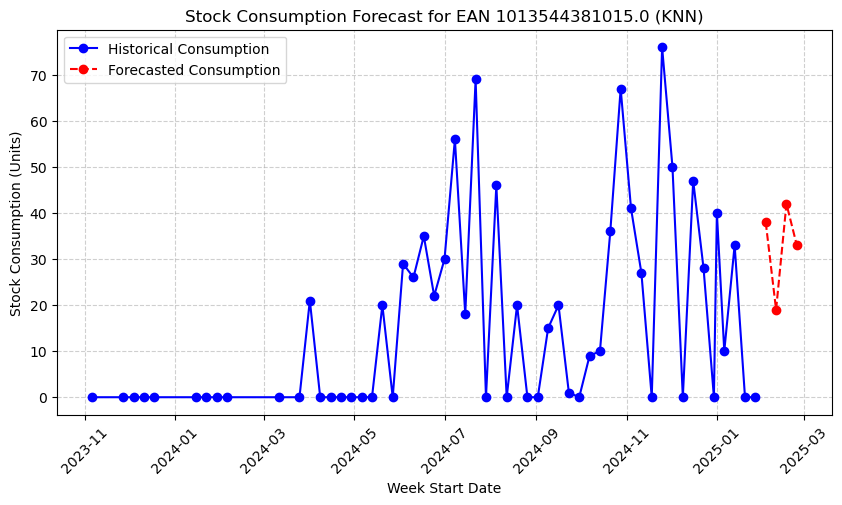

In [4]:
# Load the saved scaler
scaler = joblib.load("scaler.pkl")

# Forecast for a specific EAN
ean = 1013544381015.0 

# Check if the KNN model for this EAN exists
if ean in knn_models:
    knn_model = knn_models[ean]  # Get the pre-trained KNN model for this EAN

    # Filter data for the specific EAN
    ean_data = df[df["EAN"] == ean].copy()

    # Ensure 'Week_Start' is in datetime format
    ean_data["Week_Start"] = pd.to_datetime(ean_data["Week_Start"])

    # Inverse transform past consumption values (if they are scaled)
    past_consumption_scaled = ean_data["Total_Weekly_Consumption"].values.reshape(-1, 1)
    ean_data["Total_Weekly_Consumption"] = scaler.inverse_transform(past_consumption_scaled).flatten()

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Get the last known values for Lag_1 and Lag_2
    last_lag_1 = ean_data["Lag_1"].iloc[-1]
    last_lag_2 = ean_data["Lag_2"].iloc[-1]
    last_week_start = ean_data["Week_Start"].iloc[-1]  # Get last recorded date

    # Create future features for the next 4 weeks
    future_predictions_scaled = []
    future_dates = []  # To store the corresponding future weeks

    for i in range(1, 5):
        # Predict the next week's consumption (scaled)
        future_features = np.array([[last_lag_1, last_lag_2]])
        future_prediction_scaled = knn_model.predict(future_features)[0]
        future_predictions_scaled.append(future_prediction_scaled)

        # Compute next week's start date
        next_week_start = last_week_start + pd.Timedelta(days=7)
        future_dates.append(next_week_start)

        # Update lagged values for the next prediction
        last_lag_2 = last_lag_1
        last_lag_1 = future_prediction_scaled
        last_week_start = next_week_start

    # Inverse transform the predictions to get actual values
    future_predictions = scaler.inverse_transform(
        np.array(future_predictions_scaled).reshape(-1, 1)
    ).flatten()

    # Convert to integer values
    future_predictions = np.round(future_predictions).astype(int)

    # Print the forecasted values
    for i, (date, prediction) in enumerate(zip(future_dates, future_predictions), start=1):
        print(f"Week {i} ({date.date()}) forecast for EAN {ean}: {prediction}")

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 5))

    # Plot past consumption data (already inverse transformed)
    plt.plot(ean_data["Week_Start"], ean_data["Total_Weekly_Consumption"], marker='o', linestyle='-', color='b', label="Historical Consumption")

    # Plot forecasted future consumption data
    plt.plot(future_dates, future_predictions, marker='o', linestyle='--', color='r', label="Forecasted Consumption")

    # Formatting the plot
    plt.xlabel("Week Start Date")
    plt.ylabel("Stock Consumption (Units)")
    plt.title(f"Stock Consumption Forecast for EAN {ean} (KNN)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    # Show the plot
    plt.show()

else:
    print(f"No trained KNN model found for EAN {ean}.")


In [5]:
# Convert RMSE values to a NumPy array
knn_rmse_array = np.array(list(knn_rmse_values.values()))
 
# Compute Mean RMSE
knn_mean_rmse = np.mean(knn_rmse_array)
print(f"KNN Mean RMSE: {knn_mean_rmse:.4f}")

# Compute Median RMSE
knn_median_rmse = np.median(knn_rmse_array)
print(f"KNN Median RMSE: {knn_median_rmse:.4f}")

# Find Min and Max RMSE to detect best/worst cases
knn_min_rmse = np.min(knn_rmse_array)
knn_max_rmse = np.max(knn_rmse_array)

print(f"KNN Best EAN (lowest RMSE): {knn_min_rmse:.4f}")
print(f"KNN Worst EAN (highest RMSE): {knn_max_rmse:.4f}")

KNN Mean RMSE: 0.0460
KNN Median RMSE: 0.0014
KNN Best EAN (lowest RMSE): 0.0000
KNN Worst EAN (highest RMSE): 9.3944


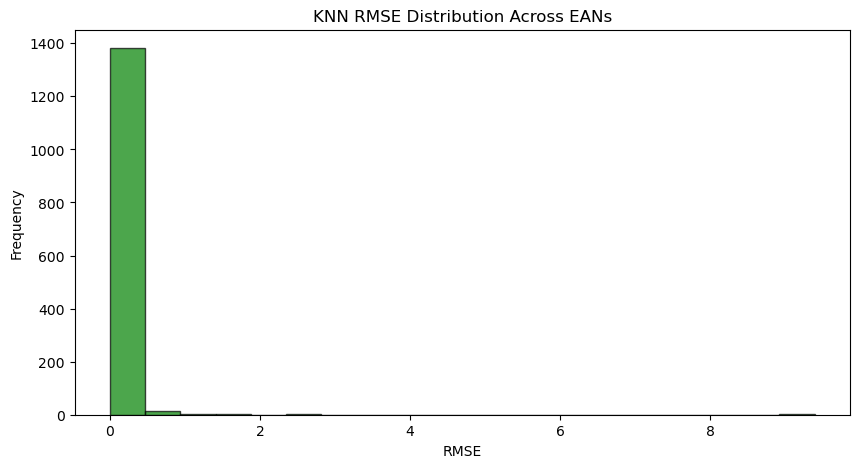

In [6]:
# Plot RMSE distribution
plt.figure(figsize=(10, 5))
plt.hist(knn_rmse_array, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.title("KNN RMSE Distribution Across EANs")
plt.show()

In [7]:
# Save KNN models and RMSE values
joblib.dump(knn_models, "knn_models.pkl")
joblib.dump(knn_rmse_values, "knn_rmse_values.pkl")

['knn_rmse_values.pkl']

### KNN Model Conclusion:

### Improve KNN 

#### 1. Hyperparameter tuning (k)

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Dictionary to store models for each EAN
knn_models = {}
knn_rmse_values = {}  # Dictionary to store RMSE per EAN
knn_cv_rmse_values = {}  # Dictionary to store cross-validation RMSE per EAN

# Train a KNN model for each EAN with hyperparameter tuning
for ean in df["EAN"].unique():
    ean_data = df[df["EAN"] == ean]  # Filter data for specific EAN

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Split into features (X) and target (y)
    X = ean_data[["Lag_1", "Lag_2"]]  # Use lagged values as features
    y = ean_data["Total_Weekly_Consumption"]

    # Train-test split (keep last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'n_neighbors': [3, 5, 7, 10, 15],  # Test different values of k
        'weights': ['uniform', 'distance']  # Test uniform and weighted KNN
    }
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model
    knn_model = grid_search.best_estimator_

    # Store model
    knn_models[ean] = knn_model

    # Predict and evaluate on the test set
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for this EAN
    knn_rmse_values[ean] = rmse

    # Perform cross-validation to evaluate the model's generalization
    cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())  # Convert to RMSE

    # Store cross-validation RMSE for this EAN
    knn_cv_rmse_values[ean] = cv_rmse

    # Print results
    print(f"EAN {ean} - KNN RMSE: {rmse:.4f} (Best k: {grid_search.best_params_['n_neighbors']}, Weights: {grid_search.best_params_['weights']})")
    print(f"EAN {ean} - Cross-Validation RMSE: {cv_rmse:.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1013544381015.0 - KNN RMSE: 0.7574 (Best k: 5, Weights: uniform)
EAN 1013544381015.0 - Cross-Validation RMSE: 0.5205


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1019421978364.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1019421978364.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1024008213369.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 1024008213369.0 - Cross-Validation RMSE: 0.0077


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1037601770462.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1037601770462.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1042777655048.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1042777655048.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1048540093755.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1048540093755.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 105685965293.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 105685965293.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1062816480982.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1062816480982.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1067813910580.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1067813910580.0 - Cross-Validation RMSE: 0.0415


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1075583423021.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1075583423021.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1075822791015.0 - KNN RMSE: 0.0290 (Best k: 15, Weights: uniform)
EAN 1075822791015.0 - Cross-Validation RMSE: 0.0640


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 10884521517615.0 - KNN RMSE: 0.2494 (Best k: 3, Weights: uniform)
EAN 10884521517615.0 - Cross-Validation RMSE: 0.1702


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 10884524001043.0 - KNN RMSE: 0.0838 (Best k: 3, Weights: uniform)
EAN 10884524001043.0 - Cross-Validation RMSE: 0.0904


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1162050286616.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1162050286616.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 118057573160.0 - KNN RMSE: 0.0081 (Best k: 3, Weights: uniform)
EAN 118057573160.0 - Cross-Validation RMSE: 0.0265


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1180575731602.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 1180575731602.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 120705031062846.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 120705031062846.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1240386749345.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1240386749345.0 - Cross-Validation RMSE: 0.0044


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1277815980024.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1277815980024.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1278912292463.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1278912292463.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1284383292626.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1284383292626.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1308327941400.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1308327941400.0 - Cross-Validation RMSE: 0.0635


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 13661522031237.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 13661522031237.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1373933301655.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1373933301655.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1383480568724.0 - KNN RMSE: 0.0161 (Best k: 15, Weights: uniform)
EAN 1383480568724.0 - Cross-Validation RMSE: 0.0968


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 14026704196156.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 14026704196156.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1412759868947.0 - KNN RMSE: 0.0104 (Best k: 7, Weights: uniform)
EAN 1412759868947.0 - Cross-Validation RMSE: 0.0447


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1450516242969.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1450516242969.0 - Cross-Validation RMSE: 0.0635


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1464489984489.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1464489984489.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1464675065289.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1464675065289.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1470194808801.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1470194808801.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1497123284245.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1497123284245.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631070.0 - KNN RMSE: 0.0580 (Best k: 15, Weights: distance)
EAN 15060179631070.0 - Cross-Validation RMSE: 0.0309


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631087.0 - KNN RMSE: 0.0668 (Best k: 3, Weights: uniform)
EAN 15060179631087.0 - Cross-Validation RMSE: 0.0376


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631094.0 - KNN RMSE: 0.0494 (Best k: 3, Weights: uniform)
EAN 15060179631094.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631100.0 - KNN RMSE: 0.0377 (Best k: 3, Weights: uniform)
EAN 15060179631100.0 - Cross-Validation RMSE: 0.0259


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631117.0 - KNN RMSE: 0.0301 (Best k: 3, Weights: uniform)
EAN 15060179631117.0 - Cross-Validation RMSE: 0.0219


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631124.0 - KNN RMSE: 0.0260 (Best k: 10, Weights: distance)
EAN 15060179631124.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631131.0 - KNN RMSE: 0.0335 (Best k: 15, Weights: distance)
EAN 15060179631131.0 - Cross-Validation RMSE: 0.0219


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631148.0 - KNN RMSE: 0.0473 (Best k: 3, Weights: uniform)
EAN 15060179631148.0 - Cross-Validation RMSE: 0.0291


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631162.0 - KNN RMSE: 0.0413 (Best k: 15, Weights: distance)
EAN 15060179631162.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631186.0 - KNN RMSE: 0.0562 (Best k: 10, Weights: distance)
EAN 15060179631186.0 - Cross-Validation RMSE: 0.0314


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179633036.0 - KNN RMSE: 0.0630 (Best k: 3, Weights: distance)
EAN 15060179633036.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179633043.0 - KNN RMSE: 0.1115 (Best k: 7, Weights: distance)
EAN 15060179633043.0 - Cross-Validation RMSE: 0.0609


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1507939511661.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1507939511661.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1510782023292.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 1510782023292.0 - Cross-Validation RMSE: 0.0495


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1531499223651.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 1531499223651.0 - Cross-Validation RMSE: 0.0248


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1542326273160.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1542326273160.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1546615419003.0 - KNN RMSE: 0.0081 (Best k: 3, Weights: uniform)
EAN 1546615419003.0 - Cross-Validation RMSE: 0.0186


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1589831494629.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1589831494629.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1596260919879.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 1596260919879.0 - Cross-Validation RMSE: 0.0244


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1598140353749.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1598140353749.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1609748113961.0 - KNN RMSE: 0.1107 (Best k: 3, Weights: uniform)
EAN 1609748113961.0 - Cross-Validation RMSE: 1.9679


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1639645577800.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 1639645577800.0 - Cross-Validation RMSE: 0.1473


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1688332222694.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1688332222694.0 - Cross-Validation RMSE: 0.0243


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1688646685289.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 1688646685289.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1712335957988.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1712335957988.0 - Cross-Validation RMSE: 0.6520


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1718200620073.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1718200620073.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1738185596114.0 - KNN RMSE: 0.0383 (Best k: 3, Weights: distance)
EAN 1738185596114.0 - Cross-Validation RMSE: 0.0219


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 175567822234.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 175567822234.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1755678222341.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1755678222341.0 - Cross-Validation RMSE: 0.0487


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1761479344353.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1761479344353.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1767499572952.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 1767499572952.0 - Cross-Validation RMSE: 0.0484


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1771027390060.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1771027390060.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1780331720899.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1780331720899.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1800607202019.0 - KNN RMSE: 0.1002 (Best k: 15, Weights: uniform)
EAN 1800607202019.0 - Cross-Validation RMSE: 0.2375


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1803681209421.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 1803681209421.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1813728385993.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1813728385993.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1832848366992.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1832848366992.0 - Cross-Validation RMSE: 0.1230


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1855444883471.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 1855444883471.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1873020083400.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1873020083400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1897429578232.0 - KNN RMSE: 0.3690 (Best k: 10, Weights: uniform)
EAN 1897429578232.0 - Cross-Validation RMSE: 0.4365


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1909219356360.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1909219356360.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1915860909735.0 - KNN RMSE: 0.0193 (Best k: 15, Weights: uniform)
EAN 1915860909735.0 - Cross-Validation RMSE: 0.1627


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1922560030028.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1922560030028.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1933851131207.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1933851131207.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1943002619665.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1943002619665.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1948160534256.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1948160534256.0 - Cross-Validation RMSE: 0.0803


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1982573136792.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1982573136792.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2015475403957.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2015475403957.0 - Cross-Validation RMSE: 0.0595


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2016298661814.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2016298661814.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2057926715649.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2057926715649.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 20705031062846.0 - KNN RMSE: 0.0171 (Best k: 3, Weights: uniform)
EAN 20705031062846.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2100071898239.0 - KNN RMSE: 0.0242 (Best k: 15, Weights: uniform)
EAN 2100071898239.0 - Cross-Validation RMSE: 0.0443


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2104743992026.0 - KNN RMSE: 0.0241 (Best k: 5, Weights: uniform)
EAN 2104743992026.0 - Cross-Validation RMSE: 0.0288


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2120360805884.0 - KNN RMSE: 0.0119 (Best k: 3, Weights: uniform)
EAN 2120360805884.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2123423898713.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2123423898713.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 21348801.0 - KNN RMSE: 0.0983 (Best k: 5, Weights: distance)
EAN 21348801.0 - Cross-Validation RMSE: 0.0630


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2135291832239.0 - KNN RMSE: 0.0217 (Best k: 3, Weights: uniform)
EAN 2135291832239.0 - Cross-Validation RMSE: 0.0319


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 215010.0 - KNN RMSE: 0.0173 (Best k: 15, Weights: uniform)
EAN 215010.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 215030.0 - KNN RMSE: 0.0156 (Best k: 3, Weights: uniform)
EAN 215030.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 215050.0 - KNN RMSE: 0.0156 (Best k: 3, Weights: uniform)
EAN 215050.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2170932740099.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: distance)
EAN 2170932740099.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2190959690786.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 2190959690786.0 - Cross-Validation RMSE: 0.0566


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 21909596907862.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 21909596907862.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2194804352794.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2194804352794.0 - Cross-Validation RMSE: 0.0307


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2205180031087.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2205180031087.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2230755547328.0 - KNN RMSE: 0.0104 (Best k: 7, Weights: uniform)
EAN 2230755547328.0 - Cross-Validation RMSE: 0.0147


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2249239599551.0 - KNN RMSE: 0.0306 (Best k: 15, Weights: uniform)
EAN 2249239599551.0 - Cross-Validation RMSE: 0.0569


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2257004538693.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 2257004538693.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2279203890392.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 2279203890392.0 - Cross-Validation RMSE: 0.0159


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 23010817.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 23010817.0 - Cross-Validation RMSE: 0.0268


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 23013617.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 23013617.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2345698653587.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 2345698653587.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2351360560010.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2351360560010.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2374587069991.0 - KNN RMSE: 0.0193 (Best k: 15, Weights: uniform)
EAN 2374587069991.0 - Cross-Validation RMSE: 0.1408


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2398759984045.0 - KNN RMSE: 0.0721 (Best k: 15, Weights: uniform)
EAN 2398759984045.0 - Cross-Validation RMSE: 0.1131


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2414340286503.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2414340286503.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2420420509598.0 - KNN RMSE: 0.0193 (Best k: 15, Weights: uniform)
EAN 2420420509598.0 - Cross-Validation RMSE: 0.0670


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2422238865434.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 2422238865434.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2468949508711.0 - KNN RMSE: 0.0118 (Best k: 10, Weights: uniform)
EAN 2468949508711.0 - Cross-Validation RMSE: 0.0112


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2476057820077.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2476057820077.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2509793612199.0 - KNN RMSE: 0.0845 (Best k: 7, Weights: distance)
EAN 2509793612199.0 - Cross-Validation RMSE: 5.2012


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2590927262825.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2590927262825.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2632325282942.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2632325282942.0 - Cross-Validation RMSE: 0.0089


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2637364127826.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2637364127826.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2655604760568.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 2655604760568.0 - Cross-Validation RMSE: 0.2083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2665843859264.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2665843859264.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2713762021156.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2713762021156.0 - Cross-Validation RMSE: 0.0053


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2716291861999.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2716291861999.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 27290115922480.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 27290115922480.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 27290115922503.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 27290115922503.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 27290115922671.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 27290115922671.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2730445327374.0 - KNN RMSE: 0.3080 (Best k: 15, Weights: uniform)
EAN 2730445327374.0 - Cross-Validation RMSE: 1.1588


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2757317910415.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2757317910415.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2768878583544.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2768878583544.0 - Cross-Validation RMSE: 0.1124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2769221109805.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2769221109805.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2774774050368.0 - KNN RMSE: 0.0193 (Best k: 15, Weights: uniform)
EAN 2774774050368.0 - Cross-Validation RMSE: 0.0934


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2775651577713.0 - KNN RMSE: 0.0268 (Best k: 15, Weights: uniform)
EAN 2775651577713.0 - Cross-Validation RMSE: 0.0259


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2779058193006.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2779058193006.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2782562241641.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2782562241641.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 279293086221.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 279293086221.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2797828264419.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2797828264419.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 28058090002400.0 - KNN RMSE: 0.3636 (Best k: 10, Weights: uniform)
EAN 28058090002400.0 - Cross-Validation RMSE: 0.3074


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 28058090002554.0 - KNN RMSE: 0.2932 (Best k: 7, Weights: distance)
EAN 28058090002554.0 - Cross-Validation RMSE: 0.2172


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2807785812708.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2807785812708.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2807933159895.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2807933159895.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2813566598125.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 2813566598125.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2835848657230.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 2835848657230.0 - Cross-Validation RMSE: 0.1495


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2842773854504.0 - KNN RMSE: 0.0226 (Best k: 15, Weights: uniform)
EAN 2842773854504.0 - Cross-Validation RMSE: 0.0811


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2856801777388.0 - KNN RMSE: 0.0177 (Best k: 15, Weights: distance)
EAN 2856801777388.0 - Cross-Validation RMSE: 0.0258


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2856973590110.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2856973590110.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2859256765910.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 2859256765910.0 - Cross-Validation RMSE: 0.3890


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2894756090239.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2894756090239.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2905918145137.0 - KNN RMSE: 0.0974 (Best k: 10, Weights: distance)
EAN 2905918145137.0 - Cross-Validation RMSE: 0.1642


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2918720758953.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2918720758953.0 - Cross-Validation RMSE: 0.4271


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2952975683126.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 2952975683126.0 - Cross-Validation RMSE: 0.0649


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2962705136569.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2962705136569.0 - Cross-Validation RMSE: 0.0843


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 299778137097.0 - KNN RMSE: 0.0299 (Best k: 7, Weights: distance)
EAN 299778137097.0 - Cross-Validation RMSE: 0.0242


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3000895104585.0 - KNN RMSE: 0.0857 (Best k: 5, Weights: uniform)
EAN 3000895104585.0 - Cross-Validation RMSE: 0.0687


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3053241502053.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 3053241502053.0 - Cross-Validation RMSE: 0.0173


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3058895722676.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3058895722676.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031040094.0 - KNN RMSE: 0.1884 (Best k: 3, Weights: uniform)
EAN 30705031040094.0 - Cross-Validation RMSE: 0.0880


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031056989.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 30705031056989.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031086610.0 - KNN RMSE: 0.2875 (Best k: 3, Weights: uniform)
EAN 30705031086610.0 - Cross-Validation RMSE: 0.1986


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031098835.0 - KNN RMSE: 0.2513 (Best k: 3, Weights: uniform)
EAN 30705031098835.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031104253.0 - KNN RMSE: 0.7902 (Best k: 3, Weights: uniform)
EAN 30705031104253.0 - Cross-Validation RMSE: 0.4188


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031113170.0 - KNN RMSE: 0.3554 (Best k: 3, Weights: uniform)
EAN 30705031113170.0 - Cross-Validation RMSE: 0.2348


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031114207.0 - KNN RMSE: 0.5922 (Best k: 3, Weights: uniform)
EAN 30705031114207.0 - Cross-Validation RMSE: 0.3732


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031114214.0 - KNN RMSE: 0.2513 (Best k: 3, Weights: uniform)
EAN 30705031114214.0 - Cross-Validation RMSE: 0.1660


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031114221.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 30705031114221.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031114252.0 - KNN RMSE: 0.2513 (Best k: 3, Weights: uniform)
EAN 30705031114252.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031115488.0 - KNN RMSE: 0.2514 (Best k: 3, Weights: uniform)
EAN 30705031115488.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031116553.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 30705031116553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031119400.0 - KNN RMSE: 0.0838 (Best k: 3, Weights: uniform)
EAN 30705031119400.0 - Cross-Validation RMSE: 0.1190


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031120871.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 30705031120871.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031120925.0 - KNN RMSE: 0.2514 (Best k: 3, Weights: uniform)
EAN 30705031120925.0 - Cross-Validation RMSE: 0.1175


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031238941.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 30705031238941.0 - Cross-Validation RMSE: 0.2033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031238965.0 - KNN RMSE: 0.4370 (Best k: 3, Weights: uniform)
EAN 30705031238965.0 - Cross-Validation RMSE: 0.3189


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031239047.0 - KNN RMSE: 0.2513 (Best k: 3, Weights: uniform)
EAN 30705031239047.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031239191.0 - KNN RMSE: 0.6507 (Best k: 3, Weights: uniform)
EAN 30705031239191.0 - Cross-Validation RMSE: 0.3650


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031242122.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 30705031242122.0 - Cross-Validation RMSE: 0.1528


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3071861206784.0 - KNN RMSE: 0.0072 (Best k: 10, Weights: uniform)
EAN 3071861206784.0 - Cross-Validation RMSE: 1.0598


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 309755102584.0 - KNN RMSE: 0.0854 (Best k: 15, Weights: distance)
EAN 309755102584.0 - Cross-Validation RMSE: 0.1458


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3097551025843.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3097551025843.0 - Cross-Validation RMSE: 0.1344


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 309817319436.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 309817319436.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3098173194362.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3098173194362.0 - Cross-Validation RMSE: 0.0606


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3100200724683.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3100200724683.0 - Cross-Validation RMSE: 0.0294


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3103870996300.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3103870996300.0 - Cross-Validation RMSE: 0.1124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3112218932935.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3112218932935.0 - Cross-Validation RMSE: 0.0731


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3133662344773.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3133662344773.0 - Cross-Validation RMSE: 0.0160


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3158659879643.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 3158659879643.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3161869955261.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3161869955261.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3181772299845.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3181772299845.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550711050.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3182550711050.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550711159.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 3182550711159.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550711166.0 - KNN RMSE: 0.0047 (Best k: 10, Weights: distance)
EAN 3182550711166.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550771054.0 - KNN RMSE: 0.0421 (Best k: 15, Weights: uniform)
EAN 3182550771054.0 - Cross-Validation RMSE: 0.0268


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550771207.0 - KNN RMSE: 0.0392 (Best k: 5, Weights: uniform)
EAN 3182550771207.0 - Cross-Validation RMSE: 0.0242


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550771252.0 - KNN RMSE: 0.0216 (Best k: 10, Weights: uniform)
EAN 3182550771252.0 - Cross-Validation RMSE: 0.0247


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550771337.0 - KNN RMSE: 0.0425 (Best k: 15, Weights: uniform)
EAN 3182550771337.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550858854.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3182550858854.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550939218.0 - KNN RMSE: 0.0136 (Best k: 15, Weights: uniform)
EAN 3182550939218.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550940528.0 - KNN RMSE: 0.0133 (Best k: 7, Weights: uniform)
EAN 3182550940528.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550940580.0 - KNN RMSE: 0.0127 (Best k: 7, Weights: uniform)
EAN 3182550940580.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550940849.0 - KNN RMSE: 0.0299 (Best k: 15, Weights: uniform)
EAN 3182550940849.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3188546942934.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 3188546942934.0 - Cross-Validation RMSE: 0.0312


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3189886286716.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: uniform)
EAN 3189886286716.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3190181046656.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 3190181046656.0 - Cross-Validation RMSE: 0.1005


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3192951509759.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3192951509759.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3257287493844.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3257287493844.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3272963066588.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3272963066588.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3274271001036.0 - KNN RMSE: 0.0171 (Best k: 3, Weights: uniform)
EAN 3274271001036.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3286498723652.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3286498723652.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3308532772567.0 - KNN RMSE: 0.0070 (Best k: 5, Weights: distance)
EAN 3308532772567.0 - Cross-Validation RMSE: 0.0455


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3318799177516.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3318799177516.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3358464175796.0 - KNN RMSE: 0.0081 (Best k: 3, Weights: uniform)
EAN 3358464175796.0 - Cross-Validation RMSE: 0.0333


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3372085279956.0 - KNN RMSE: 0.0138 (Best k: 7, Weights: uniform)
EAN 3372085279956.0 - Cross-Validation RMSE: 0.0458


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3389360008923.0 - KNN RMSE: 0.1120 (Best k: 10, Weights: uniform)
EAN 3389360008923.0 - Cross-Validation RMSE: 0.1254


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3389360008930.0 - KNN RMSE: 0.1938 (Best k: 10, Weights: uniform)
EAN 3389360008930.0 - Cross-Validation RMSE: 0.1655


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3393804635757.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3393804635757.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400892013909.0 - KNN RMSE: 0.1045 (Best k: 10, Weights: uniform)
EAN 3400892013909.0 - Cross-Validation RMSE: 0.0606


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400892625171.0 - KNN RMSE: 0.0466 (Best k: 3, Weights: uniform)
EAN 3400892625171.0 - Cross-Validation RMSE: 0.0367


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400921730296.0 - KNN RMSE: 0.0554 (Best k: 5, Weights: uniform)
EAN 3400921730296.0 - Cross-Validation RMSE: 0.0388


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400921843750.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400921843750.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930038055.0 - KNN RMSE: 0.0857 (Best k: 10, Weights: uniform)
EAN 3400930038055.0 - Cross-Validation RMSE: 0.0611


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930045220.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400930045220.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930092637.0 - KNN RMSE: 0.0095 (Best k: 7, Weights: uniform)
EAN 3400930092637.0 - Cross-Validation RMSE: 0.0152


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930099001.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400930099001.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930168370.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400930168370.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930168400.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400930168400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930206454.0 - KNN RMSE: 0.0316 (Best k: 10, Weights: uniform)
EAN 3400930206454.0 - Cross-Validation RMSE: 0.1227


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930206461.0 - KNN RMSE: 0.1927 (Best k: 3, Weights: uniform)
EAN 3400930206461.0 - Cross-Validation RMSE: 0.1201


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009302151280.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009302151280.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930267219.0 - KNN RMSE: 0.0979 (Best k: 7, Weights: uniform)
EAN 3400930267219.0 - Cross-Validation RMSE: 0.0805


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930484500.0 - KNN RMSE: 0.0272 (Best k: 5, Weights: uniform)
EAN 3400930484500.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930632192.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3400930632192.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930822401.0 - KNN RMSE: 0.0169 (Best k: 10, Weights: uniform)
EAN 3400930822401.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930849255.0 - KNN RMSE: 0.0135 (Best k: 10, Weights: distance)
EAN 3400930849255.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930853795.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 3400930853795.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009308537950.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009308537950.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930870365.0 - KNN RMSE: 0.0070 (Best k: 15, Weights: uniform)
EAN 3400930870365.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930985830.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400930985830.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931087267.0 - KNN RMSE: 0.0121 (Best k: 15, Weights: distance)
EAN 3400931087267.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931112433.0 - KNN RMSE: 0.0730 (Best k: 7, Weights: uniform)
EAN 3400931112433.0 - Cross-Validation RMSE: 0.0462


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931136385.0 - KNN RMSE: 0.0308 (Best k: 5, Weights: distance)
EAN 3400931136385.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931152705.0 - KNN RMSE: 0.0007 (Best k: 10, Weights: uniform)
EAN 3400931152705.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931157618.0 - KNN RMSE: 0.0941 (Best k: 10, Weights: distance)
EAN 3400931157618.0 - Cross-Validation RMSE: 0.0724


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931316947.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400931316947.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931828693.0 - KNN RMSE: 0.0418 (Best k: 7, Weights: uniform)
EAN 3400931828693.0 - Cross-Validation RMSE: 0.0350


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931922827.0 - KNN RMSE: 0.0106 (Best k: 7, Weights: uniform)
EAN 3400931922827.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009319228270.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009319228270.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931923138.0 - KNN RMSE: 0.0309 (Best k: 5, Weights: distance)
EAN 3400931923138.0 - Cross-Validation RMSE: 0.0245


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009319231382.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009319231382.0 - Cross-Validation RMSE: 0.1873


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931953173.0 - KNN RMSE: 0.0566 (Best k: 10, Weights: uniform)
EAN 3400931953173.0 - Cross-Validation RMSE: 0.0448


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009319531732.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009319531732.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931988014.0 - KNN RMSE: 0.0116 (Best k: 7, Weights: uniform)
EAN 3400931988014.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932070268.0 - KNN RMSE: 0.0200 (Best k: 7, Weights: uniform)
EAN 3400932070268.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932172146.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400932172146.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932299386.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3400932299386.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932341641.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3400932341641.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932459087.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3400932459087.0 - Cross-Validation RMSE: 0.0217


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932805433.0 - KNN RMSE: 0.0209 (Best k: 3, Weights: uniform)
EAN 3400932805433.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932862092.0 - KNN RMSE: 0.3602 (Best k: 3, Weights: uniform)
EAN 3400932862092.0 - Cross-Validation RMSE: 0.1683


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932884506.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400932884506.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932953615.0 - KNN RMSE: 0.7138 (Best k: 5, Weights: uniform)
EAN 3400932953615.0 - Cross-Validation RMSE: 0.5443


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933016012.0 - KNN RMSE: 0.0177 (Best k: 10, Weights: uniform)
EAN 3400933016012.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933040253.0 - KNN RMSE: 0.0728 (Best k: 10, Weights: uniform)
EAN 3400933040253.0 - Cross-Validation RMSE: 0.0465


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933283919.0 - KNN RMSE: 0.0383 (Best k: 10, Weights: uniform)
EAN 3400933283919.0 - Cross-Validation RMSE: 0.0263


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933397562.0 - KNN RMSE: 0.0199 (Best k: 15, Weights: uniform)
EAN 3400933397562.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933619510.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400933619510.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933670665.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400933670665.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933737535.0 - KNN RMSE: 0.0102 (Best k: 15, Weights: uniform)
EAN 3400933737535.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933785499.0 - KNN RMSE: 0.0545 (Best k: 15, Weights: uniform)
EAN 3400933785499.0 - Cross-Validation RMSE: 0.0574


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933789862.0 - KNN RMSE: 0.0144 (Best k: 5, Weights: uniform)
EAN 3400933789862.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933790172.0 - KNN RMSE: 0.0179 (Best k: 3, Weights: uniform)
EAN 3400933790172.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933979089.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400933979089.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400934194788.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400934194788.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400934213571.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400934213571.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400934606182.0 - KNN RMSE: 0.1492 (Best k: 5, Weights: uniform)
EAN 3400934606182.0 - Cross-Validation RMSE: 0.1113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935073433.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400935073433.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935073723.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400935073723.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935201256.0 - KNN RMSE: 0.0327 (Best k: 10, Weights: uniform)
EAN 3400935201256.0 - Cross-Validation RMSE: 0.0497


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935235145.0 - KNN RMSE: 0.0114 (Best k: 15, Weights: uniform)
EAN 3400935235145.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009352351452.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009352351452.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935322982.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400935322982.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935445452.0 - KNN RMSE: 0.0116 (Best k: 7, Weights: uniform)
EAN 3400935445452.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935541185.0 - KNN RMSE: 0.5595 (Best k: 15, Weights: uniform)
EAN 3400935541185.0 - Cross-Validation RMSE: 0.6004


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009355411852.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009355411852.0 - Cross-Validation RMSE: 0.0314


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935601360.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400935601360.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935847638.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400935847638.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935952936.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400935952936.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936075764.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936075764.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936120112.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936120112.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936206779.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936206779.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936299801.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936299801.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936300323.0 - KNN RMSE: 0.0640 (Best k: 7, Weights: uniform)
EAN 3400936300323.0 - Cross-Validation RMSE: 0.0511


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936341074.0 - KNN RMSE: 0.0121 (Best k: 3, Weights: uniform)
EAN 3400936341074.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936678514.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936678514.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936695481.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936695481.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936863637.0 - KNN RMSE: 0.0185 (Best k: 15, Weights: uniform)
EAN 3400936863637.0 - Cross-Validation RMSE: 0.0245


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400937013413.0 - KNN RMSE: 0.0312 (Best k: 10, Weights: uniform)
EAN 3400937013413.0 - Cross-Validation RMSE: 0.0358


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009370134130.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 34009370134130.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400937014472.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3400937014472.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400937669269.0 - KNN RMSE: 0.0783 (Best k: 3, Weights: uniform)
EAN 3400937669269.0 - Cross-Validation RMSE: 0.0371


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400938022209.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400938022209.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400938838336.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3400938838336.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400939215747.0 - KNN RMSE: 0.0077 (Best k: 3, Weights: uniform)
EAN 3400939215747.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400939482316.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400939482316.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400939827599.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3400939827599.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400941626913.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400941626913.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400949757381.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400949757381.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400949758791.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400949758791.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400956311651.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400956311651.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400957068974.0 - KNN RMSE: 0.0431 (Best k: 5, Weights: uniform)
EAN 3400957068974.0 - Cross-Validation RMSE: 0.0385


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401054069888.0 - KNN RMSE: 0.8455 (Best k: 15, Weights: distance)
EAN 3401054069888.0 - Cross-Validation RMSE: 0.8314


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401144846443.0 - KNN RMSE: 0.0067 (Best k: 15, Weights: uniform)
EAN 3401144846443.0 - Cross-Validation RMSE: 0.0078


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401151738861.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 3401151738861.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401160387715.0 - KNN RMSE: 0.0142 (Best k: 7, Weights: uniform)
EAN 3401160387715.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401179221222.0 - KNN RMSE: 0.0149 (Best k: 15, Weights: uniform)
EAN 3401179221222.0 - Cross-Validation RMSE: 0.0217


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401196161747.0 - KNN RMSE: 0.0504 (Best k: 7, Weights: distance)
EAN 3401196161747.0 - Cross-Validation RMSE: 0.0365


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401196492742.0 - KNN RMSE: 0.0201 (Best k: 7, Weights: uniform)
EAN 3401196492742.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401196492971.0 - KNN RMSE: 0.0204 (Best k: 10, Weights: distance)
EAN 3401196492971.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401360266841.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 3401360266841.0 - Cross-Validation RMSE: 0.0387


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3404115417517.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: uniform)
EAN 3404115417517.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110003534.0 - KNN RMSE: 0.2536 (Best k: 10, Weights: distance)
EAN 3411110003534.0 - Cross-Validation RMSE: 0.1733


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110006191.0 - KNN RMSE: 0.0996 (Best k: 7, Weights: uniform)
EAN 3411110006191.0 - Cross-Validation RMSE: 0.1172


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110033203.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3411110033203.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110033210.0 - KNN RMSE: 0.0130 (Best k: 7, Weights: uniform)
EAN 3411110033210.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110107348.0 - KNN RMSE: 0.0188 (Best k: 5, Weights: distance)
EAN 3411110107348.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110107355.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3411110107355.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411111914365.0 - KNN RMSE: 0.4098 (Best k: 7, Weights: distance)
EAN 3411111914365.0 - Cross-Validation RMSE: 0.2699


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112027958.0 - KNN RMSE: 0.0446 (Best k: 7, Weights: distance)
EAN 3411112027958.0 - Cross-Validation RMSE: 0.0305


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112132096.0 - KNN RMSE: 0.0091 (Best k: 15, Weights: uniform)
EAN 3411112132096.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112168798.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3411112168798.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112168811.0 - KNN RMSE: 0.0156 (Best k: 15, Weights: uniform)
EAN 3411112168811.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112251285.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3411112251285.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112251377.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 3411112251377.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112264049.0 - KNN RMSE: 0.0101 (Best k: 10, Weights: uniform)
EAN 3411112264049.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112264100.0 - KNN RMSE: 0.0132 (Best k: 10, Weights: uniform)
EAN 3411112264100.0 - Cross-Validation RMSE: 0.0306


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112961481.0 - KNN RMSE: 0.0099 (Best k: 15, Weights: uniform)
EAN 3411112961481.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112961740.0 - KNN RMSE: 0.0280 (Best k: 10, Weights: uniform)
EAN 3411112961740.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112961771.0 - KNN RMSE: 0.0165 (Best k: 15, Weights: uniform)
EAN 3411112961771.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112977291.0 - KNN RMSE: 0.0188 (Best k: 3, Weights: uniform)
EAN 3411112977291.0 - Cross-Validation RMSE: 0.0691


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113007201.0 - KNN RMSE: 0.0205 (Best k: 7, Weights: uniform)
EAN 3411113007201.0 - Cross-Validation RMSE: 0.0296


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113007225.0 - KNN RMSE: 0.0192 (Best k: 3, Weights: uniform)
EAN 3411113007225.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113007232.0 - KNN RMSE: 0.0518 (Best k: 3, Weights: uniform)
EAN 3411113007232.0 - Cross-Validation RMSE: 0.0245


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113007256.0 - KNN RMSE: 0.0177 (Best k: 15, Weights: uniform)
EAN 3411113007256.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113021276.0 - KNN RMSE: 0.0333 (Best k: 15, Weights: uniform)
EAN 3411113021276.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113030537.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3411113030537.0 - Cross-Validation RMSE: 0.0297


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113030568.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3411113030568.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113030605.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3411113030605.0 - Cross-Validation RMSE: 0.0293


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113101381.0 - KNN RMSE: 0.0346 (Best k: 5, Weights: uniform)
EAN 3411113101381.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3424051378148.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3424051378148.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34264416512.0 - KNN RMSE: 0.0602 (Best k: 10, Weights: uniform)
EAN 34264416512.0 - Cross-Validation RMSE: 0.0512


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3426441651233.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 3426441651233.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3442806995097.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3442806995097.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3445116407667.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3445116407667.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3456789098766.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3456789098766.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3457298507451.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3457298507451.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3471220606698.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3471220606698.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3515650460465.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3515650460465.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3515652002007.0 - KNN RMSE: 0.0151 (Best k: 15, Weights: distance)
EAN 3515652002007.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3518646126611.0 - KNN RMSE: 0.0577 (Best k: 15, Weights: distance)
EAN 3518646126611.0 - Cross-Validation RMSE: 0.0336


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3532296736242.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3532296736242.0 - Cross-Validation RMSE: 0.2247


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3546225501997.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3546225501997.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3550455474317.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3550455474317.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552791573944.0 - KNN RMSE: 1.5355 (Best k: 5, Weights: uniform)
EAN 3552791573944.0 - Cross-Validation RMSE: 0.9202


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552791910527.0 - KNN RMSE: 0.0693 (Best k: 15, Weights: uniform)
EAN 3552791910527.0 - Cross-Validation RMSE: 0.0597


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552792272501.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3552792272501.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552792272525.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3552792272525.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063009.0 - KNN RMSE: 0.0128 (Best k: 15, Weights: distance)
EAN 3552793063009.0 - Cross-Validation RMSE: 0.0398


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063023.0 - KNN RMSE: 0.0267 (Best k: 15, Weights: uniform)
EAN 3552793063023.0 - Cross-Validation RMSE: 0.1744


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063047.0 - KNN RMSE: 0.0270 (Best k: 15, Weights: uniform)
EAN 3552793063047.0 - Cross-Validation RMSE: 0.1324


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063061.0 - KNN RMSE: 0.0208 (Best k: 10, Weights: uniform)
EAN 3552793063061.0 - Cross-Validation RMSE: 0.1116


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063085.0 - KNN RMSE: 0.0210 (Best k: 10, Weights: distance)
EAN 3552793063085.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063108.0 - KNN RMSE: 0.0299 (Best k: 7, Weights: uniform)
EAN 3552793063108.0 - Cross-Validation RMSE: 0.0407


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063122.0 - KNN RMSE: 0.0215 (Best k: 5, Weights: uniform)
EAN 3552793063122.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793069001.0 - KNN RMSE: 0.1127 (Best k: 5, Weights: uniform)
EAN 3552793069001.0 - Cross-Validation RMSE: 0.0678


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793069025.0 - KNN RMSE: 0.0702 (Best k: 5, Weights: distance)
EAN 3552793069025.0 - Cross-Validation RMSE: 0.0528


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793069049.0 - KNN RMSE: 0.0565 (Best k: 5, Weights: distance)
EAN 3552793069049.0 - Cross-Validation RMSE: 0.0386


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793072025.0 - KNN RMSE: 0.8901 (Best k: 15, Weights: distance)
EAN 3552793072025.0 - Cross-Validation RMSE: 0.5682


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793072087.0 - KNN RMSE: 0.1660 (Best k: 15, Weights: distance)
EAN 3552793072087.0 - Cross-Validation RMSE: 0.1574


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793072148.0 - KNN RMSE: 0.1490 (Best k: 5, Weights: uniform)
EAN 3552793072148.0 - Cross-Validation RMSE: 0.1300


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078010.0 - KNN RMSE: 0.0644 (Best k: 5, Weights: uniform)
EAN 3552793078010.0 - Cross-Validation RMSE: 0.0339


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078065.0 - KNN RMSE: 0.0102 (Best k: 10, Weights: uniform)
EAN 3552793078065.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078119.0 - KNN RMSE: 0.0177 (Best k: 3, Weights: uniform)
EAN 3552793078119.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078300.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3552793078300.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078348.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3552793078348.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3553379035862.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 3553379035862.0 - Cross-Validation RMSE: 0.0054


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3581735512559.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3581735512559.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132000086.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: distance)
EAN 3597132000086.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132001458.0 - KNN RMSE: 0.0140 (Best k: 10, Weights: uniform)
EAN 3597132001458.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132001465.0 - KNN RMSE: 0.0121 (Best k: 3, Weights: uniform)
EAN 3597132001465.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132001472.0 - KNN RMSE: 0.0163 (Best k: 10, Weights: uniform)
EAN 3597132001472.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132001489.0 - KNN RMSE: 0.0138 (Best k: 3, Weights: uniform)
EAN 3597132001489.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132101110.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3597132101110.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132103305.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 3597132103305.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132103404.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3597132103404.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132106108.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3597132106108.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132108034.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3597132108034.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132201056.0 - KNN RMSE: 0.0067 (Best k: 7, Weights: uniform)
EAN 3597132201056.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132202213.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3597132202213.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132216043.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3597132216043.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133047790.0 - KNN RMSE: 0.0395 (Best k: 7, Weights: uniform)
EAN 3597133047790.0 - Cross-Validation RMSE: 0.0486


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133071504.0 - KNN RMSE: 0.0097 (Best k: 10, Weights: distance)
EAN 3597133071504.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133082531.0 - KNN RMSE: 0.0160 (Best k: 15, Weights: uniform)
EAN 3597133082531.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133086836.0 - KNN RMSE: 0.0797 (Best k: 15, Weights: uniform)
EAN 3597133086836.0 - Cross-Validation RMSE: 0.0637


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133087673.0 - KNN RMSE: 0.0209 (Best k: 3, Weights: uniform)
EAN 3597133087673.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133095913.0 - KNN RMSE: 0.0068 (Best k: 7, Weights: uniform)
EAN 3597133095913.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133097221.0 - KNN RMSE: 0.1075 (Best k: 10, Weights: uniform)
EAN 3597133097221.0 - Cross-Validation RMSE: 0.0751


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133097740.0 - KNN RMSE: 0.0067 (Best k: 15, Weights: distance)
EAN 3597133097740.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133097832.0 - KNN RMSE: 0.0066 (Best k: 10, Weights: distance)
EAN 3597133097832.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133099010.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3597133099010.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133099027.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3597133099027.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610007729.0 - KNN RMSE: 0.0814 (Best k: 7, Weights: uniform)
EAN 3597610007729.0 - Cross-Validation RMSE: 0.0485


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610273360.0 - KNN RMSE: 0.0460 (Best k: 10, Weights: distance)
EAN 3597610273360.0 - Cross-Validation RMSE: 0.0481


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610277146.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 3597610277146.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610427367.0 - KNN RMSE: 0.1201 (Best k: 3, Weights: uniform)
EAN 3597610427367.0 - Cross-Validation RMSE: 0.0829


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 35976104273670.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 35976104273670.0 - Cross-Validation RMSE: 0.1017


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610428951.0 - KNN RMSE: 0.0775 (Best k: 7, Weights: uniform)
EAN 3597610428951.0 - Cross-Validation RMSE: 0.0724


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870000166.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870000166.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870000296.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870000296.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870000388.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870000388.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870000517.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870000517.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001057.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870001057.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001101.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3605870001101.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001163.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 3605870001163.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001309.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870001309.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001866.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870001866.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870002313.0 - KNN RMSE: 0.0643 (Best k: 15, Weights: distance)
EAN 3605870002313.0 - Cross-Validation RMSE: 0.0647


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870002351.0 - KNN RMSE: 0.0005 (Best k: 15, Weights: uniform)
EAN 3605870002351.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874094468.0 - KNN RMSE: 0.0142 (Best k: 3, Weights: uniform)
EAN 3605874094468.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874173910.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874173910.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874232020.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874232020.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874350847.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874350847.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874350854.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3605874350854.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403123.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 3605874403123.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403130.0 - KNN RMSE: 0.0210 (Best k: 10, Weights: uniform)
EAN 3605874403130.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403178.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874403178.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403185.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3605874403185.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403789.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3605874403789.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403888.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 3605874403888.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403932.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3605874403932.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874565483.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3605874565483.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874565487.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3605874565487.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874565494.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 3605874565494.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874615328.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874615328.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877020815.0 - KNN RMSE: 0.0554 (Best k: 10, Weights: distance)
EAN 3605877020815.0 - Cross-Validation RMSE: 0.0416


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877309941.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 3605877309941.0 - Cross-Validation RMSE: 0.0336


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877310060.0 - KNN RMSE: 0.0171 (Best k: 15, Weights: uniform)
EAN 3605877310060.0 - Cross-Validation RMSE: 0.1136


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877310145.0 - KNN RMSE: 0.0221 (Best k: 5, Weights: uniform)
EAN 3605877310145.0 - Cross-Validation RMSE: 0.0623


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877486413.0 - KNN RMSE: 0.0100 (Best k: 10, Weights: uniform)
EAN 3605877486413.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3613093196938.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: distance)
EAN 3613093196938.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3630486218564.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3630486218564.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3646084345799.0 - KNN RMSE: 0.1225 (Best k: 15, Weights: uniform)
EAN 3646084345799.0 - Cross-Validation RMSE: 0.2890


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3652305282037.0 - KNN RMSE: 0.3240 (Best k: 15, Weights: distance)
EAN 3652305282037.0 - Cross-Validation RMSE: 0.4596


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 36523052820372.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 36523052820372.0 - Cross-Validation RMSE: 0.0187


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3654899254980.0 - KNN RMSE: 0.2450 (Best k: 15, Weights: uniform)
EAN 3654899254980.0 - Cross-Validation RMSE: 0.2230


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660144118824.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3660144118824.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011582.0 - KNN RMSE: 0.0356 (Best k: 15, Weights: distance)
EAN 3660176011582.0 - Cross-Validation RMSE: 0.1011


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011605.0 - KNN RMSE: 0.0255 (Best k: 10, Weights: uniform)
EAN 3660176011605.0 - Cross-Validation RMSE: 0.0937


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011636.0 - KNN RMSE: 0.0501 (Best k: 15, Weights: uniform)
EAN 3660176011636.0 - Cross-Validation RMSE: 0.4908


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011667.0 - KNN RMSE: 0.0142 (Best k: 10, Weights: uniform)
EAN 3660176011667.0 - Cross-Validation RMSE: 0.0295


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011704.0 - KNN RMSE: 0.0070 (Best k: 15, Weights: uniform)
EAN 3660176011704.0 - Cross-Validation RMSE: 0.0524


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011759.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3660176011759.0 - Cross-Validation RMSE: 0.0374


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176013371.0 - KNN RMSE: 0.0209 (Best k: 10, Weights: uniform)
EAN 3660176013371.0 - Cross-Validation RMSE: 0.2264


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176013470.0 - KNN RMSE: 0.0298 (Best k: 10, Weights: uniform)
EAN 3660176013470.0 - Cross-Validation RMSE: 0.1767


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176015313.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3660176015313.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176015320.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3660176015320.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176015580.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3660176015580.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176016655.0 - KNN RMSE: 0.0155 (Best k: 10, Weights: uniform)
EAN 3660176016655.0 - Cross-Validation RMSE: 0.2591


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176017058.0 - KNN RMSE: 0.0112 (Best k: 10, Weights: distance)
EAN 3660176017058.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176017065.0 - KNN RMSE: 0.0099 (Best k: 15, Weights: uniform)
EAN 3660176017065.0 - Cross-Validation RMSE: 0.0394


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176020102.0 - KNN RMSE: 0.0303 (Best k: 10, Weights: uniform)
EAN 3660176020102.0 - Cross-Validation RMSE: 0.0922


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176020119.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 3660176020119.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176503223.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 3660176503223.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660812099202.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3660812099202.0 - Cross-Validation RMSE: 0.0613


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3661103000174.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3661103000174.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3661103002819.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3661103002819.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3661103068723.0 - KNN RMSE: 0.0076 (Best k: 5, Weights: uniform)
EAN 3661103068723.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3664499000292.0 - KNN RMSE: 0.1390 (Best k: 10, Weights: uniform)
EAN 3664499000292.0 - Cross-Validation RMSE: 0.0815


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3664499000353.0 - KNN RMSE: 0.0081 (Best k: 7, Weights: distance)
EAN 3664499000353.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3666560026415.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3666560026415.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3666560026422.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3666560026422.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3669548909765.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 3669548909765.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3676975864464.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 3676975864464.0 - Cross-Validation RMSE: 0.0244


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3683524019642.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3683524019642.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37000085019250.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 37000085019250.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700178223740.0 - KNN RMSE: 0.0598 (Best k: 15, Weights: uniform)
EAN 3700178223740.0 - Cross-Validation RMSE: 0.0904


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700178235903.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700178235903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37002013036300.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 37002013036300.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37002013039200.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 37002013039200.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700201304231.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700201304231.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454500800.0 - KNN RMSE: 0.0171 (Best k: 3, Weights: uniform)
EAN 3700454500800.0 - Cross-Validation RMSE: 0.0112


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454501456.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454501456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454501555.0 - KNN RMSE: 0.0536 (Best k: 15, Weights: uniform)
EAN 3700454501555.0 - Cross-Validation RMSE: 0.0462


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454501746.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454501746.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454502378.0 - KNN RMSE: 0.0600 (Best k: 7, Weights: uniform)
EAN 3700454502378.0 - Cross-Validation RMSE: 0.0434


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454502392.0 - KNN RMSE: 0.0203 (Best k: 15, Weights: uniform)
EAN 3700454502392.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37004545023922.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 37004545023922.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454502507.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454502507.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454502804.0 - KNN RMSE: 0.0242 (Best k: 3, Weights: uniform)
EAN 3700454502804.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454504181.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3700454504181.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505058.0 - KNN RMSE: 0.0128 (Best k: 7, Weights: uniform)
EAN 3700454505058.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505423.0 - KNN RMSE: 0.0289 (Best k: 3, Weights: uniform)
EAN 3700454505423.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505447.0 - KNN RMSE: 0.1564 (Best k: 10, Weights: uniform)
EAN 3700454505447.0 - Cross-Validation RMSE: 0.0903


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505614.0 - KNN RMSE: 0.0509 (Best k: 5, Weights: uniform)
EAN 3700454505614.0 - Cross-Validation RMSE: 0.0374


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505621.0 - KNN RMSE: 0.0710 (Best k: 15, Weights: uniform)
EAN 3700454505621.0 - Cross-Validation RMSE: 0.1135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505706.0 - KNN RMSE: 0.0564 (Best k: 10, Weights: distance)
EAN 3700454505706.0 - Cross-Validation RMSE: 0.0521


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454506512.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454506512.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454506536.0 - KNN RMSE: 0.0221 (Best k: 3, Weights: uniform)
EAN 3700454506536.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507151.0 - KNN RMSE: 0.0336 (Best k: 15, Weights: distance)
EAN 3700454507151.0 - Cross-Validation RMSE: 0.0417


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507328.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3700454507328.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507502.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454507502.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507724.0 - KNN RMSE: 0.0097 (Best k: 5, Weights: distance)
EAN 3700454507724.0 - Cross-Validation RMSE: 0.0253


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507755.0 - KNN RMSE: 0.0400 (Best k: 10, Weights: uniform)
EAN 3700454507755.0 - Cross-Validation RMSE: 0.0313


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454550171.0 - KNN RMSE: 0.0508 (Best k: 5, Weights: uniform)
EAN 3700454550171.0 - Cross-Validation RMSE: 0.0344


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454550355.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3700454550355.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454550485.0 - KNN RMSE: 0.1074 (Best k: 3, Weights: uniform)
EAN 3700454550485.0 - Cross-Validation RMSE: 0.0502


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700567704379.0 - KNN RMSE: 0.6435 (Best k: 3, Weights: distance)
EAN 3700567704379.0 - Cross-Validation RMSE: 0.5212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700572800028.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3700572800028.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700572800035.0 - KNN RMSE: 0.0121 (Best k: 3, Weights: uniform)
EAN 3700572800035.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3701126705547.0 - KNN RMSE: 0.0389 (Best k: 7, Weights: uniform)
EAN 3701126705547.0 - Cross-Validation RMSE: 0.0315


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37011267111074.0 - KNN RMSE: 0.0369 (Best k: 7, Weights: uniform)
EAN 37011267111074.0 - Cross-Validation RMSE: 0.0282


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3701362101356.0 - KNN RMSE: 0.0221 (Best k: 3, Weights: uniform)
EAN 3701362101356.0 - Cross-Validation RMSE: 0.0233


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3701541300181.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3701541300181.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3701637286109.0 - KNN RMSE: 0.0138 (Best k: 7, Weights: uniform)
EAN 3701637286109.0 - Cross-Validation RMSE: 1.0162


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3723618082180.0 - KNN RMSE: 0.0906 (Best k: 15, Weights: distance)
EAN 3723618082180.0 - Cross-Validation RMSE: 0.1212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760087151572.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 3760087151572.0 - Cross-Validation RMSE: 0.0441


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760087153798.0 - KNN RMSE: 0.0587 (Best k: 10, Weights: distance)
EAN 3760087153798.0 - Cross-Validation RMSE: 0.0421


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110018.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 3760098110018.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110032.0 - KNN RMSE: 0.0023 (Best k: 3, Weights: uniform)
EAN 3760098110032.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110049.0 - KNN RMSE: 0.0070 (Best k: 15, Weights: uniform)
EAN 3760098110049.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110094.0 - KNN RMSE: 0.0107 (Best k: 15, Weights: uniform)
EAN 3760098110094.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110209.0 - KNN RMSE: 0.0203 (Best k: 15, Weights: uniform)
EAN 3760098110209.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110353.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3760098110353.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110476.0 - KNN RMSE: 0.0156 (Best k: 3, Weights: uniform)
EAN 3760098110476.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110575.0 - KNN RMSE: 0.0071 (Best k: 10, Weights: uniform)
EAN 3760098110575.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760302730025.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3760302730025.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760302730032.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3760302730032.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760302730049.0 - KNN RMSE: 0.0134 (Best k: 3, Weights: uniform)
EAN 3760302730049.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760302730056.0 - KNN RMSE: 0.0140 (Best k: 10, Weights: uniform)
EAN 3760302730056.0 - Cross-Validation RMSE: 0.0162


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3762623297887.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3762623297887.0 - Cross-Validation RMSE: 0.0160


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37700102420310.0 - KNN RMSE: 0.0221 (Best k: 3, Weights: uniform)
EAN 37700102420310.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3802564845474.0 - KNN RMSE: 0.0014 (Best k: 5, Weights: uniform)
EAN 3802564845474.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3826631283060.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 3826631283060.0 - Cross-Validation RMSE: 1.7867


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 382900801032.0 - KNN RMSE: 0.0152 (Best k: 10, Weights: uniform)
EAN 382900801032.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3829756071174.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 3829756071174.0 - Cross-Validation RMSE: 0.0078


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3852637877416.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3852637877416.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888794385.0 - KNN RMSE: 0.0094 (Best k: 10, Weights: uniform)
EAN 3858888794385.0 - Cross-Validation RMSE: 0.0592


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888794408.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 3858888794408.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795023.0 - KNN RMSE: 0.0338 (Best k: 10, Weights: uniform)
EAN 3858888795023.0 - Cross-Validation RMSE: 0.1423


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795320.0 - KNN RMSE: 0.0197 (Best k: 15, Weights: uniform)
EAN 3858888795320.0 - Cross-Validation RMSE: 0.1012


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795337.0 - KNN RMSE: 0.0355 (Best k: 15, Weights: uniform)
EAN 3858888795337.0 - Cross-Validation RMSE: 0.1398


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795627.0 - KNN RMSE: 0.0393 (Best k: 10, Weights: uniform)
EAN 3858888795627.0 - Cross-Validation RMSE: 0.0565


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795634.0 - KNN RMSE: 0.0317 (Best k: 15, Weights: uniform)
EAN 3858888795634.0 - Cross-Validation RMSE: 0.0882


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3867390025060.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3867390025060.0 - Cross-Validation RMSE: 0.2166


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3882066618017.0 - KNN RMSE: 0.0414 (Best k: 7, Weights: uniform)
EAN 3882066618017.0 - Cross-Validation RMSE: 0.1018


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3889790881236.0 - KNN RMSE: 0.0104 (Best k: 7, Weights: distance)
EAN 3889790881236.0 - Cross-Validation RMSE: 0.0279


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3920371640704.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3920371640704.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3920371641503.0 - KNN RMSE: 0.0233 (Best k: 5, Weights: uniform)
EAN 3920371641503.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3935523597273.0 - KNN RMSE: 0.0425 (Best k: 3, Weights: uniform)
EAN 3935523597273.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 394109056526.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 394109056526.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3941090565265.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3941090565265.0 - Cross-Validation RMSE: 1.4242


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3954167287856.0 - KNN RMSE: 0.1719 (Best k: 15, Weights: distance)
EAN 3954167287856.0 - Cross-Validation RMSE: 4.7555


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 39541672878562.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 39541672878562.0 - Cross-Validation RMSE: 0.3121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3956117032742.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3956117032742.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3978722224639.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3978722224639.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3982678663251.0 - KNN RMSE: 0.2086 (Best k: 5, Weights: uniform)
EAN 3982678663251.0 - Cross-Validation RMSE: 1.2927


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3983834449523.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3983834449523.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3988059171112.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3988059171112.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4000007012888.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 4000007012888.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4000007012889.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 4000007012889.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221009702.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4007221009702.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221009726.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4007221009726.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221009740.0 - KNN RMSE: 0.0171 (Best k: 3, Weights: uniform)
EAN 4007221009740.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221012405.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 4007221012405.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221012412.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4007221012412.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221012429.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 4007221012429.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016649.0 - KNN RMSE: 0.0177 (Best k: 15, Weights: uniform)
EAN 4007221016649.0 - Cross-Validation RMSE: 0.0192


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016656.0 - KNN RMSE: 0.0076 (Best k: 15, Weights: uniform)
EAN 4007221016656.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016663.0 - KNN RMSE: 0.0127 (Best k: 15, Weights: uniform)
EAN 4007221016663.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016670.0 - KNN RMSE: 0.0135 (Best k: 15, Weights: uniform)
EAN 4007221016670.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016687.0 - KNN RMSE: 0.0378 (Best k: 5, Weights: uniform)
EAN 4007221016687.0 - Cross-Validation RMSE: 0.0287


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016694.0 - KNN RMSE: 0.0402 (Best k: 15, Weights: uniform)
EAN 4007221016694.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016700.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 4007221016700.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016830.0 - KNN RMSE: 0.0112 (Best k: 15, Weights: distance)
EAN 4007221016830.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016847.0 - KNN RMSE: 0.0089 (Best k: 15, Weights: distance)
EAN 4007221016847.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016854.0 - KNN RMSE: 0.0067 (Best k: 15, Weights: distance)
EAN 4007221016854.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221031291.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 4007221031291.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221032229.0 - KNN RMSE: 0.0288 (Best k: 15, Weights: uniform)
EAN 4007221032229.0 - Cross-Validation RMSE: 0.0225


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221040057.0 - KNN RMSE: 0.0170 (Best k: 15, Weights: uniform)
EAN 4007221040057.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221046349.0 - KNN RMSE: 0.0031 (Best k: 5, Weights: uniform)
EAN 4007221046349.0 - Cross-Validation RMSE: 0.0236


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4015630019069.0 - KNN RMSE: 0.0095 (Best k: 15, Weights: uniform)
EAN 4015630019069.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 40156300190690.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 40156300190690.0 - Cross-Validation RMSE: 0.0044


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4018653208854.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4018653208854.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4018653208861.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 4018653208861.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4021447169453.0 - KNN RMSE: 0.0496 (Best k: 15, Weights: uniform)
EAN 4021447169453.0 - Cross-Validation RMSE: 0.2022


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4021447939360.0 - KNN RMSE: 0.0381 (Best k: 15, Weights: uniform)
EAN 4021447939360.0 - Cross-Validation RMSE: 0.0660


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4021447939384.0 - KNN RMSE: 0.0349 (Best k: 15, Weights: uniform)
EAN 4021447939384.0 - Cross-Validation RMSE: 0.0483


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4021447939407.0 - KNN RMSE: 0.0450 (Best k: 10, Weights: uniform)
EAN 4021447939407.0 - Cross-Validation RMSE: 0.0573


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4022495257062.0 - KNN RMSE: 0.0349 (Best k: 3, Weights: uniform)
EAN 4022495257062.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704032631.0 - KNN RMSE: 0.0326 (Best k: 15, Weights: uniform)
EAN 4026704032631.0 - Cross-Validation RMSE: 0.0273


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704032648.0 - KNN RMSE: 0.0273 (Best k: 10, Weights: uniform)
EAN 4026704032648.0 - Cross-Validation RMSE: 0.0257


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704032655.0 - KNN RMSE: 0.0387 (Best k: 10, Weights: uniform)
EAN 4026704032655.0 - Cross-Validation RMSE: 0.0281


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704032662.0 - KNN RMSE: 0.0502 (Best k: 3, Weights: distance)
EAN 4026704032662.0 - Cross-Validation RMSE: 0.0374


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704196194.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4026704196194.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028163050485.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4028163050485.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511069.0 - KNN RMSE: 0.0197 (Best k: 7, Weights: uniform)
EAN 4028691511069.0 - Cross-Validation RMSE: 0.0195


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511168.0 - KNN RMSE: 0.1228 (Best k: 3, Weights: uniform)
EAN 4028691511168.0 - Cross-Validation RMSE: 0.1294


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511182.0 - KNN RMSE: 0.0515 (Best k: 10, Weights: uniform)
EAN 4028691511182.0 - Cross-Validation RMSE: 0.0592


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511434.0 - KNN RMSE: 0.1272 (Best k: 3, Weights: uniform)
EAN 4028691511434.0 - Cross-Validation RMSE: 0.1240


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511670.0 - KNN RMSE: 0.0513 (Best k: 10, Weights: uniform)
EAN 4028691511670.0 - Cross-Validation RMSE: 0.0413


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691534204.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4028691534204.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691536352.0 - KNN RMSE: 0.1013 (Best k: 10, Weights: distance)
EAN 4028691536352.0 - Cross-Validation RMSE: 0.0803


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691548478.0 - KNN RMSE: 0.0164 (Best k: 10, Weights: distance)
EAN 4028691548478.0 - Cross-Validation RMSE: 0.0491


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691553991.0 - KNN RMSE: 0.0328 (Best k: 10, Weights: uniform)
EAN 4028691553991.0 - Cross-Validation RMSE: 0.1293


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691554196.0 - KNN RMSE: 0.2566 (Best k: 10, Weights: uniform)
EAN 4028691554196.0 - Cross-Validation RMSE: 0.1323


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691562238.0 - KNN RMSE: 0.0099 (Best k: 15, Weights: uniform)
EAN 4028691562238.0 - Cross-Validation RMSE: 0.1061


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691562979.0 - KNN RMSE: 0.0161 (Best k: 15, Weights: uniform)
EAN 4028691562979.0 - Cross-Validation RMSE: 0.1171


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047036.0 - KNN RMSE: 0.2581 (Best k: 3, Weights: uniform)
EAN 4030539047036.0 - Cross-Validation RMSE: 0.2865


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047050.0 - KNN RMSE: 0.2123 (Best k: 3, Weights: distance)
EAN 4030539047050.0 - Cross-Validation RMSE: 0.1773


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047074.0 - KNN RMSE: 0.2416 (Best k: 3, Weights: distance)
EAN 4030539047074.0 - Cross-Validation RMSE: 0.1656


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047098.0 - KNN RMSE: 0.2520 (Best k: 5, Weights: distance)
EAN 4030539047098.0 - Cross-Validation RMSE: 0.2082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047159.0 - KNN RMSE: 0.0266 (Best k: 7, Weights: uniform)
EAN 4030539047159.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047173.0 - KNN RMSE: 0.3217 (Best k: 15, Weights: distance)
EAN 4030539047173.0 - Cross-Validation RMSE: 0.2804


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047197.0 - KNN RMSE: 0.2584 (Best k: 7, Weights: uniform)
EAN 4030539047197.0 - Cross-Validation RMSE: 0.2435


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047210.0 - KNN RMSE: 0.8383 (Best k: 3, Weights: uniform)
EAN 4030539047210.0 - Cross-Validation RMSE: 0.5904


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047258.0 - KNN RMSE: 0.0070 (Best k: 10, Weights: uniform)
EAN 4030539047258.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539060165.0 - KNN RMSE: 0.0561 (Best k: 10, Weights: uniform)
EAN 4030539060165.0 - Cross-Validation RMSE: 0.0557


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539107082.0 - KNN RMSE: 0.0555 (Best k: 3, Weights: uniform)
EAN 4030539107082.0 - Cross-Validation RMSE: 0.0400


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4038372384266.0 - KNN RMSE: 1.3254 (Best k: 3, Weights: uniform)
EAN 4038372384266.0 - Cross-Validation RMSE: 0.9822


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042809044997.0 - KNN RMSE: 0.1663 (Best k: 5, Weights: distance)
EAN 4042809044997.0 - Cross-Validation RMSE: 0.1393


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042809084573.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4042809084573.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042809084603.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4042809084603.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042809084665.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4042809084665.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042927072856.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4042927072856.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279470.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 4046955279470.0 - Cross-Validation RMSE: 0.2882


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279487.0 - KNN RMSE: 0.0122 (Best k: 10, Weights: uniform)
EAN 4046955279487.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279500.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4046955279500.0 - Cross-Validation RMSE: 0.5865


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279517.0 - KNN RMSE: 0.0338 (Best k: 5, Weights: uniform)
EAN 4046955279517.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279531.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4046955279531.0 - Cross-Validation RMSE: 0.3318


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279548.0 - KNN RMSE: 0.0217 (Best k: 7, Weights: uniform)
EAN 4046955279548.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279562.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4046955279562.0 - Cross-Validation RMSE: 0.3489


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279579.0 - KNN RMSE: 0.0168 (Best k: 7, Weights: uniform)
EAN 4046955279579.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279593.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4046955279593.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279609.0 - KNN RMSE: 0.0052 (Best k: 3, Weights: uniform)
EAN 4046955279609.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279630.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4046955279630.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955661329.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 4046955661329.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046963734794.0 - KNN RMSE: 0.0987 (Best k: 3, Weights: uniform)
EAN 4046963734794.0 - Cross-Validation RMSE: 0.0489


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4051711192960.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4051711192960.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4060263225357.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4060263225357.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4070319619398.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 4070319619398.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 408444413780.0 - KNN RMSE: 0.0613 (Best k: 15, Weights: distance)
EAN 408444413780.0 - Cross-Validation RMSE: 0.2753


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4084444137804.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 4084444137804.0 - Cross-Validation RMSE: 0.3276


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 41054316501.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 41054316501.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4105431650134.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4105431650134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4110752636553.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4110752636553.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4117605456446.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 4117605456446.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4118175158100.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4118175158100.0 - Cross-Validation RMSE: 0.0319


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4143784581829.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 4143784581829.0 - Cross-Validation RMSE: 0.0414


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4150156233336.0 - KNN RMSE: 0.0081 (Best k: 15, Weights: uniform)
EAN 4150156233336.0 - Cross-Validation RMSE: 0.0226


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4151440532561.0 - KNN RMSE: 0.0014 (Best k: 15, Weights: uniform)
EAN 4151440532561.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4162627151329.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4162627151329.0 - Cross-Validation RMSE: 0.0700


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4223952571628.0 - KNN RMSE: 0.0145 (Best k: 5, Weights: uniform)
EAN 4223952571628.0 - Cross-Validation RMSE: 0.0550


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4231814815510.0 - KNN RMSE: 9.2761 (Best k: 15, Weights: distance)
EAN 4231814815510.0 - Cross-Validation RMSE: 5.2475


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4274587416402.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4274587416402.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4275786578234.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: distance)
EAN 4275786578234.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4278321394637.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4278321394637.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4285378105493.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: distance)
EAN 4285378105493.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4306543712228.0 - KNN RMSE: 0.0278 (Best k: 10, Weights: uniform)
EAN 4306543712228.0 - Cross-Validation RMSE: 0.2300


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4332789564692.0 - KNN RMSE: 0.0138 (Best k: 7, Weights: distance)
EAN 4332789564692.0 - Cross-Validation RMSE: 0.1786


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4361563956869.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4361563956869.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4362729393847.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 4362729393847.0 - Cross-Validation RMSE: 0.0394


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4367592547185.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4367592547185.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4368293746374.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 4368293746374.0 - Cross-Validation RMSE: 0.0378


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4378825409951.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4378825409951.0 - Cross-Validation RMSE: 0.0189


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4389346819491.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4389346819491.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4389968126916.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4389968126916.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4393589654226.0 - KNN RMSE: 0.0218 (Best k: 10, Weights: distance)
EAN 4393589654226.0 - Cross-Validation RMSE: 0.5314


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4422297466315.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4422297466315.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 446637714881.0 - KNN RMSE: 0.0156 (Best k: 15, Weights: uniform)
EAN 446637714881.0 - Cross-Validation RMSE: 0.0342


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4466377148816.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 4466377148816.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4480378875730.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4480378875730.0 - Cross-Validation RMSE: 0.0486


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4483889538343.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 4483889538343.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4499000292.0 - KNN RMSE: 0.0306 (Best k: 15, Weights: uniform)
EAN 4499000292.0 - Cross-Validation RMSE: 0.0609


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4499000292765.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 4499000292765.0 - Cross-Validation RMSE: 0.0642


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 45048381.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 45048381.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 45048382.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 45048382.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4559428504601.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 4559428504601.0 - Cross-Validation RMSE: 0.1481


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4599560038680.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4599560038680.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4615671743527.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4615671743527.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4644672775341.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4644672775341.0 - Cross-Validation RMSE: 0.0343


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4663973143894.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4663973143894.0 - Cross-Validation RMSE: 0.0044


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4683468931053.0 - KNN RMSE: 0.0226 (Best k: 3, Weights: uniform)
EAN 4683468931053.0 - Cross-Validation RMSE: 0.0188


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4696482295003.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4696482295003.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4703709293285.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4703709293285.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4708698643423.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4708698643423.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4714116476994.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4714116476994.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4719842159386.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 4719842159386.0 - Cross-Validation RMSE: 0.0345


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4729298919537.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 4729298919537.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4731777992446.0 - KNN RMSE: 0.0258 (Best k: 15, Weights: distance)
EAN 4731777992446.0 - Cross-Validation RMSE: 0.0459


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4747402540592.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4747402540592.0 - Cross-Validation RMSE: 0.1121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 475925670937.0 - KNN RMSE: 0.0100 (Best k: 10, Weights: uniform)
EAN 475925670937.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4759256709375.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4759256709375.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4761879043052.0 - KNN RMSE: 0.0493 (Best k: 10, Weights: uniform)
EAN 4761879043052.0 - Cross-Validation RMSE: 0.1420


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4769582168359.0 - KNN RMSE: 0.0419 (Best k: 15, Weights: uniform)
EAN 4769582168359.0 - Cross-Validation RMSE: 0.0839


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4777155500226.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 4777155500226.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4781708287391.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4781708287391.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4786658826200.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4786658826200.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4802172878928.0 - KNN RMSE: 0.0015 (Best k: 15, Weights: uniform)
EAN 4802172878928.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4810343953997.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4810343953997.0 - Cross-Validation RMSE: 0.0044


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4825356319636.0 - KNN RMSE: 0.1319 (Best k: 15, Weights: distance)
EAN 4825356319636.0 - Cross-Validation RMSE: 0.1453


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4856174562284.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4856174562284.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4924950354271.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4924950354271.0 - Cross-Validation RMSE: 0.4278


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4938337679751.0 - KNN RMSE: 0.0704 (Best k: 15, Weights: uniform)
EAN 4938337679751.0 - Cross-Validation RMSE: 0.6695


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4951590588601.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4951590588601.0 - Cross-Validation RMSE: 0.0758


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4977774456334.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4977774456334.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4999555131138.0 - KNN RMSE: 0.0145 (Best k: 10, Weights: uniform)
EAN 4999555131138.0 - Cross-Validation RMSE: 0.0466


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5000223435356.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 5000223435356.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5017363022919.0 - KNN RMSE: 0.0252 (Best k: 3, Weights: uniform)
EAN 5017363022919.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5017363520064.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5017363520064.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5017363520088.0 - KNN RMSE: 0.0137 (Best k: 7, Weights: uniform)
EAN 5017363520088.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5017363520484.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 5017363520484.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5021791001316.0 - KNN RMSE: 0.0876 (Best k: 5, Weights: uniform)
EAN 5021791001316.0 - Cross-Validation RMSE: 0.0773


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5022852400715.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5022852400715.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5023534029502.0 - KNN RMSE: 0.0199 (Best k: 7, Weights: distance)
EAN 5023534029502.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314497314.0 - KNN RMSE: 0.0435 (Best k: 5, Weights: uniform)
EAN 5027314497314.0 - Cross-Validation RMSE: 0.0411


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314497321.0 - KNN RMSE: 0.0441 (Best k: 10, Weights: uniform)
EAN 5027314497321.0 - Cross-Validation RMSE: 0.0470


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314497338.0 - KNN RMSE: 0.0794 (Best k: 10, Weights: uniform)
EAN 5027314497338.0 - Cross-Validation RMSE: 0.0526


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314497345.0 - KNN RMSE: 0.0320 (Best k: 15, Weights: uniform)
EAN 5027314497345.0 - Cross-Validation RMSE: 0.0356


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314498779.0 - KNN RMSE: 0.0802 (Best k: 15, Weights: distance)
EAN 5027314498779.0 - Cross-Validation RMSE: 0.0566


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267051373.0 - KNN RMSE: 0.0279 (Best k: 3, Weights: uniform)
EAN 5030267051373.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267051397.0 - KNN RMSE: 0.0279 (Best k: 3, Weights: uniform)
EAN 5030267051397.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267051465.0 - KNN RMSE: 0.0489 (Best k: 3, Weights: uniform)
EAN 5030267051465.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267051557.0 - KNN RMSE: 0.0698 (Best k: 3, Weights: uniform)
EAN 5030267051557.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267057085.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5030267057085.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267062188.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5030267062188.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 50302670636420.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 50302670636420.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5044335368599.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5044335368599.0 - Cross-Validation RMSE: 0.0652


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5045985815802.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5045985815802.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631070.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5060179631070.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631087.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5060179631087.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631100.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 5060179631100.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631117.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 5060179631117.0 - Cross-Validation RMSE: 0.0214


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631124.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5060179631124.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631131.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5060179631131.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631148.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5060179631148.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631162.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5060179631162.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631186.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 5060179631186.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179633036.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5060179633036.0 - Cross-Validation RMSE: 0.0418


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179633043.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 5060179633043.0 - Cross-Validation RMSE: 0.0679


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060337262194.0 - KNN RMSE: 0.0279 (Best k: 3, Weights: uniform)
EAN 5060337262194.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5073577116107.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5073577116107.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5094790917602.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5094790917602.0 - Cross-Validation RMSE: 0.1272


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 510404491573.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 510404491573.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5104044915733.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5104044915733.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5110414000361.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 5110414000361.0 - Cross-Validation RMSE: 0.0372


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5128237652078.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5128237652078.0 - Cross-Validation RMSE: 0.0224


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5134350974431.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5134350974431.0 - Cross-Validation RMSE: 0.0644


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5146766243901.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5146766243901.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5165739223375.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5165739223375.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5187685929606.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5187685929606.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5207557731034.0 - KNN RMSE: 0.0097 (Best k: 10, Weights: uniform)
EAN 5207557731034.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5228977063426.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5228977063426.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5235761218149.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5235761218149.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742000626.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742000626.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274200062612.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274200062612.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742001371.0 - KNN RMSE: 0.1511 (Best k: 10, Weights: uniform)
EAN 52742001371.0 - Cross-Validation RMSE: 0.1286


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742021386.0 - KNN RMSE: 0.0681 (Best k: 7, Weights: uniform)
EAN 52742021386.0 - Cross-Validation RMSE: 0.0585


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742021522.0 - KNN RMSE: 0.1436 (Best k: 10, Weights: distance)
EAN 52742021522.0 - Cross-Validation RMSE: 0.1330


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742026275.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742026275.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742026770.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742026770.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420267700.0 - KNN RMSE: 0.0274 (Best k: 15, Weights: uniform)
EAN 527420267700.0 - Cross-Validation RMSE: 0.0585


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420267703.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527420267703.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274202677031.0 - KNN RMSE: 0.0210 (Best k: 15, Weights: distance)
EAN 5274202677031.0 - Cross-Validation RMSE: 0.3338


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742026862.0 - KNN RMSE: 0.0238 (Best k: 10, Weights: uniform)
EAN 52742026862.0 - Cross-Validation RMSE: 0.0287


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274202686233.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274202686233.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742027005.0 - KNN RMSE: 0.0502 (Best k: 15, Weights: distance)
EAN 52742027005.0 - Cross-Validation RMSE: 0.0301


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742037950.0 - KNN RMSE: 0.2067 (Best k: 5, Weights: uniform)
EAN 52742037950.0 - Cross-Validation RMSE: 0.1391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039268.0 - KNN RMSE: 0.4256 (Best k: 5, Weights: uniform)
EAN 52742039268.0 - Cross-Validation RMSE: 0.3188


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274203926812.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274203926812.0 - Cross-Validation RMSE: 0.1557


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274203931233.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274203931233.0 - Cross-Validation RMSE: 0.0519


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039336.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742039336.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039732.0 - KNN RMSE: 0.0780 (Best k: 7, Weights: uniform)
EAN 52742039732.0 - Cross-Validation RMSE: 0.0497


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039756.0 - KNN RMSE: 0.0972 (Best k: 5, Weights: uniform)
EAN 52742039756.0 - Cross-Validation RMSE: 0.0669


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039855.0 - KNN RMSE: 0.2077 (Best k: 3, Weights: uniform)
EAN 52742039855.0 - Cross-Validation RMSE: 0.1568


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274203985523.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 5274203985523.0 - Cross-Validation RMSE: 0.0854


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039879.0 - KNN RMSE: 0.1641 (Best k: 3, Weights: distance)
EAN 52742039879.0 - Cross-Validation RMSE: 0.1072


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039916.0 - KNN RMSE: 0.2475 (Best k: 15, Weights: distance)
EAN 52742039916.0 - Cross-Validation RMSE: 0.1967


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274203991665.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 5274203991665.0 - Cross-Validation RMSE: 0.0839


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420399169.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527420399169.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742040578.0 - KNN RMSE: 0.0266 (Best k: 5, Weights: uniform)
EAN 52742040578.0 - Cross-Validation RMSE: 0.0276


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742040745.0 - KNN RMSE: 0.3335 (Best k: 10, Weights: uniform)
EAN 52742040745.0 - Cross-Validation RMSE: 0.2610


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742041230.0 - KNN RMSE: 0.0179 (Best k: 7, Weights: uniform)
EAN 52742041230.0 - Cross-Validation RMSE: 0.0202


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204123011.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274204123011.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742041667.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 52742041667.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742041780.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 52742041780.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204178011.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274204178011.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742042237.0 - KNN RMSE: 0.0103 (Best k: 5, Weights: uniform)
EAN 52742042237.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204223733.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274204223733.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742042275.0 - KNN RMSE: 0.0260 (Best k: 7, Weights: uniform)
EAN 52742042275.0 - Cross-Validation RMSE: 0.0207


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204227544.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274204227544.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742042350.0 - KNN RMSE: 0.0140 (Best k: 10, Weights: distance)
EAN 52742042350.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204235022.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 5274204235022.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742043616.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 52742043616.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742044378.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 52742044378.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204437822.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274204437822.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742046846.0 - KNN RMSE: 0.0147 (Best k: 3, Weights: uniform)
EAN 52742046846.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742047317.0 - KNN RMSE: 0.0804 (Best k: 7, Weights: uniform)
EAN 52742047317.0 - Cross-Validation RMSE: 0.0653


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742047553.0 - KNN RMSE: 0.0354 (Best k: 7, Weights: uniform)
EAN 52742047553.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204755361.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 5274204755361.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742048154.0 - KNN RMSE: 0.2029 (Best k: 15, Weights: distance)
EAN 52742048154.0 - Cross-Validation RMSE: 0.2108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742048352.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 52742048352.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742050874.0 - KNN RMSE: 0.0669 (Best k: 7, Weights: uniform)
EAN 52742050874.0 - Cross-Validation RMSE: 0.0989


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420508749.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527420508749.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742053059.0 - KNN RMSE: 0.0755 (Best k: 7, Weights: uniform)
EAN 52742053059.0 - Cross-Validation RMSE: 0.0500


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274205305911.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 5274205305911.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742053073.0 - KNN RMSE: 0.0222 (Best k: 5, Weights: uniform)
EAN 52742053073.0 - Cross-Validation RMSE: 0.0603


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420530739.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527420530739.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742055671.0 - KNN RMSE: 0.1532 (Best k: 10, Weights: uniform)
EAN 52742055671.0 - Cross-Validation RMSE: 0.1342


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742057132.0 - KNN RMSE: 0.0313 (Best k: 15, Weights: uniform)
EAN 52742057132.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742058276.0 - KNN RMSE: 0.0260 (Best k: 3, Weights: distance)
EAN 52742058276.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742065076.0 - KNN RMSE: 0.2888 (Best k: 5, Weights: uniform)
EAN 52742065076.0 - Cross-Validation RMSE: 0.3124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742067254.0 - KNN RMSE: 0.3791 (Best k: 3, Weights: uniform)
EAN 52742067254.0 - Cross-Validation RMSE: 0.3132


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742069395.0 - KNN RMSE: 0.0513 (Best k: 10, Weights: distance)
EAN 52742069395.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742118710.0 - KNN RMSE: 0.1191 (Best k: 5, Weights: uniform)
EAN 52742118710.0 - Cross-Validation RMSE: 0.1082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742168005.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 52742168005.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274216800544.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274216800544.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742209708.0 - KNN RMSE: 0.0166 (Best k: 7, Weights: uniform)
EAN 52742209708.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274220970844.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274220970844.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742211206.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742211206.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274221120612.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274221120612.0 - Cross-Validation RMSE: 0.0541


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527422112063.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527422112063.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742212005.0 - KNN RMSE: 0.1487 (Best k: 5, Weights: uniform)
EAN 52742212005.0 - Cross-Validation RMSE: 0.1051


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742214702.0 - KNN RMSE: 0.0306 (Best k: 5, Weights: uniform)
EAN 52742214702.0 - Cross-Validation RMSE: 0.0304


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274221470233.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274221470233.0 - Cross-Validation RMSE: 0.0197


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742284200.0 - KNN RMSE: 0.0201 (Best k: 7, Weights: uniform)
EAN 52742284200.0 - Cross-Validation RMSE: 0.0229


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742286204.0 - KNN RMSE: 0.1402 (Best k: 5, Weights: uniform)
EAN 52742286204.0 - Cross-Validation RMSE: 0.1417


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742301013.0 - KNN RMSE: 0.0728 (Best k: 5, Weights: uniform)
EAN 52742301013.0 - Cross-Validation RMSE: 0.0725


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742343808.0 - KNN RMSE: 0.2065 (Best k: 10, Weights: uniform)
EAN 52742343808.0 - Cross-Validation RMSE: 0.1391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742567006.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 52742567006.0 - Cross-Validation RMSE: 0.1039


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527425670065.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527425670065.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274256700651.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274256700651.0 - Cross-Validation RMSE: 0.1364


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527425670069.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527425670069.0 - Cross-Validation RMSE: 0.0187


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742665603.0 - KNN RMSE: 0.0070 (Best k: 15, Weights: uniform)
EAN 52742665603.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274280100111.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274280100111.0 - Cross-Validation RMSE: 0.0253


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742868509.0 - KNN RMSE: 0.0121 (Best k: 3, Weights: uniform)
EAN 52742868509.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274286850955.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274286850955.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742918600.0 - KNN RMSE: 0.0236 (Best k: 10, Weights: uniform)
EAN 52742918600.0 - Cross-Validation RMSE: 0.0177


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274291860022.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274291860022.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742918907.0 - KNN RMSE: 0.0156 (Best k: 3, Weights: uniform)
EAN 52742918907.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274291890788.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274291890788.0 - Cross-Validation RMSE: 0.0044


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742945101.0 - KNN RMSE: 0.0726 (Best k: 7, Weights: uniform)
EAN 52742945101.0 - Cross-Validation RMSE: 0.0826


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5285591654251.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 5285591654251.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5290105467219.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 5290105467219.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5293419278281.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 5293419278281.0 - Cross-Validation RMSE: 0.0386


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5303224920740.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5303224920740.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5314402194949.0 - KNN RMSE: 0.0420 (Best k: 15, Weights: distance)
EAN 5314402194949.0 - Cross-Validation RMSE: 0.0286


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5330357384556.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5330357384556.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5330902360560.0 - KNN RMSE: 0.0923 (Best k: 15, Weights: distance)
EAN 5330902360560.0 - Cross-Validation RMSE: 0.0905


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5331006549995.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5331006549995.0 - Cross-Validation RMSE: 1.5692


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 53310065499957.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 53310065499957.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5353623744230.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5353623744230.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5355709759485.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5355709759485.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5404020034628.0 - KNN RMSE: 0.1368 (Best k: 10, Weights: distance)
EAN 5404020034628.0 - Cross-Validation RMSE: 0.0873


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5404020034642.0 - KNN RMSE: 0.0811 (Best k: 7, Weights: uniform)
EAN 5404020034642.0 - Cross-Validation RMSE: 0.0617


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736002675.0 - KNN RMSE: 0.3217 (Best k: 15, Weights: distance)
EAN 5414736002675.0 - Cross-Validation RMSE: 0.2392


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736002750.0 - KNN RMSE: 0.1348 (Best k: 10, Weights: uniform)
EAN 5414736002750.0 - Cross-Validation RMSE: 0.1197


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736002835.0 - KNN RMSE: 0.1000 (Best k: 3, Weights: distance)
EAN 5414736002835.0 - Cross-Validation RMSE: 0.0874


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736002910.0 - KNN RMSE: 0.0668 (Best k: 7, Weights: uniform)
EAN 5414736002910.0 - Cross-Validation RMSE: 0.0467


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736003474.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 5414736003474.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736006857.0 - KNN RMSE: 0.0306 (Best k: 5, Weights: uniform)
EAN 5414736006857.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736007687.0 - KNN RMSE: 0.0275 (Best k: 15, Weights: uniform)
EAN 5414736007687.0 - Cross-Validation RMSE: 0.1769


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736007700.0 - KNN RMSE: 0.0262 (Best k: 10, Weights: uniform)
EAN 5414736007700.0 - Cross-Validation RMSE: 0.8129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736007724.0 - KNN RMSE: 0.0333 (Best k: 10, Weights: uniform)
EAN 5414736007724.0 - Cross-Validation RMSE: 0.3104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736007748.0 - KNN RMSE: 0.0442 (Best k: 10, Weights: uniform)
EAN 5414736007748.0 - Cross-Validation RMSE: 0.0634


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736011691.0 - KNN RMSE: 0.0174 (Best k: 10, Weights: uniform)
EAN 5414736011691.0 - Cross-Validation RMSE: 0.0197


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736011707.0 - KNN RMSE: 0.0106 (Best k: 10, Weights: uniform)
EAN 5414736011707.0 - Cross-Validation RMSE: 0.0263


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736011721.0 - KNN RMSE: 0.0569 (Best k: 5, Weights: distance)
EAN 5414736011721.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736018133.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 5414736018133.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736018140.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 5414736018140.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736018195.0 - KNN RMSE: 0.0270 (Best k: 3, Weights: uniform)
EAN 5414736018195.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030234.0 - KNN RMSE: 0.0156 (Best k: 10, Weights: uniform)
EAN 5414736030234.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030272.0 - KNN RMSE: 0.0561 (Best k: 10, Weights: uniform)
EAN 5414736030272.0 - Cross-Validation RMSE: 0.0329


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030319.0 - KNN RMSE: 0.0515 (Best k: 7, Weights: uniform)
EAN 5414736030319.0 - Cross-Validation RMSE: 0.0333


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030357.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 5414736030357.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030395.0 - KNN RMSE: 0.0391 (Best k: 7, Weights: uniform)
EAN 5414736030395.0 - Cross-Validation RMSE: 0.0366


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030586.0 - KNN RMSE: 0.0165 (Best k: 3, Weights: uniform)
EAN 5414736030586.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736034775.0 - KNN RMSE: 0.0141 (Best k: 15, Weights: uniform)
EAN 5414736034775.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736034782.0 - KNN RMSE: 0.0070 (Best k: 15, Weights: uniform)
EAN 5414736034782.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736034799.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5414736034799.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736034805.0 - KNN RMSE: 0.0077 (Best k: 3, Weights: uniform)
EAN 5414736034805.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045504.0 - KNN RMSE: 0.0096 (Best k: 15, Weights: uniform)
EAN 5414736045504.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045511.0 - KNN RMSE: 0.0156 (Best k: 10, Weights: uniform)
EAN 5414736045511.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045528.0 - KNN RMSE: 0.0100 (Best k: 15, Weights: uniform)
EAN 5414736045528.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045535.0 - KNN RMSE: 0.0168 (Best k: 10, Weights: distance)
EAN 5414736045535.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045542.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 5414736045542.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736047065.0 - KNN RMSE: 0.0207 (Best k: 10, Weights: uniform)
EAN 5414736047065.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736052984.0 - KNN RMSE: 0.0157 (Best k: 5, Weights: uniform)
EAN 5414736052984.0 - Cross-Validation RMSE: 0.0274


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736053004.0 - KNN RMSE: 0.0127 (Best k: 7, Weights: distance)
EAN 5414736053004.0 - Cross-Validation RMSE: 0.0321


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736053028.0 - KNN RMSE: 0.0192 (Best k: 10, Weights: uniform)
EAN 5414736053028.0 - Cross-Validation RMSE: 0.0774


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736066554.0 - KNN RMSE: 0.0582 (Best k: 3, Weights: uniform)
EAN 5414736066554.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5416659728631.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5416659728631.0 - Cross-Validation RMSE: 0.0200


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036906858.0 - KNN RMSE: 0.0321 (Best k: 7, Weights: uniform)
EAN 5420036906858.0 - Cross-Validation RMSE: 0.0322


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036906957.0 - KNN RMSE: 0.0182 (Best k: 3, Weights: uniform)
EAN 5420036906957.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036907060.0 - KNN RMSE: 0.0303 (Best k: 7, Weights: uniform)
EAN 5420036907060.0 - Cross-Validation RMSE: 0.0332


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036907282.0 - KNN RMSE: 0.0290 (Best k: 10, Weights: uniform)
EAN 5420036907282.0 - Cross-Validation RMSE: 0.0206


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036907411.0 - KNN RMSE: 0.0342 (Best k: 5, Weights: uniform)
EAN 5420036907411.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036918011.0 - KNN RMSE: 0.0156 (Best k: 3, Weights: uniform)
EAN 5420036918011.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036918370.0 - KNN RMSE: 0.0400 (Best k: 7, Weights: distance)
EAN 5420036918370.0 - Cross-Validation RMSE: 0.0247


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036922520.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036922520.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036922605.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 5420036922605.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036922636.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036922636.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036922995.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 5420036922995.0 - Cross-Validation RMSE: 0.0152


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036923398.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036923398.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036923473.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036923473.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036923558.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 5420036923558.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036925026.0 - KNN RMSE: 0.0099 (Best k: 10, Weights: uniform)
EAN 5420036925026.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036926382.0 - KNN RMSE: 0.0308 (Best k: 10, Weights: uniform)
EAN 5420036926382.0 - Cross-Validation RMSE: 0.0280


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036926948.0 - KNN RMSE: 0.0152 (Best k: 10, Weights: uniform)
EAN 5420036926948.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036927556.0 - KNN RMSE: 0.0213 (Best k: 15, Weights: uniform)
EAN 5420036927556.0 - Cross-Validation RMSE: 0.0265


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036927891.0 - KNN RMSE: 0.0070 (Best k: 10, Weights: uniform)
EAN 5420036927891.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036935971.0 - KNN RMSE: 0.0498 (Best k: 10, Weights: distance)
EAN 5420036935971.0 - Cross-Validation RMSE: 0.0444


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036937883.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036937883.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036975519.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 5420036975519.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5425023854365.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 5425023854365.0 - Cross-Validation RMSE: 0.0332


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5425025650033.0 - KNN RMSE: 0.1073 (Best k: 10, Weights: uniform)
EAN 5425025650033.0 - Cross-Validation RMSE: 0.1272


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5425030911181.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5425030911181.0 - Cross-Validation RMSE: 0.0091


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5441642904434.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5441642904434.0 - Cross-Validation RMSE: 0.1121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5460349241812.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5460349241812.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5461895132456.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5461895132456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5463762534124.0 - KNN RMSE: 0.0788 (Best k: 10, Weights: uniform)
EAN 5463762534124.0 - Cross-Validation RMSE: 0.0554


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5479823651238.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5479823651238.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5484320654760.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5484320654760.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5504042600927.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5504042600927.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5517556469233.0 - KNN RMSE: 0.0567 (Best k: 7, Weights: uniform)
EAN 5517556469233.0 - Cross-Validation RMSE: 2.4646


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5552895201970.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 5552895201970.0 - Cross-Validation RMSE: 0.0759


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5568929199815.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 5568929199815.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5569734111765.0 - KNN RMSE: 0.0242 (Best k: 15, Weights: uniform)
EAN 5569734111765.0 - Cross-Validation RMSE: 0.0428


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5587748130387.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5587748130387.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5592990384561.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5592990384561.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 559518615936.0 - KNN RMSE: 0.0145 (Best k: 15, Weights: distance)
EAN 559518615936.0 - Cross-Validation RMSE: 0.0345


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5595186159364.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5595186159364.0 - Cross-Validation RMSE: 0.0486


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5595318647925.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5595318647925.0 - Cross-Validation RMSE: 0.0685


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5598009994024.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5598009994024.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5624272715907.0 - KNN RMSE: 0.0623 (Best k: 15, Weights: distance)
EAN 5624272715907.0 - Cross-Validation RMSE: 0.0656


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 564934240455.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 564934240455.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5674829026191.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5674829026191.0 - Cross-Validation RMSE: 0.0243


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5698460004059.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5698460004059.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170110319.0 - KNN RMSE: 0.0143 (Best k: 15, Weights: uniform)
EAN 5701170110319.0 - Cross-Validation RMSE: 0.0249


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170112214.0 - KNN RMSE: 0.0081 (Best k: 3, Weights: uniform)
EAN 5701170112214.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170120424.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170120424.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170120851.0 - KNN RMSE: 0.3828 (Best k: 7, Weights: uniform)
EAN 5701170120851.0 - Cross-Validation RMSE: 0.3417


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170120868.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170120868.0 - Cross-Validation RMSE: 0.1771


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170210231.0 - KNN RMSE: 0.0331 (Best k: 3, Weights: uniform)
EAN 5701170210231.0 - Cross-Validation RMSE: 0.0312


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170233186.0 - KNN RMSE: 0.0251 (Best k: 15, Weights: uniform)
EAN 5701170233186.0 - Cross-Validation RMSE: 0.0248


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170313291.0 - KNN RMSE: 0.0171 (Best k: 3, Weights: uniform)
EAN 5701170313291.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170318159.0 - KNN RMSE: 0.0881 (Best k: 10, Weights: uniform)
EAN 5701170318159.0 - Cross-Validation RMSE: 0.0742


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 57011703410965.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 57011703410965.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 57011703411027.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 57011703411027.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170420906.0 - KNN RMSE: 0.0084 (Best k: 3, Weights: uniform)
EAN 5701170420906.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421163.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170421163.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421422.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170421422.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421514.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170421514.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421781.0 - KNN RMSE: 0.0093 (Best k: 7, Weights: uniform)
EAN 5701170421781.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421859.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170421859.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170429374.0 - KNN RMSE: 0.0145 (Best k: 10, Weights: uniform)
EAN 5701170429374.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170431971.0 - KNN RMSE: 0.0119 (Best k: 10, Weights: distance)
EAN 5701170431971.0 - Cross-Validation RMSE: 0.0112


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170449051.0 - KNN RMSE: 0.2724 (Best k: 3, Weights: uniform)
EAN 5701170449051.0 - Cross-Validation RMSE: 0.1272


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170820423.0 - KNN RMSE: 0.0776 (Best k: 3, Weights: distance)
EAN 5701170820423.0 - Cross-Validation RMSE: 0.0497


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170823424.0 - KNN RMSE: 0.0854 (Best k: 3, Weights: uniform)
EAN 5701170823424.0 - Cross-Validation RMSE: 0.1003


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5703188233714.0 - KNN RMSE: 0.0504 (Best k: 7, Weights: uniform)
EAN 5703188233714.0 - Cross-Validation RMSE: 0.0364


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5761848909169.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5761848909169.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5764934599362.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5764934599362.0 - Cross-Validation RMSE: 0.0827


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5796314483655.0 - KNN RMSE: 0.0783 (Best k: 10, Weights: distance)
EAN 5796314483655.0 - Cross-Validation RMSE: 0.0767


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5797956320389.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 5797956320389.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5800911966695.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5800911966695.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 581643914911.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 581643914911.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5816439149114.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5816439149114.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5817205397894.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 5817205397894.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5820210219059.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5820210219059.0 - Cross-Validation RMSE: 0.1124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5853036398412.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5853036398412.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5874437342136.0 - KNN RMSE: 0.0081 (Best k: 3, Weights: uniform)
EAN 5874437342136.0 - Cross-Validation RMSE: 0.0527


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5875866124400.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5875866124400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5885317512320.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5885317512320.0 - Cross-Validation RMSE: 0.0055


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5902414202030.0 - KNN RMSE: 0.0556 (Best k: 15, Weights: uniform)
EAN 5902414202030.0 - Cross-Validation RMSE: 0.0501


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5924340529714.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5924340529714.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5929147979134.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5929147979134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5965788953385.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5965788953385.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5970130466061.0 - KNN RMSE: 0.0314 (Best k: 10, Weights: uniform)
EAN 5970130466061.0 - Cross-Validation RMSE: 0.0735


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5976235206453.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 5976235206453.0 - Cross-Validation RMSE: 0.0371


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5978599494077.0 - KNN RMSE: 0.1485 (Best k: 7, Weights: uniform)
EAN 5978599494077.0 - Cross-Validation RMSE: 0.5475


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5996649002039.0 - KNN RMSE: 0.1342 (Best k: 3, Weights: distance)
EAN 5996649002039.0 - Cross-Validation RMSE: 0.0841


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5996845113276.0 - KNN RMSE: 0.0690 (Best k: 15, Weights: uniform)
EAN 5996845113276.0 - Cross-Validation RMSE: 0.0819


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6016322046344.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 6016322046344.0 - Cross-Validation RMSE: 0.3519


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6028576273694.0 - KNN RMSE: 0.2183 (Best k: 5, Weights: uniform)
EAN 6028576273694.0 - Cross-Validation RMSE: 13.1680


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 60285762736942.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 60285762736942.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6042033898077.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6042033898077.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6048176824939.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6048176824939.0 - Cross-Validation RMSE: 0.1122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6099644370084.0 - KNN RMSE: 0.0403 (Best k: 15, Weights: uniform)
EAN 6099644370084.0 - Cross-Validation RMSE: 0.1080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6112108859352.0 - KNN RMSE: 0.0338 (Best k: 10, Weights: distance)
EAN 6112108859352.0 - Cross-Validation RMSE: 0.1048


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6167668015588.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6167668015588.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6204579952721.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6204579952721.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6238074712630.0 - KNN RMSE: 0.0503 (Best k: 15, Weights: uniform)
EAN 6238074712630.0 - Cross-Validation RMSE: 0.0667


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6243819569495.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 6243819569495.0 - Cross-Validation RMSE: 0.2046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 62438195694952.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 62438195694952.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6272403527370.0 - KNN RMSE: 0.0555 (Best k: 3, Weights: uniform)
EAN 6272403527370.0 - Cross-Validation RMSE: 4.0439


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6273636223630.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 6273636223630.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6273743240909.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 6273743240909.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6298299968249.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: uniform)
EAN 6298299968249.0 - Cross-Validation RMSE: 0.0828


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6363809265829.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6363809265829.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6384034017732.0 - KNN RMSE: 0.1209 (Best k: 3, Weights: distance)
EAN 6384034017732.0 - Cross-Validation RMSE: 0.2578


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6393728334057.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 6393728334057.0 - Cross-Validation RMSE: 0.3690


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6398236798450.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6398236798450.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6412370769647.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6412370769647.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6423209699733.0 - KNN RMSE: 0.0268 (Best k: 15, Weights: distance)
EAN 6423209699733.0 - Cross-Validation RMSE: 0.0272


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6423317669420.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6423317669420.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6432100060235.0 - KNN RMSE: 0.0175 (Best k: 7, Weights: uniform)
EAN 6432100060235.0 - Cross-Validation RMSE: 0.0182


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6432100100559.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6432100100559.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6455443905219.0 - KNN RMSE: 0.0210 (Best k: 15, Weights: distance)
EAN 6455443905219.0 - Cross-Validation RMSE: 0.0861


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6477959943179.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: uniform)
EAN 6477959943179.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6482958737154.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6482958737154.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6487539063789.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6487539063789.0 - Cross-Validation RMSE: 0.1084


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6489595179803.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6489595179803.0 - Cross-Validation RMSE: 0.0311


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 649786737220.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 649786737220.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6497867372203.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 6497867372203.0 - Cross-Validation RMSE: 0.2241


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6499635170998.0 - KNN RMSE: 0.0129 (Best k: 15, Weights: uniform)
EAN 6499635170998.0 - Cross-Validation RMSE: 0.0281


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6500284257916.0 - KNN RMSE: 0.1256 (Best k: 15, Weights: uniform)
EAN 6500284257916.0 - Cross-Validation RMSE: 9.7148


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6502951229671.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6502951229671.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6515723466351.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 6515723466351.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6549035791476.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 6549035791476.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6572072902922.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6572072902922.0 - Cross-Validation RMSE: 0.1124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6574352789871.0 - KNN RMSE: 0.2475 (Best k: 7, Weights: distance)
EAN 6574352789871.0 - Cross-Validation RMSE: 0.1850


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6578966789083.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6578966789083.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6593217371678.0 - KNN RMSE: 0.1185 (Best k: 5, Weights: distance)
EAN 6593217371678.0 - Cross-Validation RMSE: 11.5377


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6598032007603.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 6598032007603.0 - Cross-Validation RMSE: 0.3306


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6608278279631.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 6608278279631.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6613319047167.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6613319047167.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6613343150018.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6613343150018.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6613845208887.0 - KNN RMSE: 0.0436 (Best k: 15, Weights: uniform)
EAN 6613845208887.0 - Cross-Validation RMSE: 0.0621


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 66167966023.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 66167966023.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 661679660235.0 - KNN RMSE: 0.0533 (Best k: 10, Weights: uniform)
EAN 661679660235.0 - Cross-Validation RMSE: 0.0465


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6616796602354.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 6616796602354.0 - Cross-Validation RMSE: 0.8222


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6617516548601.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6617516548601.0 - Cross-Validation RMSE: 0.0270


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6622609160298.0 - KNN RMSE: 0.7029 (Best k: 10, Weights: distance)
EAN 6622609160298.0 - Cross-Validation RMSE: 0.5764


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6634548636848.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 6634548636848.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6635420084072.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6635420084072.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6637840994850.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 6637840994850.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6641981786242.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6641981786242.0 - Cross-Validation RMSE: 0.1207


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6669610715877.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 6669610715877.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 669128167414.0 - KNN RMSE: 0.0210 (Best k: 15, Weights: uniform)
EAN 669128167414.0 - Cross-Validation RMSE: 0.0293


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6691281674141.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 6691281674141.0 - Cross-Validation RMSE: 0.0401


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6715860134022.0 - KNN RMSE: 1.1195 (Best k: 15, Weights: uniform)
EAN 6715860134022.0 - Cross-Validation RMSE: 0.7556


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6730910166030.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6730910166030.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6735837591057.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6735837591057.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6740982376497.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6740982376497.0 - Cross-Validation RMSE: 0.0811


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6741162670497.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6741162670497.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6791620550157.0 - KNN RMSE: 0.0396 (Best k: 3, Weights: distance)
EAN 6791620550157.0 - Cross-Validation RMSE: 0.0420


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6795502014448.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 6795502014448.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6798468516433.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6798468516433.0 - Cross-Validation RMSE: 0.0340


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6803326345283.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 6803326345283.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6837546379448.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6837546379448.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6885232090303.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6885232090303.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6906442338434.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: distance)
EAN 6906442338434.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6918300686459.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6918300686459.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6921284539386.0 - KNN RMSE: 0.0070 (Best k: 10, Weights: distance)
EAN 6921284539386.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6931717141672.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6931717141672.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6947734260303.0 - KNN RMSE: 0.0209 (Best k: 5, Weights: uniform)
EAN 6947734260303.0 - Cross-Validation RMSE: 9.7942


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 69477342603032.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 69477342603032.0 - Cross-Validation RMSE: 0.4414


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6964944849021.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6964944849021.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6970405802261.0 - KNN RMSE: 0.2496 (Best k: 7, Weights: distance)
EAN 6970405802261.0 - Cross-Validation RMSE: 0.1987


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 697482000866.0 - KNN RMSE: 0.0033 (Best k: 15, Weights: distance)
EAN 697482000866.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6985434565543.0 - KNN RMSE: 0.0324 (Best k: 10, Weights: uniform)
EAN 6985434565543.0 - Cross-Validation RMSE: 0.0322


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 69903579.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 69903579.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6995284724064.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6995284724064.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7012973058880.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7012973058880.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7020621267393.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 7020621267393.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7022828352028.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7022828352028.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7043724779142.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 7043724779142.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031062846.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031062846.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031086610.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 705031086610.0 - Cross-Validation RMSE: 0.3339


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031104253.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 705031104253.0 - Cross-Validation RMSE: 0.2052


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031114207.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 705031114207.0 - Cross-Validation RMSE: 0.2111


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031114214.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031114214.0 - Cross-Validation RMSE: 0.2347


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031114252.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031114252.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031115488.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031115488.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031119400.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031119400.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031120925.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031120925.0 - Cross-Validation RMSE: 0.2624


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031121298.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031121298.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031238941.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031238941.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031238965.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031238965.0 - Cross-Validation RMSE: 0.1238


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031239191.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031239191.0 - Cross-Validation RMSE: 0.2033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7052520311014.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7052520311014.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7055829083113.0 - KNN RMSE: 0.0161 (Best k: 15, Weights: uniform)
EAN 7055829083113.0 - Cross-Validation RMSE: 0.1414


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7064697303385.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7064697303385.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7091702754798.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7091702754798.0 - Cross-Validation RMSE: 0.0583


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7110008188037.0 - KNN RMSE: 0.0435 (Best k: 10, Weights: uniform)
EAN 7110008188037.0 - Cross-Validation RMSE: 0.1258


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7129336644900.0 - KNN RMSE: 0.0193 (Best k: 5, Weights: uniform)
EAN 7129336644900.0 - Cross-Validation RMSE: 0.0480


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7142012259356.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7142012259356.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7158112455521.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7158112455521.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7173233665976.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 7173233665976.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7183763532188.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7183763532188.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7192856885418.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7192856885418.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7194691702929.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 7194691702929.0 - Cross-Validation RMSE: 0.0542


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7222351620918.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 7222351620918.0 - Cross-Validation RMSE: 0.0174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7224933521361.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7224933521361.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7233580976350.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 7233580976350.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7255977493343.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7255977493343.0 - Cross-Validation RMSE: 0.1756


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7296915312150.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7296915312150.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7322540138719.0 - KNN RMSE: 0.2930 (Best k: 7, Weights: uniform)
EAN 7322540138719.0 - Cross-Validation RMSE: 0.1847


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7328214109368.0 - KNN RMSE: 0.0111 (Best k: 10, Weights: uniform)
EAN 7328214109368.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7358130354876.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7358130354876.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7361620417152.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7361620417152.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7369361286265.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7369361286265.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7369437514992.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7369437514992.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7379999525570.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 7379999525570.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7382058283654.0 - KNN RMSE: 0.0580 (Best k: 15, Weights: distance)
EAN 7382058283654.0 - Cross-Validation RMSE: 0.1617


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435662837.0 - KNN RMSE: 0.0288 (Best k: 3, Weights: uniform)
EAN 738435662837.0 - Cross-Validation RMSE: 0.0192


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663049.0 - KNN RMSE: 0.0176 (Best k: 7, Weights: uniform)
EAN 738435663049.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663056.0 - KNN RMSE: 0.0384 (Best k: 5, Weights: uniform)
EAN 738435663056.0 - Cross-Validation RMSE: 0.0213


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663063.0 - KNN RMSE: 0.0100 (Best k: 15, Weights: uniform)
EAN 738435663063.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663070.0 - KNN RMSE: 0.0181 (Best k: 5, Weights: uniform)
EAN 738435663070.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663087.0 - KNN RMSE: 0.0093 (Best k: 15, Weights: uniform)
EAN 738435663087.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663094.0 - KNN RMSE: 0.0667 (Best k: 7, Weights: uniform)
EAN 738435663094.0 - Cross-Validation RMSE: 0.0338


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738520291515.0 - KNN RMSE: 0.0151 (Best k: 15, Weights: uniform)
EAN 738520291515.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7385523905730.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7385523905730.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7420613780310.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 7420613780310.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7433921393666.0 - KNN RMSE: 0.0380 (Best k: 7, Weights: distance)
EAN 7433921393666.0 - Cross-Validation RMSE: 0.0685


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 744845701035.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 744845701035.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 744845931241.0 - KNN RMSE: 0.0304 (Best k: 3, Weights: distance)
EAN 744845931241.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7450923775628.0 - KNN RMSE: 0.1180 (Best k: 3, Weights: distance)
EAN 7450923775628.0 - Cross-Validation RMSE: 10.2335


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 74509237756282.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 74509237756282.0 - Cross-Validation RMSE: 0.3121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7479124494031.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7479124494031.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7483799569758.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7483799569758.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7492367190623.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7492367190623.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7502189007479.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 7502189007479.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7513761462276.0 - KNN RMSE: 0.0403 (Best k: 15, Weights: uniform)
EAN 7513761462276.0 - Cross-Validation RMSE: 0.2203


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7556092749528.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 7556092749528.0 - Cross-Validation RMSE: 0.0763


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7566001842270.0 - KNN RMSE: 0.1567 (Best k: 3, Weights: distance)
EAN 7566001842270.0 - Cross-Validation RMSE: 9.1958


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 75660018422702.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 75660018422702.0 - Cross-Validation RMSE: 0.3121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7589381207574.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7589381207574.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7599174099000.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7599174099000.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7605810914914.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7605810914914.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613034995193.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 7613034995193.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035152885.0 - KNN RMSE: 0.0240 (Best k: 3, Weights: uniform)
EAN 7613035152885.0 - Cross-Validation RMSE: 0.0216


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035153509.0 - KNN RMSE: 0.1013 (Best k: 7, Weights: uniform)
EAN 7613035153509.0 - Cross-Validation RMSE: 0.0639


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035154506.0 - KNN RMSE: 0.0615 (Best k: 15, Weights: uniform)
EAN 7613035154506.0 - Cross-Validation RMSE: 0.0433


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035159181.0 - KNN RMSE: 0.0121 (Best k: 10, Weights: uniform)
EAN 7613035159181.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035159822.0 - KNN RMSE: 0.0070 (Best k: 10, Weights: uniform)
EAN 7613035159822.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035180376.0 - KNN RMSE: 0.0578 (Best k: 15, Weights: uniform)
EAN 7613035180376.0 - Cross-Validation RMSE: 0.0726


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613036689397.0 - KNN RMSE: 0.1572 (Best k: 7, Weights: uniform)
EAN 7613036689397.0 - Cross-Validation RMSE: 0.2258


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7620836891256.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7620836891256.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7627253879452.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7627253879452.0 - Cross-Validation RMSE: 0.1076


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 762860230019.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 762860230019.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7630509304499.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7630509304499.0 - Cross-Validation RMSE: 0.1016


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 764094053008.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 764094053008.0 - Cross-Validation RMSE: 0.1145


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7711150792229.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7711150792229.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7714407324591.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: distance)
EAN 7714407324591.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 774530460013.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 774530460013.0 - Cross-Validation RMSE: 0.0053


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7745304600138.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 7745304600138.0 - Cross-Validation RMSE: 0.0265


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7745415138081.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 7745415138081.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7756644187883.0 - KNN RMSE: 0.2703 (Best k: 10, Weights: uniform)
EAN 7756644187883.0 - Cross-Validation RMSE: 0.8785


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7776529458813.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 7776529458813.0 - Cross-Validation RMSE: 0.1975


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7777375627215.0 - KNN RMSE: 0.6641 (Best k: 5, Weights: uniform)
EAN 7777375627215.0 - Cross-Validation RMSE: 0.5442


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7782554350172.0 - KNN RMSE: 0.0950 (Best k: 3, Weights: uniform)
EAN 7782554350172.0 - Cross-Validation RMSE: 1.8347


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 77825543501722.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 77825543501722.0 - Cross-Validation RMSE: 0.1873


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7782554350174.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7782554350174.0 - Cross-Validation RMSE: 2.5785


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7799445777820.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7799445777820.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7801771969442.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 7801771969442.0 - Cross-Validation RMSE: 0.0287


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7811199046858.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7811199046858.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7818728273754.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7818728273754.0 - Cross-Validation RMSE: 0.2183


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7835770546474.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 7835770546474.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7841534967639.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7841534967639.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7844723421010.0 - KNN RMSE: 0.0355 (Best k: 15, Weights: distance)
EAN 7844723421010.0 - Cross-Validation RMSE: 0.0541


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7849707255669.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7849707255669.0 - Cross-Validation RMSE: 0.0257


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7898467668298.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7898467668298.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7898973656160.0 - KNN RMSE: 0.0145 (Best k: 15, Weights: distance)
EAN 7898973656160.0 - Cross-Validation RMSE: 0.0461


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7936381531672.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7936381531672.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7941754688376.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7941754688376.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7956120213059.0 - KNN RMSE: 0.0129 (Best k: 15, Weights: distance)
EAN 7956120213059.0 - Cross-Validation RMSE: 0.0302


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7961299078947.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 7961299078947.0 - Cross-Validation RMSE: 0.0823


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7964139877300.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 7964139877300.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7981593474533.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7981593474533.0 - Cross-Validation RMSE: 0.1487


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7982072585524.0 - KNN RMSE: 0.0788 (Best k: 15, Weights: uniform)
EAN 7982072585524.0 - Cross-Validation RMSE: 0.6190


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7989041260877.0 - KNN RMSE: 0.0872 (Best k: 3, Weights: distance)
EAN 7989041260877.0 - Cross-Validation RMSE: 0.0624


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722000802.0 - KNN RMSE: 0.0261 (Best k: 10, Weights: distance)
EAN 8009722000802.0 - Cross-Validation RMSE: 0.0287


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722002622.0 - KNN RMSE: 0.0684 (Best k: 3, Weights: uniform)
EAN 8009722002622.0 - Cross-Validation RMSE: 0.0811


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722003001.0 - KNN RMSE: 0.1347 (Best k: 3, Weights: distance)
EAN 8009722003001.0 - Cross-Validation RMSE: 0.1202


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722003025.0 - KNN RMSE: 0.0195 (Best k: 3, Weights: uniform)
EAN 8009722003025.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722012171.0 - KNN RMSE: 0.0296 (Best k: 15, Weights: uniform)
EAN 8009722012171.0 - Cross-Validation RMSE: 0.0174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722013345.0 - KNN RMSE: 0.0628 (Best k: 5, Weights: distance)
EAN 8009722013345.0 - Cross-Validation RMSE: 0.0653


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8015262020115.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8015262020115.0 - Cross-Validation RMSE: 0.1325


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 80527421.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 80527421.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8075390244054.0 - KNN RMSE: 0.0240 (Best k: 3, Weights: uniform)
EAN 8075390244054.0 - Cross-Validation RMSE: 0.0506


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8117564597699.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 8117564597699.0 - Cross-Validation RMSE: 0.0304


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8122122911010.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8122122911010.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8131815446143.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8131815446143.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8131927731669.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 8131927731669.0 - Cross-Validation RMSE: 0.4953


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8140316442595.0 - KNN RMSE: 0.0014 (Best k: 5, Weights: uniform)
EAN 8140316442595.0 - Cross-Validation RMSE: 0.0216


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8174786064867.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8174786064867.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8243049537662.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8243049537662.0 - Cross-Validation RMSE: 0.0234


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8265713197935.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8265713197935.0 - Cross-Validation RMSE: 0.0494


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8271296151350.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8271296151350.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8296326186786.0 - KNN RMSE: 0.0880 (Best k: 10, Weights: uniform)
EAN 8296326186786.0 - Cross-Validation RMSE: 0.0899


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8299885422103.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8299885422103.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8312893180855.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8312893180855.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8329858038839.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8329858038839.0 - Cross-Validation RMSE: 0.0340


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8338959364202.0 - KNN RMSE: 0.0166 (Best k: 7, Weights: uniform)
EAN 8338959364202.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8360929725262.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8360929725262.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8365015386283.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 8365015386283.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8367025482761.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 8367025482761.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8389042994808.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8389042994808.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8414687707359.0 - KNN RMSE: 0.0009 (Best k: 15, Weights: uniform)
EAN 8414687707359.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820017374.0 - KNN RMSE: 2.3732 (Best k: 5, Weights: uniform)
EAN 8428820017374.0 - Cross-Validation RMSE: 1.8100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820029179.0 - KNN RMSE: 0.0883 (Best k: 3, Weights: uniform)
EAN 8428820029179.0 - Cross-Validation RMSE: 0.0412


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820034197.0 - KNN RMSE: 0.2132 (Best k: 15, Weights: uniform)
EAN 8428820034197.0 - Cross-Validation RMSE: 0.1822


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820034265.0 - KNN RMSE: 0.1516 (Best k: 10, Weights: uniform)
EAN 8428820034265.0 - Cross-Validation RMSE: 0.1668


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820034296.0 - KNN RMSE: 0.8772 (Best k: 3, Weights: uniform)
EAN 8428820034296.0 - Cross-Validation RMSE: 0.3977


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8445290025234.0 - KNN RMSE: 0.0337 (Best k: 15, Weights: uniform)
EAN 8445290025234.0 - Cross-Validation RMSE: 0.0417


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8445290041012.0 - KNN RMSE: 0.0775 (Best k: 7, Weights: uniform)
EAN 8445290041012.0 - Cross-Validation RMSE: 0.0817


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8445290105233.0 - KNN RMSE: 0.2249 (Best k: 3, Weights: uniform)
EAN 8445290105233.0 - Cross-Validation RMSE: 0.1329


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8449030522027.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8449030522027.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8454531843426.0 - KNN RMSE: 0.0197 (Best k: 15, Weights: uniform)
EAN 8454531843426.0 - Cross-Validation RMSE: 0.0284


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8459022866064.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8459022866064.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8491043064602.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8491043064602.0 - Cross-Validation RMSE: 0.0228


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8496182068242.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8496182068242.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8506382958174.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8506382958174.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 850646000021.0 - KNN RMSE: 0.0070 (Best k: 10, Weights: uniform)
EAN 850646000021.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8509265789312.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8509265789312.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8511446210357.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8511446210357.0 - Cross-Validation RMSE: 0.0678


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8513363606983.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 8513363606983.0 - Cross-Validation RMSE: 0.0234


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8532093471338.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8532093471338.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8549220555804.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 8549220555804.0 - Cross-Validation RMSE: 0.0055


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8553947275658.0 - KNN RMSE: 0.0471 (Best k: 15, Weights: uniform)
EAN 8553947275658.0 - Cross-Validation RMSE: 0.0446


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8554469872684.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8554469872684.0 - Cross-Validation RMSE: 0.0486


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8570936782504.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 8570936782504.0 - Cross-Validation RMSE: 0.0952


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8571860683375.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8571860683375.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8584785487690.0 - KNN RMSE: 0.1010 (Best k: 15, Weights: uniform)
EAN 8584785487690.0 - Cross-Validation RMSE: 0.1324


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8605871688312.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8605871688312.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8607856378489.0 - KNN RMSE: 0.0145 (Best k: 15, Weights: uniform)
EAN 8607856378489.0 - Cross-Validation RMSE: 0.0431


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8662539230451.0 - KNN RMSE: 0.0217 (Best k: 10, Weights: uniform)
EAN 8662539230451.0 - Cross-Validation RMSE: 0.0265


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8663972506431.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 8663972506431.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8674456200456.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 8674456200456.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8678250364429.0 - KNN RMSE: 0.1257 (Best k: 15, Weights: uniform)
EAN 8678250364429.0 - Cross-Validation RMSE: 0.2890


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8680889529670.0 - KNN RMSE: 0.0200 (Best k: 10, Weights: uniform)
EAN 8680889529670.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8688245253711.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8688245253711.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 868849108391.0 - KNN RMSE: 0.0380 (Best k: 7, Weights: distance)
EAN 868849108391.0 - Cross-Validation RMSE: 0.1163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8688491083914.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8688491083914.0 - Cross-Validation RMSE: 0.1306


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8706769500164.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8706769500164.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8707094659464.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8707094659464.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8711642011812.0 - KNN RMSE: 0.0312 (Best k: 3, Weights: uniform)
EAN 8711642011812.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8712789333444.0 - KNN RMSE: 0.0551 (Best k: 15, Weights: uniform)
EAN 8712789333444.0 - Cross-Validation RMSE: 0.0521


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184043658.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8713184043658.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184045294.0 - KNN RMSE: 0.0278 (Best k: 10, Weights: uniform)
EAN 8713184045294.0 - Cross-Validation RMSE: 0.0310


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184046819.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 8713184046819.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184047175.0 - KNN RMSE: 0.0610 (Best k: 10, Weights: uniform)
EAN 8713184047175.0 - Cross-Validation RMSE: 0.0522


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184047236.0 - KNN RMSE: 0.0993 (Best k: 10, Weights: distance)
EAN 8713184047236.0 - Cross-Validation RMSE: 0.0672


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184056962.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8713184056962.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184079053.0 - KNN RMSE: 0.0156 (Best k: 15, Weights: uniform)
EAN 8713184079053.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184079077.0 - KNN RMSE: 0.0121 (Best k: 3, Weights: uniform)
EAN 8713184079077.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184154095.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 8713184154095.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714076004733.0 - KNN RMSE: 0.0859 (Best k: 5, Weights: uniform)
EAN 8714076004733.0 - Cross-Validation RMSE: 0.0520


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225151301.0 - KNN RMSE: 0.0087 (Best k: 15, Weights: distance)
EAN 8714225151301.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225151479.0 - KNN RMSE: 0.0252 (Best k: 3, Weights: uniform)
EAN 8714225151479.0 - Cross-Validation RMSE: 0.0229


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225155323.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 8714225155323.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225155347.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8714225155347.0 - Cross-Validation RMSE: 0.0394


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225155354.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: distance)
EAN 8714225155354.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225156207.0 - KNN RMSE: 0.0241 (Best k: 5, Weights: uniform)
EAN 8714225156207.0 - Cross-Validation RMSE: 0.0186


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885001708.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8715885001708.0 - Cross-Validation RMSE: 0.0044


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885001722.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8715885001722.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002736.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885002736.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002743.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 8715885002743.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002750.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 8715885002750.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002774.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 8715885002774.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002804.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 8715885002804.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002897.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: distance)
EAN 8715885002897.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002903.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885002903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002910.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885002910.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885003344.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885003344.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885003351.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 8715885003351.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8717973568841.0 - KNN RMSE: 0.1832 (Best k: 10, Weights: uniform)
EAN 8717973568841.0 - Cross-Validation RMSE: 0.1988


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250013.0 - KNN RMSE: 0.0218 (Best k: 15, Weights: uniform)
EAN 8718375250013.0 - Cross-Validation RMSE: 0.0202


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250020.0 - KNN RMSE: 0.0282 (Best k: 15, Weights: uniform)
EAN 8718375250020.0 - Cross-Validation RMSE: 0.0183


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250037.0 - KNN RMSE: 0.0382 (Best k: 3, Weights: uniform)
EAN 8718375250037.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250044.0 - KNN RMSE: 0.0195 (Best k: 10, Weights: distance)
EAN 8718375250044.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250051.0 - KNN RMSE: 0.0320 (Best k: 3, Weights: uniform)
EAN 8718375250051.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250068.0 - KNN RMSE: 0.0171 (Best k: 3, Weights: uniform)
EAN 8718375250068.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250075.0 - KNN RMSE: 0.0160 (Best k: 15, Weights: uniform)
EAN 8718375250075.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250082.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: uniform)
EAN 8718375250082.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250099.0 - KNN RMSE: 0.0121 (Best k: 7, Weights: distance)
EAN 8718375250099.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250112.0 - KNN RMSE: 0.0440 (Best k: 15, Weights: distance)
EAN 8718375250112.0 - Cross-Validation RMSE: 0.0290


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250129.0 - KNN RMSE: 0.0247 (Best k: 10, Weights: uniform)
EAN 8718375250129.0 - Cross-Validation RMSE: 0.0217


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375251614.0 - KNN RMSE: 0.0130 (Best k: 3, Weights: uniform)
EAN 8718375251614.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375253502.0 - KNN RMSE: 0.0211 (Best k: 3, Weights: uniform)
EAN 8718375253502.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718469440375.0 - KNN RMSE: 0.0407 (Best k: 10, Weights: uniform)
EAN 8718469440375.0 - Cross-Validation RMSE: 0.0449


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718469441099.0 - KNN RMSE: 0.0070 (Best k: 3, Weights: uniform)
EAN 8718469441099.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718469441754.0 - KNN RMSE: 0.0135 (Best k: 10, Weights: uniform)
EAN 8718469441754.0 - Cross-Validation RMSE: 0.0214


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718469446063.0 - KNN RMSE: 0.0433 (Best k: 15, Weights: uniform)
EAN 8718469446063.0 - Cross-Validation RMSE: 0.0426


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8719874710015.0 - KNN RMSE: 0.0221 (Best k: 3, Weights: uniform)
EAN 8719874710015.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8719874710022.0 - KNN RMSE: 0.0113 (Best k: 5, Weights: uniform)
EAN 8719874710022.0 - Cross-Validation RMSE: 0.0282


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8719874711999.0 - KNN RMSE: 0.0938 (Best k: 15, Weights: distance)
EAN 8719874711999.0 - Cross-Validation RMSE: 0.0993


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 87219133477.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 87219133477.0 - Cross-Validation RMSE: 0.0232


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 87219711767.0 - KNN RMSE: 0.0218 (Best k: 3, Weights: uniform)
EAN 87219711767.0 - Cross-Validation RMSE: 0.0177


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8721982330478.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 8721982330478.0 - Cross-Validation RMSE: 0.0471


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8747372903556.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8747372903556.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8750066535226.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8750066535226.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8753206295318.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 8753206295318.0 - Cross-Validation RMSE: 0.2759


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8758204159649.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 8758204159649.0 - Cross-Validation RMSE: 0.9736


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8765442387534.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8765442387534.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8771061987574.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 8771061987574.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8782579954347.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 8782579954347.0 - Cross-Validation RMSE: 0.0208


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 87825799543472.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 87825799543472.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8783092598679.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: uniform)
EAN 8783092598679.0 - Cross-Validation RMSE: 0.1510


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8789962736209.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8789962736209.0 - Cross-Validation RMSE: 0.1083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8792468686619.0 - KNN RMSE: 0.0023 (Best k: 3, Weights: distance)
EAN 8792468686619.0 - Cross-Validation RMSE: 0.1833


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8827898770828.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8827898770828.0 - Cross-Validation RMSE: 0.0782


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 884521517615.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 884521517615.0 - Cross-Validation RMSE: 0.2138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 884524001043.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 884524001043.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8859130616825.0 - KNN RMSE: 0.0177 (Best k: 15, Weights: distance)
EAN 8859130616825.0 - Cross-Validation RMSE: 6.2434


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8866362001897.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 8866362001897.0 - Cross-Validation RMSE: 0.0249


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8883192979488.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 8883192979488.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 888361317117.0 - KNN RMSE: 0.0099 (Best k: 3, Weights: distance)
EAN 888361317117.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 888361317216.0 - KNN RMSE: 0.0121 (Best k: 15, Weights: uniform)
EAN 888361317216.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 888361317315.0 - KNN RMSE: 0.0245 (Best k: 5, Weights: uniform)
EAN 888361317315.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 888361318213.0 - KNN RMSE: 0.0269 (Best k: 10, Weights: uniform)
EAN 888361318213.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8886533578009.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8886533578009.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8887228448753.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8887228448753.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8895998023714.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8895998023714.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8902538432842.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8902538432842.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8903734385260.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8903734385260.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8904026636712.0 - KNN RMSE: 0.1126 (Best k: 10, Weights: uniform)
EAN 8904026636712.0 - Cross-Validation RMSE: 0.1074


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8906025962373.0 - KNN RMSE: 0.0197 (Best k: 3, Weights: uniform)
EAN 8906025962373.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8919106822930.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 8919106822930.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8920286593069.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8920286593069.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8924510085938.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 8924510085938.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8973079606854.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8973079606854.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8999917905299.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 8999917905299.0 - Cross-Validation RMSE: 0.0333


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579023778.0 - KNN RMSE: 0.2300 (Best k: 15, Weights: distance)
EAN 9003579023778.0 - Cross-Validation RMSE: 0.1787


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579024515.0 - KNN RMSE: 0.2319 (Best k: 3, Weights: distance)
EAN 9003579024515.0 - Cross-Validation RMSE: 0.1716


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579026595.0 - KNN RMSE: 0.1577 (Best k: 10, Weights: uniform)
EAN 9003579026595.0 - Cross-Validation RMSE: 0.1718


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579307717.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9003579307717.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579309445.0 - KNN RMSE: 0.2243 (Best k: 15, Weights: uniform)
EAN 9003579309445.0 - Cross-Validation RMSE: 0.1925


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579309452.0 - KNN RMSE: 0.0193 (Best k: 10, Weights: distance)
EAN 9003579309452.0 - Cross-Validation RMSE: 0.0815


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579311615.0 - KNN RMSE: 0.0678 (Best k: 15, Weights: uniform)
EAN 9003579311615.0 - Cross-Validation RMSE: 0.0577


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9004114000254.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 9004114000254.0 - Cross-Validation RMSE: 0.2986


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 90041140002542.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 90041140002542.0 - Cross-Validation RMSE: 0.1491


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9010854000515.0 - KNN RMSE: 0.4973 (Best k: 3, Weights: uniform)
EAN 9010854000515.0 - Cross-Validation RMSE: 0.3638


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9061138397950.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 9061138397950.0 - Cross-Validation RMSE: 0.0557


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9088884464638.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9088884464638.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9088884984907.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9088884984907.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9088884989360.0 - KNN RMSE: 0.0209 (Best k: 3, Weights: uniform)
EAN 9088884989360.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9117820215917.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9117820215917.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9140460077191.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9140460077191.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9186352781453.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9186352781453.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9189653278930.0 - KNN RMSE: 0.0209 (Best k: 3, Weights: uniform)
EAN 9189653278930.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9246428660142.0 - KNN RMSE: 0.0104 (Best k: 7, Weights: uniform)
EAN 9246428660142.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9260094559695.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9260094559695.0 - Cross-Validation RMSE: 0.0278


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9262407115211.0 - KNN RMSE: 0.0104 (Best k: 15, Weights: uniform)
EAN 9262407115211.0 - Cross-Validation RMSE: 0.0244


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 926719857591.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 926719857591.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9267198575911.0 - KNN RMSE: 0.0231 (Best k: 15, Weights: uniform)
EAN 9267198575911.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9275547236860.0 - KNN RMSE: 0.1813 (Best k: 5, Weights: uniform)
EAN 9275547236860.0 - Cross-Validation RMSE: 9.2866


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9284805056778.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9284805056778.0 - Cross-Validation RMSE: 0.0247


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 928545107021.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 928545107021.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9285451070214.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 9285451070214.0 - Cross-Validation RMSE: 0.0078


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9288555584051.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9288555584051.0 - Cross-Validation RMSE: 0.1071


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9304999507432.0 - KNN RMSE: 0.0484 (Best k: 3, Weights: uniform)
EAN 9304999507432.0 - Cross-Validation RMSE: 0.1759


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 931206356371.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 931206356371.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9312063563713.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9312063563713.0 - Cross-Validation RMSE: 0.0243


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9321313458383.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9321313458383.0 - Cross-Validation RMSE: 0.0031


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9332818507098.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 9332818507098.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9338094030087.0 - KNN RMSE: 0.0258 (Best k: 15, Weights: uniform)
EAN 9338094030087.0 - Cross-Validation RMSE: 0.0361


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9394190583526.0 - KNN RMSE: 0.0870 (Best k: 15, Weights: distance)
EAN 9394190583526.0 - Cross-Validation RMSE: 0.1896


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9401142619235.0 - KNN RMSE: 0.1198 (Best k: 7, Weights: uniform)
EAN 9401142619235.0 - Cross-Validation RMSE: 0.1692


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9402595907749.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 9402595907749.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9418162109543.0 - KNN RMSE: 0.0322 (Best k: 15, Weights: uniform)
EAN 9418162109543.0 - Cross-Validation RMSE: 0.2059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9452859747225.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9452859747225.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9463233609349.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9463233609349.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9488492865846.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9488492865846.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9490295549535.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9490295549535.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9497938388805.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: distance)
EAN 9497938388805.0 - Cross-Validation RMSE: 0.0173


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9504368371992.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9504368371992.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9524794161836.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9524794161836.0 - Cross-Validation RMSE: 0.0357


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9531239722975.0 - KNN RMSE: 0.1113 (Best k: 7, Weights: distance)
EAN 9531239722975.0 - Cross-Validation RMSE: 8.6961


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9567296061439.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9567296061439.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9575285739196.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9575285739196.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9580744756965.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9580744756965.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9585175104919.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9585175104919.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9610518080944.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9610518080944.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 961362638304.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 961362638304.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9649023837306.0 - KNN RMSE: 0.0196 (Best k: 15, Weights: distance)
EAN 9649023837306.0 - Cross-Validation RMSE: 0.0455


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9649435255352.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9649435255352.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9726098311441.0 - KNN RMSE: 0.0104 (Best k: 7, Weights: uniform)
EAN 9726098311441.0 - Cross-Validation RMSE: 0.1164


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9736190538612.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9736190538612.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9741539291662.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 9741539291662.0 - Cross-Validation RMSE: 2.3592


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9784567456749.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9784567456749.0 - Cross-Validation RMSE: 0.1034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9815761176148.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9815761176148.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9839349280032.0 - KNN RMSE: 0.0405 (Best k: 10, Weights: uniform)
EAN 9839349280032.0 - Cross-Validation RMSE: 0.4821


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9841149251226.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 9841149251226.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9864093776123.0 - KNN RMSE: 0.0699 (Best k: 7, Weights: uniform)
EAN 9864093776123.0 - Cross-Validation RMSE: 0.0386


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9876123478645.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 9876123478645.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9898656700692.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 9898656700692.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9905233174228.0 - KNN RMSE: 0.0500 (Best k: 15, Weights: uniform)
EAN 9905233174228.0 - Cross-Validation RMSE: 0.3854


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9908943620794.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 9908943620794.0 - Cross-Validation RMSE: 0.0054


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9910058125538.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: uniform)
EAN 9910058125538.0 - Cross-Validation RMSE: 0.0617


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9916069162034.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 9916069162034.0 - Cross-Validation RMSE: 0.0386


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 99160691620342.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 99160691620342.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9921840007780.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: distance)
EAN 9921840007780.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9923546294747.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9923546294747.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3176866035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9977824134961.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9977824134961.0 - Cross-Validation RMSE: 0.2247


In [7]:
# Convert RMSE values to NumPy arrays
knn_rmse_array = np.array(list(knn_rmse_values.values()))  # Test RMSE
knn_cv_rmse_array = np.array(list(knn_cv_rmse_values.values()))  # Cross-Validation RMSE

# Compute Mean RMSE
knn_mean_rmse = np.mean(knn_rmse_array)
knn_cv_mean_rmse = np.mean(knn_cv_rmse_array)
print(f"KNN Mean Test RMSE: {knn_mean_rmse:.4f}")
print(f"KNN Mean Cross-Validation RMSE: {knn_cv_mean_rmse:.4f}")

# Compute Median RMSE
knn_median_rmse = np.median(knn_rmse_array)
knn_cv_median_rmse = np.median(knn_cv_rmse_array)
print(f"KNN Median Test RMSE: {knn_median_rmse:.4f}")
print(f"KNN Median Cross-Validation RMSE: {knn_cv_median_rmse:.4f}")

# Find Min and Max RMSE to detect best/worst cases
knn_min_rmse = np.min(knn_rmse_array)
knn_max_rmse = np.max(knn_rmse_array)
knn_cv_min_rmse = np.min(knn_cv_rmse_array)
knn_cv_max_rmse = np.max(knn_cv_rmse_array)

print(f"KNN Best EAN (lowest Test RMSE): {knn_min_rmse:.4f}")
print(f"KNN Worst EAN (highest Test RMSE): {knn_max_rmse:.4f}")
print(f"KNN Best EAN (lowest Cross-Validation RMSE): {knn_cv_min_rmse:.4f}")
print(f"KNN Worst EAN (highest Cross-Validation RMSE): {knn_cv_max_rmse:.4f}")

KNN Mean Test RMSE: 0.0454
KNN Mean Cross-Validation RMSE: 0.1488
KNN Median Test RMSE: 0.0069
KNN Median Cross-Validation RMSE: 0.0169
KNN Best EAN (lowest Test RMSE): 0.0000
KNN Worst EAN (highest Test RMSE): 9.2761
KNN Best EAN (lowest Cross-Validation RMSE): 0.0031
KNN Worst EAN (highest Cross-Validation RMSE): 13.1680


In [10]:
# We can examine an improvement in RMSE values
# And now Cross validation jumped in so we need to see other models performance with CV included

#### Features Engineering

In [11]:
# Dictionary to store models for each EAN
knn_models_1 = {}
knn_rmse_values_1 = {}  # Dictionary to store RMSE per EAN
knn_cv_rmse_values_1 = {}  # Dictionary to store cross-validation RMSE per EAN

# Train a KNN model for each EAN with hyperparameter tuning
for ean in df["EAN"].unique():
    ean_data = df[df["EAN"] == ean]  # Filter data for specific EAN

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data["Lag_3"] = ean_data["Total_Weekly_Consumption"].shift(3)  
    ean_data["Lag_4"] = ean_data["Total_Weekly_Consumption"].shift(4)  
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Split into features (X) and target (y)
    X = ean_data[["Lag_1", "Lag_2", "Lag_3", "Lag_4"]]  # Use lagged values as features
    y = ean_data["Total_Weekly_Consumption"]

    # Train-test split (keep last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'n_neighbors': [3, 5, 7, 10, 15],  # Test different values of k
        'weights': ['uniform', 'distance']  # Test uniform and weighted KNN
    }
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model
    knn_model = grid_search.best_estimator_

    # Store model
    knn_models_1[ean] = knn_model

    # Predict and evaluate on the test set
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for this EAN
    knn_rmse_values_1[ean] = rmse

    # Perform cross-validation to evaluate the model's generalization
    cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())  # Convert to RMSE

    # Store cross-validation RMSE for this EAN
    knn_cv_rmse_values_1[ean] = cv_rmse

    # Print results
    print(f"EAN {ean} - KNN RMSE: {rmse:.4f} (Best k: {grid_search.best_params_['n_neighbors']}, Weights: {grid_search.best_params_['weights']})")
    print(f"EAN {ean} - Cross-Validation RMSE: {cv_rmse:.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1013544381015.0 - KNN RMSE: 0.6427 (Best k: 15, Weights: uniform)
EAN 1013544381015.0 - Cross-Validation RMSE: 0.5033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1019421978364.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1019421978364.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1024008213369.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 1024008213369.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1037601770462.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1037601770462.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1042777655048.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 1042777655048.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1048540093755.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1048540093755.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 105685965293.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 105685965293.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1062816480982.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1062816480982.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1067813910580.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1067813910580.0 - Cross-Validation RMSE: 0.0415


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1075583423021.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1075583423021.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1075822791015.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: distance)
EAN 1075822791015.0 - Cross-Validation RMSE: 0.0600


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 10884521517615.0 - KNN RMSE: 0.2926 (Best k: 3, Weights: uniform)
EAN 10884521517615.0 - Cross-Validation RMSE: 0.1799


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 10884524001043.0 - KNN RMSE: 0.0875 (Best k: 3, Weights: uniform)
EAN 10884524001043.0 - Cross-Validation RMSE: 0.0912


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1162050286616.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1162050286616.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 118057573160.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 118057573160.0 - Cross-Validation RMSE: 0.0272


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1180575731602.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 1180575731602.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 120705031062846.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 120705031062846.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1240386749345.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 1240386749345.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1277815980024.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1277815980024.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1278912292463.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1278912292463.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1284383292626.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1284383292626.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1308327941400.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1308327941400.0 - Cross-Validation RMSE: 0.0627


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 13661522031237.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 13661522031237.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1373933301655.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1373933301655.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1383480568724.0 - KNN RMSE: 0.0218 (Best k: 10, Weights: uniform)
EAN 1383480568724.0 - Cross-Validation RMSE: 0.0969


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 14026704196156.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 14026704196156.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1412759868947.0 - KNN RMSE: 0.0097 (Best k: 15, Weights: uniform)
EAN 1412759868947.0 - Cross-Validation RMSE: 0.0486


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1450516242969.0 - KNN RMSE: 0.0083 (Best k: 7, Weights: uniform)
EAN 1450516242969.0 - Cross-Validation RMSE: 0.0636


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1464489984489.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1464489984489.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1464675065289.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 1464675065289.0 - Cross-Validation RMSE: 0.0206


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1470194808801.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1470194808801.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1497123284245.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1497123284245.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631070.0 - KNN RMSE: 0.0606 (Best k: 10, Weights: distance)
EAN 15060179631070.0 - Cross-Validation RMSE: 0.0319


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631087.0 - KNN RMSE: 0.0638 (Best k: 3, Weights: uniform)
EAN 15060179631087.0 - Cross-Validation RMSE: 0.0351


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631094.0 - KNN RMSE: 0.0542 (Best k: 3, Weights: uniform)
EAN 15060179631094.0 - Cross-Validation RMSE: 0.0334


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631100.0 - KNN RMSE: 0.0393 (Best k: 3, Weights: uniform)
EAN 15060179631100.0 - Cross-Validation RMSE: 0.0267


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631117.0 - KNN RMSE: 0.0296 (Best k: 3, Weights: uniform)
EAN 15060179631117.0 - Cross-Validation RMSE: 0.0214


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631124.0 - KNN RMSE: 0.0232 (Best k: 3, Weights: uniform)
EAN 15060179631124.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631131.0 - KNN RMSE: 0.0233 (Best k: 3, Weights: uniform)
EAN 15060179631131.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631148.0 - KNN RMSE: 0.0380 (Best k: 3, Weights: uniform)
EAN 15060179631148.0 - Cross-Validation RMSE: 0.0271


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631162.0 - KNN RMSE: 0.0439 (Best k: 3, Weights: uniform)
EAN 15060179631162.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631186.0 - KNN RMSE: 0.0377 (Best k: 15, Weights: distance)
EAN 15060179631186.0 - Cross-Validation RMSE: 0.0243


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179633036.0 - KNN RMSE: 0.0678 (Best k: 3, Weights: uniform)
EAN 15060179633036.0 - Cross-Validation RMSE: 0.0451


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179633043.0 - KNN RMSE: 0.0990 (Best k: 3, Weights: uniform)
EAN 15060179633043.0 - Cross-Validation RMSE: 0.0664


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1507939511661.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1507939511661.0 - Cross-Validation RMSE: 0.0051


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1510782023292.0 - KNN RMSE: 0.0097 (Best k: 10, Weights: uniform)
EAN 1510782023292.0 - Cross-Validation RMSE: 0.0521


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1531499223651.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: uniform)
EAN 1531499223651.0 - Cross-Validation RMSE: 0.0268


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1542326273160.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1542326273160.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1546615419003.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: distance)
EAN 1546615419003.0 - Cross-Validation RMSE: 0.0189


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1589831494629.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 1589831494629.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1596260919879.0 - KNN RMSE: 0.0129 (Best k: 15, Weights: uniform)
EAN 1596260919879.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1598140353749.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1598140353749.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1609748113961.0 - KNN RMSE: 0.4594 (Best k: 7, Weights: distance)
EAN 1609748113961.0 - Cross-Validation RMSE: 2.0085


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1639645577800.0 - KNN RMSE: 0.0193 (Best k: 15, Weights: distance)
EAN 1639645577800.0 - Cross-Validation RMSE: 0.1636


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1688332222694.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1688332222694.0 - Cross-Validation RMSE: 0.0172


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1688646685289.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1688646685289.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1712335957988.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1712335957988.0 - Cross-Validation RMSE: 0.6520


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1718200620073.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1718200620073.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1738185596114.0 - KNN RMSE: 0.0405 (Best k: 3, Weights: distance)
EAN 1738185596114.0 - Cross-Validation RMSE: 0.0245


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 175567822234.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 175567822234.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1755678222341.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1755678222341.0 - Cross-Validation RMSE: 0.0282


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1761479344353.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1761479344353.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1767499572952.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: distance)
EAN 1767499572952.0 - Cross-Validation RMSE: 0.0471


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1771027390060.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1771027390060.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1780331720899.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1780331720899.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1800607202019.0 - KNN RMSE: 0.0985 (Best k: 10, Weights: distance)
EAN 1800607202019.0 - Cross-Validation RMSE: 0.2349


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1803681209421.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: distance)
EAN 1803681209421.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1813728385993.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1813728385993.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1832848366992.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1832848366992.0 - Cross-Validation RMSE: 0.1165


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1855444883471.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1855444883471.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1873020083400.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1873020083400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1897429578232.0 - KNN RMSE: 0.3894 (Best k: 10, Weights: distance)
EAN 1897429578232.0 - Cross-Validation RMSE: 0.4397


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1909219356360.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1909219356360.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1915860909735.0 - KNN RMSE: 0.0193 (Best k: 10, Weights: uniform)
EAN 1915860909735.0 - Cross-Validation RMSE: 0.1548


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1922560030028.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 1922560030028.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1933851131207.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1933851131207.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1943002619665.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 1943002619665.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1948160534256.0 - KNN RMSE: 0.0193 (Best k: 5, Weights: distance)
EAN 1948160534256.0 - Cross-Validation RMSE: 0.0835


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1982573136792.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 1982573136792.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2015475403957.0 - KNN RMSE: 0.0081 (Best k: 15, Weights: uniform)
EAN 2015475403957.0 - Cross-Validation RMSE: 0.0615


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2016298661814.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 2016298661814.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2057926715649.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2057926715649.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 20705031062846.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 20705031062846.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2100071898239.0 - KNN RMSE: 0.0177 (Best k: 15, Weights: uniform)
EAN 2100071898239.0 - Cross-Validation RMSE: 0.0442


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2104743992026.0 - KNN RMSE: 0.0245 (Best k: 15, Weights: uniform)
EAN 2104743992026.0 - Cross-Validation RMSE: 0.0292


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2120360805884.0 - KNN RMSE: 0.0117 (Best k: 3, Weights: uniform)
EAN 2120360805884.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2123423898713.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2123423898713.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 21348801.0 - KNN RMSE: 0.0958 (Best k: 3, Weights: uniform)
EAN 21348801.0 - Cross-Validation RMSE: 0.0616


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2135291832239.0 - KNN RMSE: 0.0166 (Best k: 15, Weights: uniform)
EAN 2135291832239.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215010.0 - KNN RMSE: 0.0181 (Best k: 15, Weights: uniform)
EAN 215010.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215030.0 - KNN RMSE: 0.0146 (Best k: 10, Weights: uniform)
EAN 215030.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215050.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 215050.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2170932740099.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 2170932740099.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2190959690786.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 2190959690786.0 - Cross-Validation RMSE: 0.0579


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 21909596907862.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 21909596907862.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2194804352794.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 2194804352794.0 - Cross-Validation RMSE: 0.0304


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2205180031087.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2205180031087.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2230755547328.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 2230755547328.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2249239599551.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 2249239599551.0 - Cross-Validation RMSE: 0.0588


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2257004538693.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2257004538693.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2279203890392.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 2279203890392.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 23010817.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 23010817.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 23013617.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 23013617.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2345698653587.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: distance)
EAN 2345698653587.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2351360560010.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2351360560010.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2374587069991.0 - KNN RMSE: 0.0435 (Best k: 5, Weights: uniform)
EAN 2374587069991.0 - Cross-Validation RMSE: 0.1319


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2398759984045.0 - KNN RMSE: 0.0729 (Best k: 15, Weights: uniform)
EAN 2398759984045.0 - Cross-Validation RMSE: 0.1209


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2414340286503.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2414340286503.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2420420509598.0 - KNN RMSE: 0.0290 (Best k: 10, Weights: uniform)
EAN 2420420509598.0 - Cross-Validation RMSE: 0.0690


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2422238865434.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 2422238865434.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2468949508711.0 - KNN RMSE: 0.0102 (Best k: 10, Weights: uniform)
EAN 2468949508711.0 - Cross-Validation RMSE: 0.0112


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2476057820077.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2476057820077.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2509793612199.0 - KNN RMSE: 0.0771 (Best k: 7, Weights: uniform)
EAN 2509793612199.0 - Cross-Validation RMSE: 5.0376


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2590927262825.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2590927262825.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2632325282942.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 2632325282942.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2637364127826.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 2637364127826.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2655604760568.0 - KNN RMSE: 0.0074 (Best k: 10, Weights: uniform)
EAN 2655604760568.0 - Cross-Validation RMSE: 0.1743


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2665843859264.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2665843859264.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2713762021156.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 2713762021156.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2716291861999.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2716291861999.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922480.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 27290115922480.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922503.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 27290115922503.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922671.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 27290115922671.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2730445327374.0 - KNN RMSE: 0.4947 (Best k: 15, Weights: uniform)
EAN 2730445327374.0 - Cross-Validation RMSE: 1.2109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2757317910415.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 2757317910415.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2768878583544.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2768878583544.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2769221109805.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2769221109805.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2774774050368.0 - KNN RMSE: 0.0290 (Best k: 10, Weights: uniform)
EAN 2774774050368.0 - Cross-Validation RMSE: 0.0885


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2775651577713.0 - KNN RMSE: 0.0279 (Best k: 15, Weights: uniform)
EAN 2775651577713.0 - Cross-Validation RMSE: 0.0266


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2779058193006.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 2779058193006.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2782562241641.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 2782562241641.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 279293086221.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 279293086221.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2797828264419.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 2797828264419.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 28058090002400.0 - KNN RMSE: 0.3642 (Best k: 3, Weights: distance)
EAN 28058090002400.0 - Cross-Validation RMSE: 0.2982


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 28058090002554.0 - KNN RMSE: 0.2184 (Best k: 15, Weights: distance)
EAN 28058090002554.0 - Cross-Validation RMSE: 0.1867


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2807785812708.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2807785812708.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2807933159895.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2807933159895.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2813566598125.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 2813566598125.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2835848657230.0 - KNN RMSE: 0.0145 (Best k: 15, Weights: distance)
EAN 2835848657230.0 - Cross-Validation RMSE: 0.1385


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2842773854504.0 - KNN RMSE: 0.0129 (Best k: 15, Weights: distance)
EAN 2842773854504.0 - Cross-Validation RMSE: 0.0824


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2856801777388.0 - KNN RMSE: 0.0129 (Best k: 15, Weights: distance)
EAN 2856801777388.0 - Cross-Validation RMSE: 0.0245


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2856973590110.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 2856973590110.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2859256765910.0 - KNN RMSE: 0.0355 (Best k: 15, Weights: uniform)
EAN 2859256765910.0 - Cross-Validation RMSE: 0.5215


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2894756090239.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2894756090239.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2905918145137.0 - KNN RMSE: 0.1114 (Best k: 15, Weights: uniform)
EAN 2905918145137.0 - Cross-Validation RMSE: 0.1309


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2918720758953.0 - KNN RMSE: 0.0604 (Best k: 10, Weights: uniform)
EAN 2918720758953.0 - Cross-Validation RMSE: 0.4316


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2952975683126.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 2952975683126.0 - Cross-Validation RMSE: 0.0687


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2962705136569.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 2962705136569.0 - Cross-Validation RMSE: 0.0639


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 299778137097.0 - KNN RMSE: 0.0216 (Best k: 3, Weights: uniform)
EAN 299778137097.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3000895104585.0 - KNN RMSE: 0.0894 (Best k: 7, Weights: uniform)
EAN 3000895104585.0 - Cross-Validation RMSE: 0.0674


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3053241502053.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 3053241502053.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3058895722676.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3058895722676.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031040094.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 30705031040094.0 - Cross-Validation RMSE: 0.0880


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031056989.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 30705031056989.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031086610.0 - KNN RMSE: 0.2631 (Best k: 3, Weights: uniform)
EAN 30705031086610.0 - Cross-Validation RMSE: 0.1940


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031098835.0 - KNN RMSE: 0.2624 (Best k: 3, Weights: uniform)
EAN 30705031098835.0 - Cross-Validation RMSE: 0.1231


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031104253.0 - KNN RMSE: 0.7200 (Best k: 3, Weights: uniform)
EAN 30705031104253.0 - Cross-Validation RMSE: 0.4202


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031113170.0 - KNN RMSE: 0.3389 (Best k: 3, Weights: uniform)
EAN 30705031113170.0 - Cross-Validation RMSE: 0.2122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114207.0 - KNN RMSE: 0.3273 (Best k: 3, Weights: uniform)
EAN 30705031114207.0 - Cross-Validation RMSE: 0.3761


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114214.0 - KNN RMSE: 0.2624 (Best k: 3, Weights: uniform)
EAN 30705031114214.0 - Cross-Validation RMSE: 0.1701


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114221.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 30705031114221.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114252.0 - KNN RMSE: 0.2624 (Best k: 3, Weights: uniform)
EAN 30705031114252.0 - Cross-Validation RMSE: 0.1231


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031115488.0 - KNN RMSE: 0.2625 (Best k: 3, Weights: uniform)
EAN 30705031115488.0 - Cross-Validation RMSE: 0.1231


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031116553.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 30705031116553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031119400.0 - KNN RMSE: 0.0875 (Best k: 3, Weights: uniform)
EAN 30705031119400.0 - Cross-Validation RMSE: 0.1196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031120871.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 30705031120871.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031120925.0 - KNN RMSE: 0.2625 (Best k: 3, Weights: uniform)
EAN 30705031120925.0 - Cross-Validation RMSE: 0.1232


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031238941.0 - KNN RMSE: 0.1239 (Best k: 3, Weights: uniform)
EAN 30705031238941.0 - Cross-Validation RMSE: 0.2114


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031238965.0 - KNN RMSE: 0.5290 (Best k: 3, Weights: uniform)
EAN 30705031238965.0 - Cross-Validation RMSE: 0.3375


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031239047.0 - KNN RMSE: 0.2624 (Best k: 3, Weights: uniform)
EAN 30705031239047.0 - Cross-Validation RMSE: 0.1231


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031239191.0 - KNN RMSE: 0.6269 (Best k: 3, Weights: uniform)
EAN 30705031239191.0 - Cross-Validation RMSE: 0.4067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031242122.0 - KNN RMSE: 0.0875 (Best k: 3, Weights: uniform)
EAN 30705031242122.0 - Cross-Validation RMSE: 0.1528


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3071861206784.0 - KNN RMSE: 0.4099 (Best k: 15, Weights: distance)
EAN 3071861206784.0 - Cross-Validation RMSE: 1.1555


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 309755102584.0 - KNN RMSE: 0.0709 (Best k: 15, Weights: uniform)
EAN 309755102584.0 - Cross-Validation RMSE: 0.1465


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3097551025843.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 3097551025843.0 - Cross-Validation RMSE: 0.1430


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 309817319436.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 309817319436.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3098173194362.0 - KNN RMSE: 0.0097 (Best k: 10, Weights: uniform)
EAN 3098173194362.0 - Cross-Validation RMSE: 0.0613


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3100200724683.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 3100200724683.0 - Cross-Validation RMSE: 0.0322


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3103870996300.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3103870996300.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3112218932935.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3112218932935.0 - Cross-Validation RMSE: 0.0398


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3133662344773.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3133662344773.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3158659879643.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3158659879643.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3161869955261.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3161869955261.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3181772299845.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3181772299845.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711050.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3182550711050.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711159.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 3182550711159.0 - Cross-Validation RMSE: 0.0085


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711166.0 - KNN RMSE: 0.0055 (Best k: 5, Weights: uniform)
EAN 3182550711166.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771054.0 - KNN RMSE: 0.0443 (Best k: 15, Weights: uniform)
EAN 3182550771054.0 - Cross-Validation RMSE: 0.0278


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771207.0 - KNN RMSE: 0.0429 (Best k: 3, Weights: uniform)
EAN 3182550771207.0 - Cross-Validation RMSE: 0.0264


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771252.0 - KNN RMSE: 0.0207 (Best k: 10, Weights: uniform)
EAN 3182550771252.0 - Cross-Validation RMSE: 0.0249


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771337.0 - KNN RMSE: 0.0432 (Best k: 15, Weights: uniform)
EAN 3182550771337.0 - Cross-Validation RMSE: 0.0324


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550858854.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3182550858854.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550939218.0 - KNN RMSE: 0.0148 (Best k: 15, Weights: uniform)
EAN 3182550939218.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940528.0 - KNN RMSE: 0.0103 (Best k: 5, Weights: uniform)
EAN 3182550940528.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940580.0 - KNN RMSE: 0.0110 (Best k: 7, Weights: uniform)
EAN 3182550940580.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940849.0 - KNN RMSE: 0.0309 (Best k: 7, Weights: uniform)
EAN 3182550940849.0 - Cross-Validation RMSE: 0.0341


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3188546942934.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 3188546942934.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3189886286716.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 3189886286716.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3190181046656.0 - KNN RMSE: 0.0173 (Best k: 7, Weights: uniform)
EAN 3190181046656.0 - Cross-Validation RMSE: 0.1128


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3192951509759.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3192951509759.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3257287493844.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3257287493844.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3272963066588.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3272963066588.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3274271001036.0 - KNN RMSE: 0.0179 (Best k: 3, Weights: uniform)
EAN 3274271001036.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3286498723652.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3286498723652.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3308532772567.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 3308532772567.0 - Cross-Validation RMSE: 0.0539


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3318799177516.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3318799177516.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3358464175796.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 3358464175796.0 - Cross-Validation RMSE: 0.0309


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3372085279956.0 - KNN RMSE: 0.0193 (Best k: 5, Weights: uniform)
EAN 3372085279956.0 - Cross-Validation RMSE: 0.0470


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3389360008923.0 - KNN RMSE: 0.1486 (Best k: 5, Weights: uniform)
EAN 3389360008923.0 - Cross-Validation RMSE: 0.1488


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3389360008930.0 - KNN RMSE: 0.2339 (Best k: 5, Weights: uniform)
EAN 3389360008930.0 - Cross-Validation RMSE: 0.1764


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3393804635757.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3393804635757.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400892013909.0 - KNN RMSE: 0.1010 (Best k: 7, Weights: uniform)
EAN 3400892013909.0 - Cross-Validation RMSE: 0.0611


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400892625171.0 - KNN RMSE: 0.0418 (Best k: 7, Weights: distance)
EAN 3400892625171.0 - Cross-Validation RMSE: 0.0349


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400921730296.0 - KNN RMSE: 0.0559 (Best k: 7, Weights: uniform)
EAN 3400921730296.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400921843750.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400921843750.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930038055.0 - KNN RMSE: 0.0872 (Best k: 10, Weights: uniform)
EAN 3400930038055.0 - Cross-Validation RMSE: 0.0657


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930045220.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400930045220.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930092637.0 - KNN RMSE: 0.0100 (Best k: 3, Weights: uniform)
EAN 3400930092637.0 - Cross-Validation RMSE: 0.0150


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930099001.0 - KNN RMSE: 0.0007 (Best k: 10, Weights: uniform)
EAN 3400930099001.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930168370.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400930168370.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930168400.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400930168400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930206454.0 - KNN RMSE: 0.0753 (Best k: 5, Weights: uniform)
EAN 3400930206454.0 - Cross-Validation RMSE: 0.1273


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930206461.0 - KNN RMSE: 0.1815 (Best k: 3, Weights: uniform)
EAN 3400930206461.0 - Cross-Validation RMSE: 0.1178


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009302151280.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009302151280.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930267219.0 - KNN RMSE: 0.0977 (Best k: 7, Weights: distance)
EAN 3400930267219.0 - Cross-Validation RMSE: 0.0726
EAN 3400930484500.0 - KNN RMSE: 0.0313 (Best k: 5, Weights: uniform)
EAN 3400930484500.0 - Cross-Validation RMSE: 0.0274


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930632192.0 - KNN RMSE: 0.0007 (Best k: 10, Weights: uniform)
EAN 3400930632192.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930822401.0 - KNN RMSE: 0.0177 (Best k: 5, Weights: uniform)
EAN 3400930822401.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930849255.0 - KNN RMSE: 0.0096 (Best k: 7, Weights: uniform)
EAN 3400930849255.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930853795.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 3400930853795.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009308537950.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009308537950.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930870365.0 - KNN RMSE: 0.0081 (Best k: 3, Weights: uniform)
EAN 3400930870365.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930985830.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400930985830.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931087267.0 - KNN RMSE: 0.0081 (Best k: 3, Weights: uniform)
EAN 3400931087267.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931112433.0 - KNN RMSE: 0.0190 (Best k: 15, Weights: uniform)
EAN 3400931112433.0 - Cross-Validation RMSE: 0.0456


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931136385.0 - KNN RMSE: 0.0294 (Best k: 10, Weights: uniform)
EAN 3400931136385.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931152705.0 - KNN RMSE: 0.0034 (Best k: 3, Weights: uniform)
EAN 3400931152705.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931157618.0 - KNN RMSE: 0.0919 (Best k: 7, Weights: uniform)
EAN 3400931157618.0 - Cross-Validation RMSE: 0.0680


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931316947.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400931316947.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931828693.0 - KNN RMSE: 0.0425 (Best k: 5, Weights: uniform)
EAN 3400931828693.0 - Cross-Validation RMSE: 0.0340


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931922827.0 - KNN RMSE: 0.0112 (Best k: 7, Weights: uniform)
EAN 3400931922827.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319228270.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009319228270.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931923138.0 - KNN RMSE: 0.0239 (Best k: 3, Weights: distance)
EAN 3400931923138.0 - Cross-Validation RMSE: 0.0208


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319231382.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009319231382.0 - Cross-Validation RMSE: 0.1956


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931953173.0 - KNN RMSE: 0.0582 (Best k: 5, Weights: uniform)
EAN 3400931953173.0 - Cross-Validation RMSE: 0.0454


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319531732.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009319531732.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931988014.0 - KNN RMSE: 0.0115 (Best k: 15, Weights: uniform)
EAN 3400931988014.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932070268.0 - KNN RMSE: 0.0217 (Best k: 7, Weights: uniform)
EAN 3400932070268.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932172146.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400932172146.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932299386.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 3400932299386.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932341641.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 3400932341641.0 - Cross-Validation RMSE: 0.0089


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932459087.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3400932459087.0 - Cross-Validation RMSE: 0.0217


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932805433.0 - KNN RMSE: 0.0219 (Best k: 3, Weights: uniform)
EAN 3400932805433.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932862092.0 - KNN RMSE: 0.3763 (Best k: 3, Weights: uniform)
EAN 3400932862092.0 - Cross-Validation RMSE: 0.1765


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932884506.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400932884506.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932953615.0 - KNN RMSE: 0.6442 (Best k: 7, Weights: distance)
EAN 3400932953615.0 - Cross-Validation RMSE: 0.5746


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933016012.0 - KNN RMSE: 0.0158 (Best k: 5, Weights: uniform)
EAN 3400933016012.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933040253.0 - KNN RMSE: 0.0433 (Best k: 10, Weights: uniform)
EAN 3400933040253.0 - Cross-Validation RMSE: 0.0468


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933283919.0 - KNN RMSE: 0.0406 (Best k: 7, Weights: uniform)
EAN 3400933283919.0 - Cross-Validation RMSE: 0.0281


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933397562.0 - KNN RMSE: 0.0205 (Best k: 15, Weights: uniform)
EAN 3400933397562.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933619510.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400933619510.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933670665.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3400933670665.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933737535.0 - KNN RMSE: 0.0425 (Best k: 7, Weights: distance)
EAN 3400933737535.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933785499.0 - KNN RMSE: 0.0519 (Best k: 15, Weights: distance)
EAN 3400933785499.0 - Cross-Validation RMSE: 0.0529


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933789862.0 - KNN RMSE: 0.0144 (Best k: 3, Weights: uniform)
EAN 3400933789862.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933790172.0 - KNN RMSE: 0.0187 (Best k: 3, Weights: uniform)
EAN 3400933790172.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933979089.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400933979089.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934194788.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400934194788.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934213571.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400934213571.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934606182.0 - KNN RMSE: 0.1518 (Best k: 5, Weights: uniform)
EAN 3400934606182.0 - Cross-Validation RMSE: 0.1216


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935073433.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400935073433.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935073723.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400935073723.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935201256.0 - KNN RMSE: 0.0336 (Best k: 10, Weights: uniform)
EAN 3400935201256.0 - Cross-Validation RMSE: 0.0515


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935235145.0 - KNN RMSE: 0.0112 (Best k: 15, Weights: uniform)
EAN 3400935235145.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009352351452.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009352351452.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935322982.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400935322982.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935445452.0 - KNN RMSE: 0.0094 (Best k: 5, Weights: uniform)
EAN 3400935445452.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935541185.0 - KNN RMSE: 0.5953 (Best k: 15, Weights: uniform)
EAN 3400935541185.0 - Cross-Validation RMSE: 0.5863


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009355411852.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 34009355411852.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935601360.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400935601360.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935847638.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400935847638.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935952936.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400935952936.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936075764.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936075764.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936120112.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936120112.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936206779.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936206779.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936299801.0 - KNN RMSE: 0.0007 (Best k: 10, Weights: uniform)
EAN 3400936299801.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936300323.0 - KNN RMSE: 0.0700 (Best k: 7, Weights: distance)
EAN 3400936300323.0 - Cross-Validation RMSE: 0.0531


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936341074.0 - KNN RMSE: 0.0126 (Best k: 3, Weights: uniform)
EAN 3400936341074.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936678514.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936678514.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936695481.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400936695481.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936863637.0 - KNN RMSE: 0.0149 (Best k: 10, Weights: uniform)
EAN 3400936863637.0 - Cross-Validation RMSE: 0.0244


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937013413.0 - KNN RMSE: 0.0339 (Best k: 15, Weights: uniform)
EAN 3400937013413.0 - Cross-Validation RMSE: 0.0354


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009370134130.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 34009370134130.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937014472.0 - KNN RMSE: 0.0005 (Best k: 15, Weights: uniform)
EAN 3400937014472.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937669269.0 - KNN RMSE: 0.0653 (Best k: 3, Weights: distance)
EAN 3400937669269.0 - Cross-Validation RMSE: 0.0456


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400938022209.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400938022209.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400938838336.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3400938838336.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939215747.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 3400939215747.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939482316.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400939482316.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939827599.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3400939827599.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400941626913.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400941626913.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400949757381.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400949757381.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400949758791.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3400949758791.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400956311651.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 3400956311651.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400957068974.0 - KNN RMSE: 0.0423 (Best k: 10, Weights: uniform)
EAN 3400957068974.0 - Cross-Validation RMSE: 0.0392


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401054069888.0 - KNN RMSE: 0.8417 (Best k: 15, Weights: distance)
EAN 3401054069888.0 - Cross-Validation RMSE: 0.8039


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401144846443.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3401144846443.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401151738861.0 - KNN RMSE: 0.0098 (Best k: 15, Weights: uniform)
EAN 3401151738861.0 - Cross-Validation RMSE: 0.0078


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401160387715.0 - KNN RMSE: 0.0226 (Best k: 10, Weights: distance)
EAN 3401160387715.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401179221222.0 - KNN RMSE: 0.0169 (Best k: 15, Weights: distance)
EAN 3401179221222.0 - Cross-Validation RMSE: 0.0224


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196161747.0 - KNN RMSE: 0.0419 (Best k: 7, Weights: uniform)
EAN 3401196161747.0 - Cross-Validation RMSE: 0.0398


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196492742.0 - KNN RMSE: 0.0192 (Best k: 7, Weights: uniform)
EAN 3401196492742.0 - Cross-Validation RMSE: 0.0159


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196492971.0 - KNN RMSE: 0.0205 (Best k: 15, Weights: distance)
EAN 3401196492971.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401360266841.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: uniform)
EAN 3401360266841.0 - Cross-Validation RMSE: 0.0410


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3404115417517.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 3404115417517.0 - Cross-Validation RMSE: 0.0174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110003534.0 - KNN RMSE: 0.2259 (Best k: 10, Weights: distance)
EAN 3411110003534.0 - Cross-Validation RMSE: 0.1837


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110006191.0 - KNN RMSE: 0.1191 (Best k: 10, Weights: uniform)
EAN 3411110006191.0 - Cross-Validation RMSE: 0.1337


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110033203.0 - KNN RMSE: 0.0124 (Best k: 3, Weights: uniform)
EAN 3411110033203.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110033210.0 - KNN RMSE: 0.0140 (Best k: 3, Weights: uniform)
EAN 3411110033210.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110107348.0 - KNN RMSE: 0.0166 (Best k: 7, Weights: uniform)
EAN 3411110107348.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110107355.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 3411110107355.0 - Cross-Validation RMSE: 0.0085


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411111914365.0 - KNN RMSE: 0.3864 (Best k: 7, Weights: uniform)
EAN 3411111914365.0 - Cross-Validation RMSE: 0.2940


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112027958.0 - KNN RMSE: 0.0311 (Best k: 15, Weights: uniform)
EAN 3411112027958.0 - Cross-Validation RMSE: 0.0294


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112132096.0 - KNN RMSE: 0.0094 (Best k: 15, Weights: uniform)
EAN 3411112132096.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112168798.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 3411112168798.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112168811.0 - KNN RMSE: 0.0164 (Best k: 15, Weights: uniform)
EAN 3411112168811.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112251285.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3411112251285.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112251377.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 3411112251377.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112264049.0 - KNN RMSE: 0.0107 (Best k: 7, Weights: uniform)
EAN 3411112264049.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112264100.0 - KNN RMSE: 0.0142 (Best k: 7, Weights: uniform)
EAN 3411112264100.0 - Cross-Validation RMSE: 0.0319


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961481.0 - KNN RMSE: 0.0103 (Best k: 15, Weights: uniform)
EAN 3411112961481.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961740.0 - KNN RMSE: 0.0283 (Best k: 15, Weights: uniform)
EAN 3411112961740.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961771.0 - KNN RMSE: 0.0163 (Best k: 7, Weights: uniform)
EAN 3411112961771.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112977291.0 - KNN RMSE: 0.0215 (Best k: 7, Weights: distance)
EAN 3411112977291.0 - Cross-Validation RMSE: 0.0856


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007201.0 - KNN RMSE: 0.0238 (Best k: 10, Weights: distance)
EAN 3411113007201.0 - Cross-Validation RMSE: 0.0316


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007225.0 - KNN RMSE: 0.0209 (Best k: 3, Weights: uniform)
EAN 3411113007225.0 - Cross-Validation RMSE: 0.0183


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007232.0 - KNN RMSE: 0.0536 (Best k: 3, Weights: uniform)
EAN 3411113007232.0 - Cross-Validation RMSE: 0.0258


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007256.0 - KNN RMSE: 0.0181 (Best k: 15, Weights: uniform)
EAN 3411113007256.0 - Cross-Validation RMSE: 0.0150


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113021276.0 - KNN RMSE: 0.0133 (Best k: 7, Weights: uniform)
EAN 3411113021276.0 - Cross-Validation RMSE: 0.0208


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030537.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3411113030537.0 - Cross-Validation RMSE: 0.0297


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030568.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3411113030568.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030605.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3411113030605.0 - Cross-Validation RMSE: 0.0293


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113101381.0 - KNN RMSE: 0.0256 (Best k: 10, Weights: uniform)
EAN 3411113101381.0 - Cross-Validation RMSE: 0.0236


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3424051378148.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3424051378148.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34264416512.0 - KNN RMSE: 0.0578 (Best k: 7, Weights: uniform)
EAN 34264416512.0 - Cross-Validation RMSE: 0.0561


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3426441651233.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 3426441651233.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3442806995097.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3442806995097.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3445116407667.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 3445116407667.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3456789098766.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3456789098766.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3457298507451.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3457298507451.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3471220606698.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 3471220606698.0 - Cross-Validation RMSE: 0.0078


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3515650460465.0 - KNN RMSE: 0.0142 (Best k: 15, Weights: distance)
EAN 3515650460465.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3515652002007.0 - KNN RMSE: 0.0157 (Best k: 10, Weights: uniform)
EAN 3515652002007.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3518646126611.0 - KNN RMSE: 0.0579 (Best k: 15, Weights: distance)
EAN 3518646126611.0 - Cross-Validation RMSE: 0.0322


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3532296736242.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3532296736242.0 - Cross-Validation RMSE: 0.2347


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3546225501997.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3546225501997.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3550455474317.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 3550455474317.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552791573944.0 - KNN RMSE: 1.2064 (Best k: 10, Weights: uniform)
EAN 3552791573944.0 - Cross-Validation RMSE: 0.9482


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552791910527.0 - KNN RMSE: 0.0723 (Best k: 3, Weights: uniform)
EAN 3552791910527.0 - Cross-Validation RMSE: 0.0597


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552792272501.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3552792272501.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552792272525.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3552792272525.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063009.0 - KNN RMSE: 0.0185 (Best k: 15, Weights: uniform)
EAN 3552793063009.0 - Cross-Validation RMSE: 0.0417


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063023.0 - KNN RMSE: 0.0273 (Best k: 15, Weights: uniform)
EAN 3552793063023.0 - Cross-Validation RMSE: 0.1752


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063047.0 - KNN RMSE: 0.0208 (Best k: 15, Weights: uniform)
EAN 3552793063047.0 - Cross-Validation RMSE: 0.1293


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063061.0 - KNN RMSE: 0.0209 (Best k: 7, Weights: uniform)
EAN 3552793063061.0 - Cross-Validation RMSE: 0.1142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063085.0 - KNN RMSE: 0.0118 (Best k: 3, Weights: distance)
EAN 3552793063085.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063108.0 - KNN RMSE: 0.0163 (Best k: 10, Weights: uniform)
EAN 3552793063108.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063122.0 - KNN RMSE: 0.0175 (Best k: 15, Weights: distance)
EAN 3552793063122.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069001.0 - KNN RMSE: 0.1183 (Best k: 15, Weights: distance)
EAN 3552793069001.0 - Cross-Validation RMSE: 0.0668


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069025.0 - KNN RMSE: 0.0616 (Best k: 10, Weights: uniform)
EAN 3552793069025.0 - Cross-Validation RMSE: 0.0540


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069049.0 - KNN RMSE: 0.0450 (Best k: 5, Weights: uniform)
EAN 3552793069049.0 - Cross-Validation RMSE: 0.0337


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072025.0 - KNN RMSE: 0.7756 (Best k: 3, Weights: uniform)
EAN 3552793072025.0 - Cross-Validation RMSE: 0.6279


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072087.0 - KNN RMSE: 0.1604 (Best k: 10, Weights: uniform)
EAN 3552793072087.0 - Cross-Validation RMSE: 0.1667


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072148.0 - KNN RMSE: 0.1979 (Best k: 3, Weights: uniform)
EAN 3552793072148.0 - Cross-Validation RMSE: 0.1424


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078010.0 - KNN RMSE: 0.0668 (Best k: 7, Weights: uniform)
EAN 3552793078010.0 - Cross-Validation RMSE: 0.0347


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078065.0 - KNN RMSE: 0.0103 (Best k: 10, Weights: uniform)
EAN 3552793078065.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078119.0 - KNN RMSE: 0.0168 (Best k: 3, Weights: uniform)
EAN 3552793078119.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078300.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3552793078300.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078348.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3552793078348.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3553379035862.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 3553379035862.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3581735512559.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3581735512559.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132000086.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 3597132000086.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001458.0 - KNN RMSE: 0.0133 (Best k: 10, Weights: uniform)
EAN 3597132001458.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001465.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 3597132001465.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001472.0 - KNN RMSE: 0.0156 (Best k: 10, Weights: uniform)
EAN 3597132001472.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001489.0 - KNN RMSE: 0.0086 (Best k: 10, Weights: uniform)
EAN 3597132001489.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132101110.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 3597132101110.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132103305.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 3597132103305.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132103404.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3597132103404.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132106108.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3597132106108.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132108034.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 3597132108034.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132201056.0 - KNN RMSE: 0.0068 (Best k: 10, Weights: distance)
EAN 3597132201056.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132202213.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3597132202213.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132216043.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3597132216043.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133047790.0 - KNN RMSE: 0.0422 (Best k: 7, Weights: uniform)
EAN 3597133047790.0 - Cross-Validation RMSE: 0.0508


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133071504.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 3597133071504.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133082531.0 - KNN RMSE: 0.0160 (Best k: 15, Weights: uniform)
EAN 3597133082531.0 - Cross-Validation RMSE: 0.0207


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133086836.0 - KNN RMSE: 0.0676 (Best k: 15, Weights: uniform)
EAN 3597133086836.0 - Cross-Validation RMSE: 0.0599


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133087673.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3597133087673.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133095913.0 - KNN RMSE: 0.0073 (Best k: 15, Weights: uniform)
EAN 3597133095913.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097221.0 - KNN RMSE: 0.1148 (Best k: 7, Weights: uniform)
EAN 3597133097221.0 - Cross-Validation RMSE: 0.0784


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097740.0 - KNN RMSE: 0.0070 (Best k: 15, Weights: uniform)
EAN 3597133097740.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097832.0 - KNN RMSE: 0.0068 (Best k: 7, Weights: distance)
EAN 3597133097832.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133099010.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3597133099010.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133099027.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3597133099027.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610007729.0 - KNN RMSE: 0.0818 (Best k: 10, Weights: uniform)
EAN 3597610007729.0 - Cross-Validation RMSE: 0.0495


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610273360.0 - KNN RMSE: 0.0315 (Best k: 7, Weights: uniform)
EAN 3597610273360.0 - Cross-Validation RMSE: 0.0423


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610277146.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 3597610277146.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610427367.0 - KNN RMSE: 0.1117 (Best k: 7, Weights: uniform)
EAN 3597610427367.0 - Cross-Validation RMSE: 0.0710


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 35976104273670.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 35976104273670.0 - Cross-Validation RMSE: 0.0987


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610428951.0 - KNN RMSE: 0.0726 (Best k: 7, Weights: uniform)
EAN 3597610428951.0 - Cross-Validation RMSE: 0.0809


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000166.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870000166.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000296.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870000296.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000388.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870000388.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000517.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870000517.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001057.0 - KNN RMSE: 0.0005 (Best k: 15, Weights: uniform)
EAN 3605870001057.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001101.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3605870001101.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001163.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 3605870001163.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001309.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870001309.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001866.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605870001866.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870002313.0 - KNN RMSE: 0.0892 (Best k: 7, Weights: uniform)
EAN 3605870002313.0 - Cross-Validation RMSE: 0.0679


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870002351.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3605870002351.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874094468.0 - KNN RMSE: 0.0175 (Best k: 3, Weights: uniform)
EAN 3605874094468.0 - Cross-Validation RMSE: 0.0172


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874173910.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3605874173910.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874232020.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3605874232020.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874350847.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874350847.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874350854.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3605874350854.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403123.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 3605874403123.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403130.0 - KNN RMSE: 0.0219 (Best k: 7, Weights: uniform)
EAN 3605874403130.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403178.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874403178.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403185.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874403185.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403789.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3605874403789.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403888.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 3605874403888.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403932.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3605874403932.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565483.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 3605874565483.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565487.0 - KNN RMSE: 0.0074 (Best k: 10, Weights: uniform)
EAN 3605874565487.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565494.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 3605874565494.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874615328.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3605874615328.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877020815.0 - KNN RMSE: 0.0563 (Best k: 15, Weights: distance)
EAN 3605877020815.0 - Cross-Validation RMSE: 0.0414


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877309941.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 3605877309941.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877310060.0 - KNN RMSE: 0.0144 (Best k: 15, Weights: uniform)
EAN 3605877310060.0 - Cross-Validation RMSE: 0.1135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877310145.0 - KNN RMSE: 0.0193 (Best k: 3, Weights: uniform)
EAN 3605877310145.0 - Cross-Validation RMSE: 0.0625


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877486413.0 - KNN RMSE: 0.0104 (Best k: 15, Weights: uniform)
EAN 3605877486413.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3613093196938.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 3613093196938.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3630486218564.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 3630486218564.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3646084345799.0 - KNN RMSE: 0.1032 (Best k: 15, Weights: uniform)
EAN 3646084345799.0 - Cross-Validation RMSE: 0.2929


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3652305282037.0 - KNN RMSE: 0.3738 (Best k: 15, Weights: uniform)
EAN 3652305282037.0 - Cross-Validation RMSE: 0.4538


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 36523052820372.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 36523052820372.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3654899254980.0 - KNN RMSE: 0.2472 (Best k: 7, Weights: uniform)
EAN 3654899254980.0 - Cross-Validation RMSE: 0.2354


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660144118824.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 3660144118824.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011582.0 - KNN RMSE: 0.0257 (Best k: 10, Weights: uniform)
EAN 3660176011582.0 - Cross-Validation RMSE: 0.1127


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011605.0 - KNN RMSE: 0.0236 (Best k: 7, Weights: distance)
EAN 3660176011605.0 - Cross-Validation RMSE: 0.0930


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011636.0 - KNN RMSE: 0.0714 (Best k: 3, Weights: distance)
EAN 3660176011636.0 - Cross-Validation RMSE: 0.3928


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011667.0 - KNN RMSE: 0.0147 (Best k: 7, Weights: uniform)
EAN 3660176011667.0 - Cross-Validation RMSE: 0.0281


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011704.0 - KNN RMSE: 0.0129 (Best k: 15, Weights: distance)
EAN 3660176011704.0 - Cross-Validation RMSE: 0.0507


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011759.0 - KNN RMSE: 0.0075 (Best k: 7, Weights: uniform)
EAN 3660176011759.0 - Cross-Validation RMSE: 0.0371


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176013371.0 - KNN RMSE: 0.0208 (Best k: 7, Weights: uniform)
EAN 3660176013371.0 - Cross-Validation RMSE: 0.2148


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176013470.0 - KNN RMSE: 0.0240 (Best k: 3, Weights: distance)
EAN 3660176013470.0 - Cross-Validation RMSE: 0.1765


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015313.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3660176015313.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015320.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3660176015320.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015580.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3660176015580.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176016655.0 - KNN RMSE: 0.0204 (Best k: 7, Weights: distance)
EAN 3660176016655.0 - Cross-Validation RMSE: 0.2573


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176017058.0 - KNN RMSE: 0.0166 (Best k: 5, Weights: uniform)
EAN 3660176017058.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176017065.0 - KNN RMSE: 0.0104 (Best k: 7, Weights: uniform)
EAN 3660176017065.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176020102.0 - KNN RMSE: 0.0225 (Best k: 3, Weights: uniform)
EAN 3660176020102.0 - Cross-Validation RMSE: 0.0827


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176020119.0 - KNN RMSE: 0.0104 (Best k: 10, Weights: uniform)
EAN 3660176020119.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176503223.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 3660176503223.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660812099202.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3660812099202.0 - Cross-Validation RMSE: 0.0613


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103000174.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3661103000174.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103002819.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3661103002819.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103068723.0 - KNN RMSE: 0.0074 (Best k: 7, Weights: uniform)
EAN 3661103068723.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3664499000292.0 - KNN RMSE: 0.1034 (Best k: 10, Weights: distance)
EAN 3664499000292.0 - Cross-Validation RMSE: 0.0892


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3664499000353.0 - KNN RMSE: 0.0099 (Best k: 5, Weights: uniform)
EAN 3664499000353.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3666560026415.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3666560026415.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3666560026422.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3666560026422.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3669548909765.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3669548909765.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3676975864464.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: distance)
EAN 3676975864464.0 - Cross-Validation RMSE: 0.0254


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3683524019642.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 3683524019642.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37000085019250.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 37000085019250.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700178223740.0 - KNN RMSE: 0.0676 (Best k: 15, Weights: distance)
EAN 3700178223740.0 - Cross-Validation RMSE: 0.0948


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700178235903.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700178235903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37002013036300.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 37002013036300.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37002013039200.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 37002013039200.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700201304231.0 - KNN RMSE: 0.0015 (Best k: 15, Weights: distance)
EAN 3700201304231.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454500800.0 - KNN RMSE: 0.0176 (Best k: 10, Weights: uniform)
EAN 3700454500800.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501456.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454501456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501555.0 - KNN RMSE: 0.0432 (Best k: 15, Weights: uniform)
EAN 3700454501555.0 - Cross-Validation RMSE: 0.0450


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501746.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454501746.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502378.0 - KNN RMSE: 0.0641 (Best k: 7, Weights: distance)
EAN 3700454502378.0 - Cross-Validation RMSE: 0.0436


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502392.0 - KNN RMSE: 0.0186 (Best k: 15, Weights: uniform)
EAN 3700454502392.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37004545023922.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 37004545023922.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502507.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454502507.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502804.0 - KNN RMSE: 0.0231 (Best k: 15, Weights: uniform)
EAN 3700454502804.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454504181.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 3700454504181.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505058.0 - KNN RMSE: 0.0156 (Best k: 7, Weights: distance)
EAN 3700454505058.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505423.0 - KNN RMSE: 0.0324 (Best k: 3, Weights: uniform)
EAN 3700454505423.0 - Cross-Validation RMSE: 0.0202


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505447.0 - KNN RMSE: 0.0456 (Best k: 15, Weights: uniform)
EAN 3700454505447.0 - Cross-Validation RMSE: 0.0894


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505614.0 - KNN RMSE: 0.0515 (Best k: 7, Weights: distance)
EAN 3700454505614.0 - Cross-Validation RMSE: 0.0369


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505621.0 - KNN RMSE: 0.0544 (Best k: 5, Weights: uniform)
EAN 3700454505621.0 - Cross-Validation RMSE: 0.1135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505706.0 - KNN RMSE: 0.0348 (Best k: 10, Weights: distance)
EAN 3700454505706.0 - Cross-Validation RMSE: 0.0446


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454506512.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454506512.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454506536.0 - KNN RMSE: 0.0231 (Best k: 3, Weights: uniform)
EAN 3700454506536.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507151.0 - KNN RMSE: 0.0221 (Best k: 3, Weights: distance)
EAN 3700454507151.0 - Cross-Validation RMSE: 0.0437


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507328.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3700454507328.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507502.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3700454507502.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507724.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: distance)
EAN 3700454507724.0 - Cross-Validation RMSE: 0.0263


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507755.0 - KNN RMSE: 0.0333 (Best k: 3, Weights: uniform)
EAN 3700454507755.0 - Cross-Validation RMSE: 0.0315


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550171.0 - KNN RMSE: 0.0415 (Best k: 3, Weights: uniform)
EAN 3700454550171.0 - Cross-Validation RMSE: 0.0353


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550355.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: distance)
EAN 3700454550355.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550485.0 - KNN RMSE: 0.1122 (Best k: 3, Weights: uniform)
EAN 3700454550485.0 - Cross-Validation RMSE: 0.0526


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700567704379.0 - KNN RMSE: 0.5245 (Best k: 15, Weights: distance)
EAN 3700567704379.0 - Cross-Validation RMSE: 0.5127


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700572800028.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 3700572800028.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700572800035.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 3700572800035.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701126705547.0 - KNN RMSE: 0.0404 (Best k: 7, Weights: uniform)
EAN 3701126705547.0 - Cross-Validation RMSE: 0.0322


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37011267111074.0 - KNN RMSE: 0.0362 (Best k: 5, Weights: uniform)
EAN 37011267111074.0 - Cross-Validation RMSE: 0.0279


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701362101356.0 - KNN RMSE: 0.0121 (Best k: 3, Weights: uniform)
EAN 3701362101356.0 - Cross-Validation RMSE: 0.0235


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701541300181.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3701541300181.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701637286109.0 - KNN RMSE: 0.0138 (Best k: 7, Weights: uniform)
EAN 3701637286109.0 - Cross-Validation RMSE: 1.0561


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3723618082180.0 - KNN RMSE: 0.0990 (Best k: 15, Weights: distance)
EAN 3723618082180.0 - Cross-Validation RMSE: 0.1061


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760087151572.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 3760087151572.0 - Cross-Validation RMSE: 0.0532


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760087153798.0 - KNN RMSE: 0.0544 (Best k: 10, Weights: distance)
EAN 3760087153798.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110018.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 3760098110018.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110032.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3760098110032.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110049.0 - KNN RMSE: 0.0073 (Best k: 15, Weights: uniform)
EAN 3760098110049.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110094.0 - KNN RMSE: 0.0104 (Best k: 15, Weights: uniform)
EAN 3760098110094.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110209.0 - KNN RMSE: 0.0210 (Best k: 15, Weights: uniform)
EAN 3760098110209.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110353.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 3760098110353.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110476.0 - KNN RMSE: 0.0167 (Best k: 3, Weights: uniform)
EAN 3760098110476.0 - Cross-Validation RMSE: 0.0091


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110575.0 - KNN RMSE: 0.0076 (Best k: 10, Weights: uniform)
EAN 3760098110575.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730025.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 3760302730025.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730032.0 - KNN RMSE: 0.0074 (Best k: 15, Weights: uniform)
EAN 3760302730032.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730049.0 - KNN RMSE: 0.0174 (Best k: 7, Weights: distance)
EAN 3760302730049.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730056.0 - KNN RMSE: 0.0146 (Best k: 10, Weights: uniform)
EAN 3760302730056.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3762623297887.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3762623297887.0 - Cross-Validation RMSE: 0.0160


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37700102420310.0 - KNN RMSE: 0.0231 (Best k: 3, Weights: uniform)
EAN 37700102420310.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3802564845474.0 - KNN RMSE: 0.0030 (Best k: 15, Weights: uniform)
EAN 3802564845474.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3826631283060.0 - KNN RMSE: 0.0097 (Best k: 15, Weights: uniform)
EAN 3826631283060.0 - Cross-Validation RMSE: 1.7838


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 382900801032.0 - KNN RMSE: 0.0149 (Best k: 10, Weights: uniform)
EAN 382900801032.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3829756071174.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 3829756071174.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3852637877416.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3852637877416.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888794385.0 - KNN RMSE: 0.0097 (Best k: 7, Weights: uniform)
EAN 3858888794385.0 - Cross-Validation RMSE: 0.0592


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888794408.0 - KNN RMSE: 0.0076 (Best k: 10, Weights: uniform)
EAN 3858888794408.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795023.0 - KNN RMSE: 0.0292 (Best k: 7, Weights: uniform)
EAN 3858888795023.0 - Cross-Validation RMSE: 0.1406


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795320.0 - KNN RMSE: 0.0174 (Best k: 15, Weights: uniform)
EAN 3858888795320.0 - Cross-Validation RMSE: 0.1024


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795337.0 - KNN RMSE: 0.0231 (Best k: 7, Weights: distance)
EAN 3858888795337.0 - Cross-Validation RMSE: 0.1289


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795627.0 - KNN RMSE: 0.0386 (Best k: 15, Weights: distance)
EAN 3858888795627.0 - Cross-Validation RMSE: 0.0572


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795634.0 - KNN RMSE: 0.0340 (Best k: 15, Weights: uniform)
EAN 3858888795634.0 - Cross-Validation RMSE: 0.0923


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3867390025060.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 3867390025060.0 - Cross-Validation RMSE: 0.1970


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3882066618017.0 - KNN RMSE: 0.0193 (Best k: 15, Weights: distance)
EAN 3882066618017.0 - Cross-Validation RMSE: 0.0967


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3889790881236.0 - KNN RMSE: 0.0145 (Best k: 5, Weights: distance)
EAN 3889790881236.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3920371640704.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3920371640704.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3920371641503.0 - KNN RMSE: 0.0224 (Best k: 15, Weights: uniform)
EAN 3920371641503.0 - Cross-Validation RMSE: 0.0175


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3935523597273.0 - KNN RMSE: 0.0219 (Best k: 3, Weights: uniform)
EAN 3935523597273.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 394109056526.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 394109056526.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3941090565265.0 - KNN RMSE: 0.1612 (Best k: 15, Weights: uniform)
EAN 3941090565265.0 - Cross-Validation RMSE: 1.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3954167287856.0 - KNN RMSE: 0.0598 (Best k: 10, Weights: distance)
EAN 3954167287856.0 - Cross-Validation RMSE: 4.2944


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 39541672878562.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 39541672878562.0 - Cross-Validation RMSE: 0.3260


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3956117032742.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3956117032742.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3978722224639.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3978722224639.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3982678663251.0 - KNN RMSE: 0.1814 (Best k: 7, Weights: uniform)
EAN 3982678663251.0 - Cross-Validation RMSE: 1.3384


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3983834449523.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 3983834449523.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3988059171112.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 3988059171112.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4000007012888.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 4000007012888.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4000007012889.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 4000007012889.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009702.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4007221009702.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009726.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4007221009726.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009740.0 - KNN RMSE: 0.0179 (Best k: 3, Weights: uniform)
EAN 4007221009740.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012405.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 4007221012405.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012412.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 4007221012412.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012429.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 4007221012429.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016649.0 - KNN RMSE: 0.0181 (Best k: 10, Weights: uniform)
EAN 4007221016649.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016656.0 - KNN RMSE: 0.0084 (Best k: 15, Weights: uniform)
EAN 4007221016656.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016663.0 - KNN RMSE: 0.0132 (Best k: 15, Weights: uniform)
EAN 4007221016663.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016670.0 - KNN RMSE: 0.0145 (Best k: 15, Weights: uniform)
EAN 4007221016670.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016687.0 - KNN RMSE: 0.0308 (Best k: 15, Weights: uniform)
EAN 4007221016687.0 - Cross-Validation RMSE: 0.0274


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016694.0 - KNN RMSE: 0.0341 (Best k: 15, Weights: uniform)
EAN 4007221016694.0 - Cross-Validation RMSE: 0.0384


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016700.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 4007221016700.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016830.0 - KNN RMSE: 0.0121 (Best k: 10, Weights: distance)
EAN 4007221016830.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016847.0 - KNN RMSE: 0.0075 (Best k: 15, Weights: uniform)
EAN 4007221016847.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016854.0 - KNN RMSE: 0.0073 (Best k: 7, Weights: uniform)
EAN 4007221016854.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221031291.0 - KNN RMSE: 0.0069 (Best k: 15, Weights: distance)
EAN 4007221031291.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221032229.0 - KNN RMSE: 0.0289 (Best k: 10, Weights: uniform)
EAN 4007221032229.0 - Cross-Validation RMSE: 0.0232


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221040057.0 - KNN RMSE: 0.0159 (Best k: 15, Weights: uniform)
EAN 4007221040057.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221046349.0 - KNN RMSE: 0.0111 (Best k: 15, Weights: uniform)
EAN 4007221046349.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4015630019069.0 - KNN RMSE: 0.0079 (Best k: 15, Weights: uniform)
EAN 4015630019069.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 40156300190690.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 40156300190690.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4018653208854.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4018653208854.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4018653208861.0 - KNN RMSE: 0.0007 (Best k: 10, Weights: uniform)
EAN 4018653208861.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447169453.0 - KNN RMSE: 0.0531 (Best k: 15, Weights: uniform)
EAN 4021447169453.0 - Cross-Validation RMSE: 0.2004


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939360.0 - KNN RMSE: 0.0291 (Best k: 10, Weights: uniform)
EAN 4021447939360.0 - Cross-Validation RMSE: 0.0597


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939384.0 - KNN RMSE: 0.0367 (Best k: 15, Weights: uniform)
EAN 4021447939384.0 - Cross-Validation RMSE: 0.0461


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939407.0 - KNN RMSE: 0.0347 (Best k: 10, Weights: uniform)
EAN 4021447939407.0 - Cross-Validation RMSE: 0.0550


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4022495257062.0 - KNN RMSE: 0.0194 (Best k: 3, Weights: uniform)
EAN 4022495257062.0 - Cross-Validation RMSE: 0.0213


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032631.0 - KNN RMSE: 0.0389 (Best k: 3, Weights: uniform)
EAN 4026704032631.0 - Cross-Validation RMSE: 0.0301


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032648.0 - KNN RMSE: 0.0266 (Best k: 7, Weights: uniform)
EAN 4026704032648.0 - Cross-Validation RMSE: 0.0244


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032655.0 - KNN RMSE: 0.0386 (Best k: 10, Weights: uniform)
EAN 4026704032655.0 - Cross-Validation RMSE: 0.0279


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032662.0 - KNN RMSE: 0.0467 (Best k: 5, Weights: uniform)
EAN 4026704032662.0 - Cross-Validation RMSE: 0.0336


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704196194.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4026704196194.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028163050485.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4028163050485.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511069.0 - KNN RMSE: 0.0199 (Best k: 10, Weights: uniform)
EAN 4028691511069.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511168.0 - KNN RMSE: 0.0879 (Best k: 5, Weights: uniform)
EAN 4028691511168.0 - Cross-Validation RMSE: 0.1216


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511182.0 - KNN RMSE: 0.0442 (Best k: 15, Weights: distance)
EAN 4028691511182.0 - Cross-Validation RMSE: 0.0584


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511434.0 - KNN RMSE: 0.1298 (Best k: 5, Weights: uniform)
EAN 4028691511434.0 - Cross-Validation RMSE: 0.1211


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511670.0 - KNN RMSE: 0.0491 (Best k: 5, Weights: uniform)
EAN 4028691511670.0 - Cross-Validation RMSE: 0.0426


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691534204.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4028691534204.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691536352.0 - KNN RMSE: 0.0913 (Best k: 7, Weights: uniform)
EAN 4028691536352.0 - Cross-Validation RMSE: 0.0685


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691548478.0 - KNN RMSE: 0.0159 (Best k: 7, Weights: distance)
EAN 4028691548478.0 - Cross-Validation RMSE: 0.0468


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691553991.0 - KNN RMSE: 0.0508 (Best k: 7, Weights: uniform)
EAN 4028691553991.0 - Cross-Validation RMSE: 0.1278


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691554196.0 - KNN RMSE: 0.2627 (Best k: 3, Weights: uniform)
EAN 4028691554196.0 - Cross-Validation RMSE: 0.1360


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691562238.0 - KNN RMSE: 0.0073 (Best k: 15, Weights: uniform)
EAN 4028691562238.0 - Cross-Validation RMSE: 0.1030


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691562979.0 - KNN RMSE: 0.0144 (Best k: 3, Weights: distance)
EAN 4028691562979.0 - Cross-Validation RMSE: 0.1119


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047036.0 - KNN RMSE: 0.2334 (Best k: 7, Weights: uniform)
EAN 4030539047036.0 - Cross-Validation RMSE: 0.3160


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047050.0 - KNN RMSE: 0.1948 (Best k: 5, Weights: distance)
EAN 4030539047050.0 - Cross-Validation RMSE: 0.2047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047074.0 - KNN RMSE: 0.2447 (Best k: 15, Weights: distance)
EAN 4030539047074.0 - Cross-Validation RMSE: 0.1831


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047098.0 - KNN RMSE: 0.2150 (Best k: 10, Weights: distance)
EAN 4030539047098.0 - Cross-Validation RMSE: 0.1991


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047159.0 - KNN RMSE: 0.0249 (Best k: 10, Weights: distance)
EAN 4030539047159.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047173.0 - KNN RMSE: 0.2812 (Best k: 5, Weights: uniform)
EAN 4030539047173.0 - Cross-Validation RMSE: 0.2651


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047197.0 - KNN RMSE: 0.3369 (Best k: 10, Weights: uniform)
EAN 4030539047197.0 - Cross-Validation RMSE: 0.2500


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047210.0 - KNN RMSE: 0.6047 (Best k: 5, Weights: distance)
EAN 4030539047210.0 - Cross-Validation RMSE: 0.5754


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047258.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 4030539047258.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539060165.0 - KNN RMSE: 0.0596 (Best k: 10, Weights: uniform)
EAN 4030539060165.0 - Cross-Validation RMSE: 0.0607


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539107082.0 - KNN RMSE: 0.0420 (Best k: 10, Weights: distance)
EAN 4030539107082.0 - Cross-Validation RMSE: 0.0373


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4038372384266.0 - KNN RMSE: 0.7840 (Best k: 10, Weights: uniform)
EAN 4038372384266.0 - Cross-Validation RMSE: 0.8715


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809044997.0 - KNN RMSE: 0.1563 (Best k: 7, Weights: uniform)
EAN 4042809044997.0 - Cross-Validation RMSE: 0.1325


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084573.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4042809084573.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084603.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4042809084603.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084665.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4042809084665.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042927072856.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4042927072856.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279470.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 4046955279470.0 - Cross-Validation RMSE: 0.2642


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279487.0 - KNN RMSE: 0.0111 (Best k: 5, Weights: uniform)
EAN 4046955279487.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279500.0 - KNN RMSE: 0.1612 (Best k: 15, Weights: uniform)
EAN 4046955279500.0 - Cross-Validation RMSE: 0.5860


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279517.0 - KNN RMSE: 0.0299 (Best k: 7, Weights: uniform)
EAN 4046955279517.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279531.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4046955279531.0 - Cross-Validation RMSE: 0.3167


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279548.0 - KNN RMSE: 0.0177 (Best k: 3, Weights: uniform)
EAN 4046955279548.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279562.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4046955279562.0 - Cross-Validation RMSE: 0.3329


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279579.0 - KNN RMSE: 0.0181 (Best k: 7, Weights: uniform)
EAN 4046955279579.0 - Cross-Validation RMSE: 0.0161


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279593.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4046955279593.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279609.0 - KNN RMSE: 0.0068 (Best k: 7, Weights: uniform)
EAN 4046955279609.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279630.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4046955279630.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955661329.0 - KNN RMSE: 0.0015 (Best k: 10, Weights: uniform)
EAN 4046955661329.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046963734794.0 - KNN RMSE: 0.1031 (Best k: 3, Weights: uniform)
EAN 4046963734794.0 - Cross-Validation RMSE: 0.0500


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4051711192960.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4051711192960.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4060263225357.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4060263225357.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4070319619398.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 4070319619398.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 408444413780.0 - KNN RMSE: 0.0580 (Best k: 15, Weights: distance)
EAN 408444413780.0 - Cross-Validation RMSE: 0.2888


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4084444137804.0 - KNN RMSE: 0.0322 (Best k: 15, Weights: uniform)
EAN 4084444137804.0 - Cross-Validation RMSE: 0.3104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 41054316501.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 41054316501.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4105431650134.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4105431650134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4110752636553.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4110752636553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4117605456446.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4117605456446.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4118175158100.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4118175158100.0 - Cross-Validation RMSE: 0.0319


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4143784581829.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 4143784581829.0 - Cross-Validation RMSE: 0.0437


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4150156233336.0 - KNN RMSE: 0.0097 (Best k: 10, Weights: uniform)
EAN 4150156233336.0 - Cross-Validation RMSE: 0.0228


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4151440532561.0 - KNN RMSE: 0.0043 (Best k: 15, Weights: uniform)
EAN 4151440532561.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4162627151329.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4162627151329.0 - Cross-Validation RMSE: 0.0472


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4223952571628.0 - KNN RMSE: 0.0218 (Best k: 10, Weights: uniform)
EAN 4223952571628.0 - Cross-Validation RMSE: 0.0558


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4231814815510.0 - KNN RMSE: 9.4706 (Best k: 5, Weights: uniform)
EAN 4231814815510.0 - Cross-Validation RMSE: 5.9321


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4274587416402.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4274587416402.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4275786578234.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 4275786578234.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4278321394637.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4278321394637.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4285378105493.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: distance)
EAN 4285378105493.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4306543712228.0 - KNN RMSE: 0.0657 (Best k: 15, Weights: uniform)
EAN 4306543712228.0 - Cross-Validation RMSE: 0.2287


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4332789564692.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 4332789564692.0 - Cross-Validation RMSE: 0.1834


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4361563956869.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4361563956869.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4362729393847.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4362729393847.0 - Cross-Validation RMSE: 0.0390


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4367592547185.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4367592547185.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4368293746374.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4368293746374.0 - Cross-Validation RMSE: 0.0398


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4378825409951.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 4378825409951.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4389346819491.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4389346819491.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4389968126916.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4389968126916.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4393589654226.0 - KNN RMSE: 0.0145 (Best k: 15, Weights: uniform)
EAN 4393589654226.0 - Cross-Validation RMSE: 0.5332


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4422297466315.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4422297466315.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 446637714881.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 446637714881.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4466377148816.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 4466377148816.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4480378875730.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4480378875730.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4483889538343.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 4483889538343.0 - Cross-Validation RMSE: 0.0085


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4499000292.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 4499000292.0 - Cross-Validation RMSE: 0.0568


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4499000292765.0 - KNN RMSE: 0.0177 (Best k: 15, Weights: uniform)
EAN 4499000292765.0 - Cross-Validation RMSE: 0.0627


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 45048381.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: distance)
EAN 45048381.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 45048382.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 45048382.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4559428504601.0 - KNN RMSE: 0.0322 (Best k: 15, Weights: distance)
EAN 4559428504601.0 - Cross-Validation RMSE: 0.1565


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4599560038680.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 4599560038680.0 - Cross-Validation RMSE: 0.0050


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4615671743527.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4615671743527.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4644672775341.0 - KNN RMSE: 0.0113 (Best k: 15, Weights: distance)
EAN 4644672775341.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4663973143894.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4663973143894.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4683468931053.0 - KNN RMSE: 0.0245 (Best k: 3, Weights: uniform)
EAN 4683468931053.0 - Cross-Validation RMSE: 0.0213


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4696482295003.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 4696482295003.0 - Cross-Validation RMSE: 0.0061


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4703709293285.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4703709293285.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4708698643423.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4708698643423.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4714116476994.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4714116476994.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4719842159386.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 4719842159386.0 - Cross-Validation RMSE: 0.0347


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4729298919537.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 4729298919537.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4731777992446.0 - KNN RMSE: 0.0097 (Best k: 15, Weights: distance)
EAN 4731777992446.0 - Cross-Validation RMSE: 0.0435


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4747402540592.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4747402540592.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 475925670937.0 - KNN RMSE: 0.0104 (Best k: 7, Weights: uniform)
EAN 475925670937.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4759256709375.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4759256709375.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4761879043052.0 - KNN RMSE: 0.1004 (Best k: 7, Weights: uniform)
EAN 4761879043052.0 - Cross-Validation RMSE: 0.1389


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4769582168359.0 - KNN RMSE: 0.0193 (Best k: 10, Weights: uniform)
EAN 4769582168359.0 - Cross-Validation RMSE: 0.0798


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4777155500226.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 4777155500226.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4781708287391.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4781708287391.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4786658826200.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4786658826200.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4802172878928.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 4802172878928.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4810343953997.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4810343953997.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4825356319636.0 - KNN RMSE: 0.1422 (Best k: 15, Weights: distance)
EAN 4825356319636.0 - Cross-Validation RMSE: 0.1604


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4856174562284.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 4856174562284.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4924950354271.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4924950354271.0 - Cross-Validation RMSE: 0.2305


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4938337679751.0 - KNN RMSE: 0.0514 (Best k: 15, Weights: uniform)
EAN 4938337679751.0 - Cross-Validation RMSE: 0.6567


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4951590588601.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 4951590588601.0 - Cross-Validation RMSE: 0.0758


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4977774456334.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 4977774456334.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4999555131138.0 - KNN RMSE: 0.0145 (Best k: 10, Weights: uniform)
EAN 4999555131138.0 - Cross-Validation RMSE: 0.0452


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5000223435356.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 5000223435356.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363022919.0 - KNN RMSE: 0.0263 (Best k: 3, Weights: uniform)
EAN 5017363022919.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520064.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5017363520064.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520088.0 - KNN RMSE: 0.0150 (Best k: 3, Weights: distance)
EAN 5017363520088.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520484.0 - KNN RMSE: 0.0073 (Best k: 7, Weights: distance)
EAN 5017363520484.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5021791001316.0 - KNN RMSE: 0.0721 (Best k: 10, Weights: distance)
EAN 5021791001316.0 - Cross-Validation RMSE: 0.0661


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5022852400715.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5022852400715.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5023534029502.0 - KNN RMSE: 0.0191 (Best k: 7, Weights: uniform)
EAN 5023534029502.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497314.0 - KNN RMSE: 0.0499 (Best k: 15, Weights: distance)
EAN 5027314497314.0 - Cross-Validation RMSE: 0.0403


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497321.0 - KNN RMSE: 0.0494 (Best k: 15, Weights: uniform)
EAN 5027314497321.0 - Cross-Validation RMSE: 0.0505


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497338.0 - KNN RMSE: 0.0833 (Best k: 15, Weights: uniform)
EAN 5027314497338.0 - Cross-Validation RMSE: 0.0505


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497345.0 - KNN RMSE: 0.0314 (Best k: 7, Weights: distance)
EAN 5027314497345.0 - Cross-Validation RMSE: 0.0301


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314498779.0 - KNN RMSE: 0.0703 (Best k: 15, Weights: distance)
EAN 5027314498779.0 - Cross-Validation RMSE: 0.0504


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051373.0 - KNN RMSE: 0.0292 (Best k: 3, Weights: uniform)
EAN 5030267051373.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051397.0 - KNN RMSE: 0.0292 (Best k: 3, Weights: uniform)
EAN 5030267051397.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051465.0 - KNN RMSE: 0.0510 (Best k: 3, Weights: uniform)
EAN 5030267051465.0 - Cross-Validation RMSE: 0.0244


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051557.0 - KNN RMSE: 0.0729 (Best k: 3, Weights: uniform)
EAN 5030267051557.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267057085.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5030267057085.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267062188.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5030267062188.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 50302670636420.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 50302670636420.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5044335368599.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5044335368599.0 - Cross-Validation RMSE: 0.0652


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5045985815802.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5045985815802.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631070.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 5060179631070.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631087.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5060179631087.0 - Cross-Validation RMSE: 0.0216


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631100.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5060179631100.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631117.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5060179631117.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631124.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5060179631124.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631131.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5060179631131.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631148.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5060179631148.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631162.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 5060179631162.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631186.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 5060179631186.0 - Cross-Validation RMSE: 0.0191


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179633036.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 5060179633036.0 - Cross-Validation RMSE: 0.0397


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179633043.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 5060179633043.0 - Cross-Validation RMSE: 0.0643


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060337262194.0 - KNN RMSE: 0.0292 (Best k: 3, Weights: uniform)
EAN 5060337262194.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5073577116107.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5073577116107.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5094790917602.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5094790917602.0 - Cross-Validation RMSE: 0.1272


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 510404491573.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 510404491573.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5104044915733.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5104044915733.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5110414000361.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 5110414000361.0 - Cross-Validation RMSE: 0.0372


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5128237652078.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 5128237652078.0 - Cross-Validation RMSE: 0.0234


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5134350974431.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 5134350974431.0 - Cross-Validation RMSE: 0.0616


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5146766243901.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 5146766243901.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5165739223375.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5165739223375.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5187685929606.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5187685929606.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5207557731034.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 5207557731034.0 - Cross-Validation RMSE: 0.0339


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5228977063426.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5228977063426.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5235761218149.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5235761218149.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742000626.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742000626.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274200062612.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274200062612.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742001371.0 - KNN RMSE: 0.1538 (Best k: 7, Weights: uniform)
EAN 52742001371.0 - Cross-Validation RMSE: 0.1277


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742021386.0 - KNN RMSE: 0.0681 (Best k: 3, Weights: uniform)
EAN 52742021386.0 - Cross-Validation RMSE: 0.0648


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742021522.0 - KNN RMSE: 0.1632 (Best k: 10, Weights: distance)
EAN 52742021522.0 - Cross-Validation RMSE: 0.1358


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026275.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742026275.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026770.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742026770.0 - Cross-Validation RMSE: 0.0412


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420267700.0 - KNN RMSE: 0.0274 (Best k: 15, Weights: uniform)
EAN 527420267700.0 - Cross-Validation RMSE: 0.0606


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420267703.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527420267703.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274202677031.0 - KNN RMSE: 0.0314 (Best k: 10, Weights: uniform)
EAN 5274202677031.0 - Cross-Validation RMSE: 0.3151


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026862.0 - KNN RMSE: 0.0250 (Best k: 15, Weights: distance)
EAN 52742026862.0 - Cross-Validation RMSE: 0.0275


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274202686233.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5274202686233.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742027005.0 - KNN RMSE: 0.0475 (Best k: 7, Weights: uniform)
EAN 52742027005.0 - Cross-Validation RMSE: 0.0323


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742037950.0 - KNN RMSE: 0.2023 (Best k: 5, Weights: uniform)
EAN 52742037950.0 - Cross-Validation RMSE: 0.1461


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039268.0 - KNN RMSE: 0.4517 (Best k: 10, Weights: uniform)
EAN 52742039268.0 - Cross-Validation RMSE: 0.2857


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203926812.0 - KNN RMSE: 0.0338 (Best k: 10, Weights: uniform)
EAN 5274203926812.0 - Cross-Validation RMSE: 0.1513


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203931233.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274203931233.0 - Cross-Validation RMSE: 0.0476


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039336.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742039336.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039732.0 - KNN RMSE: 0.0812 (Best k: 7, Weights: uniform)
EAN 52742039732.0 - Cross-Validation RMSE: 0.0529


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039756.0 - KNN RMSE: 0.1011 (Best k: 7, Weights: uniform)
EAN 52742039756.0 - Cross-Validation RMSE: 0.0676


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039855.0 - KNN RMSE: 0.1482 (Best k: 10, Weights: uniform)
EAN 52742039855.0 - Cross-Validation RMSE: 0.1443


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203985523.0 - KNN RMSE: 0.0242 (Best k: 10, Weights: uniform)
EAN 5274203985523.0 - Cross-Validation RMSE: 0.0789


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039879.0 - KNN RMSE: 0.1510 (Best k: 7, Weights: uniform)
EAN 52742039879.0 - Cross-Validation RMSE: 0.1154


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039916.0 - KNN RMSE: 0.2318 (Best k: 3, Weights: uniform)
EAN 52742039916.0 - Cross-Validation RMSE: 0.1844


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203991665.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5274203991665.0 - Cross-Validation RMSE: 0.1104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420399169.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527420399169.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742040578.0 - KNN RMSE: 0.0309 (Best k: 3, Weights: uniform)
EAN 52742040578.0 - Cross-Validation RMSE: 0.0305


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742040745.0 - KNN RMSE: 0.2714 (Best k: 15, Weights: distance)
EAN 52742040745.0 - Cross-Validation RMSE: 0.2710


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041230.0 - KNN RMSE: 0.0213 (Best k: 3, Weights: distance)
EAN 52742041230.0 - Cross-Validation RMSE: 0.0224


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204123011.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 5274204123011.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041667.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 52742041667.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041780.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 52742041780.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204178011.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274204178011.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042237.0 - KNN RMSE: 0.0099 (Best k: 10, Weights: uniform)
EAN 52742042237.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204223733.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274204223733.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042275.0 - KNN RMSE: 0.0281 (Best k: 15, Weights: uniform)
EAN 52742042275.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204227544.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274204227544.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042350.0 - KNN RMSE: 0.0164 (Best k: 10, Weights: distance)
EAN 52742042350.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204235022.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 5274204235022.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742043616.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 52742043616.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742044378.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 52742044378.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204437822.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5274204437822.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742046846.0 - KNN RMSE: 0.0148 (Best k: 10, Weights: uniform)
EAN 52742046846.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742047317.0 - KNN RMSE: 0.1033 (Best k: 7, Weights: distance)
EAN 52742047317.0 - Cross-Validation RMSE: 0.0793


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742047553.0 - KNN RMSE: 0.0389 (Best k: 7, Weights: uniform)
EAN 52742047553.0 - Cross-Validation RMSE: 0.0338


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204755361.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 5274204755361.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742048154.0 - KNN RMSE: 0.2446 (Best k: 7, Weights: distance)
EAN 52742048154.0 - Cross-Validation RMSE: 0.2223


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742048352.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 52742048352.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742050874.0 - KNN RMSE: 0.0651 (Best k: 15, Weights: distance)
EAN 52742050874.0 - Cross-Validation RMSE: 0.0899


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420508749.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527420508749.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742053059.0 - KNN RMSE: 0.0711 (Best k: 15, Weights: uniform)
EAN 52742053059.0 - Cross-Validation RMSE: 0.0514


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274205305911.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274205305911.0 - Cross-Validation RMSE: 0.0200


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742053073.0 - KNN RMSE: 0.0244 (Best k: 15, Weights: uniform)
EAN 52742053073.0 - Cross-Validation RMSE: 0.0623


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420530739.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527420530739.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742055671.0 - KNN RMSE: 0.1565 (Best k: 7, Weights: distance)
EAN 52742055671.0 - Cross-Validation RMSE: 0.1358


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742057132.0 - KNN RMSE: 0.0328 (Best k: 7, Weights: distance)
EAN 52742057132.0 - Cross-Validation RMSE: 0.0174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742058276.0 - KNN RMSE: 0.0190 (Best k: 7, Weights: distance)
EAN 52742058276.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742065076.0 - KNN RMSE: 0.3456 (Best k: 10, Weights: distance)
EAN 52742065076.0 - Cross-Validation RMSE: 0.3548


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742067254.0 - KNN RMSE: 0.3070 (Best k: 7, Weights: uniform)
EAN 52742067254.0 - Cross-Validation RMSE: 0.3142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742069395.0 - KNN RMSE: 0.0511 (Best k: 10, Weights: distance)
EAN 52742069395.0 - Cross-Validation RMSE: 0.0268


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742118710.0 - KNN RMSE: 0.1028 (Best k: 5, Weights: distance)
EAN 52742118710.0 - Cross-Validation RMSE: 0.0978


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742168005.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 52742168005.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274216800544.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5274216800544.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742209708.0 - KNN RMSE: 0.0168 (Best k: 15, Weights: uniform)
EAN 52742209708.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274220970844.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274220970844.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742211206.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 52742211206.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274221120612.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 5274221120612.0 - Cross-Validation RMSE: 0.0524


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527422112063.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527422112063.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742212005.0 - KNN RMSE: 0.1241 (Best k: 7, Weights: uniform)
EAN 52742212005.0 - Cross-Validation RMSE: 0.1064


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742214702.0 - KNN RMSE: 0.0327 (Best k: 5, Weights: uniform)
EAN 52742214702.0 - Cross-Validation RMSE: 0.0306


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274221470233.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274221470233.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742284200.0 - KNN RMSE: 0.0258 (Best k: 10, Weights: distance)
EAN 52742284200.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742286204.0 - KNN RMSE: 0.1143 (Best k: 5, Weights: uniform)
EAN 52742286204.0 - Cross-Validation RMSE: 0.1391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742301013.0 - KNN RMSE: 0.0561 (Best k: 3, Weights: distance)
EAN 52742301013.0 - Cross-Validation RMSE: 0.0683


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742343808.0 - KNN RMSE: 0.1982 (Best k: 3, Weights: distance)
EAN 52742343808.0 - Cross-Validation RMSE: 0.1434


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742567006.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 52742567006.0 - Cross-Validation RMSE: 0.1078


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527425670065.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527425670065.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274256700651.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274256700651.0 - Cross-Validation RMSE: 0.1341


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527425670069.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 527425670069.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742665603.0 - KNN RMSE: 0.0073 (Best k: 15, Weights: uniform)
EAN 52742665603.0 - Cross-Validation RMSE: 0.0147


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274280100111.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274280100111.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742868509.0 - KNN RMSE: 0.0126 (Best k: 3, Weights: uniform)
EAN 52742868509.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274286850955.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5274286850955.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742918600.0 - KNN RMSE: 0.0227 (Best k: 7, Weights: uniform)
EAN 52742918600.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274291860022.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 5274291860022.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742918907.0 - KNN RMSE: 0.0167 (Best k: 3, Weights: uniform)
EAN 52742918907.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274291890788.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5274291890788.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742945101.0 - KNN RMSE: 0.0875 (Best k: 10, Weights: uniform)
EAN 52742945101.0 - Cross-Validation RMSE: 0.0794


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5285591654251.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 5285591654251.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5290105467219.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 5290105467219.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5293419278281.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 5293419278281.0 - Cross-Validation RMSE: 0.0388


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5303224920740.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5303224920740.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5314402194949.0 - KNN RMSE: 0.0200 (Best k: 3, Weights: uniform)
EAN 5314402194949.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5330357384556.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5330357384556.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5330902360560.0 - KNN RMSE: 0.0993 (Best k: 15, Weights: distance)
EAN 5330902360560.0 - Cross-Validation RMSE: 0.0895


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5331006549995.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5331006549995.0 - Cross-Validation RMSE: 1.5897


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 53310065499957.0 - KNN RMSE: 0.0098 (Best k: 10, Weights: uniform)
EAN 53310065499957.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5353623744230.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5353623744230.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5355709759485.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5355709759485.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5404020034628.0 - KNN RMSE: 0.1284 (Best k: 3, Weights: distance)
EAN 5404020034628.0 - Cross-Validation RMSE: 0.0955


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5404020034642.0 - KNN RMSE: 0.0889 (Best k: 5, Weights: uniform)
EAN 5404020034642.0 - Cross-Validation RMSE: 0.0661


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002675.0 - KNN RMSE: 0.2918 (Best k: 7, Weights: distance)
EAN 5414736002675.0 - Cross-Validation RMSE: 0.2504


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002750.0 - KNN RMSE: 0.1024 (Best k: 10, Weights: distance)
EAN 5414736002750.0 - Cross-Validation RMSE: 0.1143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002835.0 - KNN RMSE: 0.1212 (Best k: 7, Weights: uniform)
EAN 5414736002835.0 - Cross-Validation RMSE: 0.1081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002910.0 - KNN RMSE: 0.0679 (Best k: 5, Weights: distance)
EAN 5414736002910.0 - Cross-Validation RMSE: 0.0472


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736003474.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5414736003474.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736006857.0 - KNN RMSE: 0.0310 (Best k: 7, Weights: uniform)
EAN 5414736006857.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007687.0 - KNN RMSE: 0.0277 (Best k: 15, Weights: uniform)
EAN 5414736007687.0 - Cross-Validation RMSE: 0.1811


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007700.0 - KNN RMSE: 0.0262 (Best k: 3, Weights: uniform)
EAN 5414736007700.0 - Cross-Validation RMSE: 0.7769


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007724.0 - KNN RMSE: 0.0370 (Best k: 7, Weights: distance)
EAN 5414736007724.0 - Cross-Validation RMSE: 0.3261


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007748.0 - KNN RMSE: 0.0522 (Best k: 3, Weights: uniform)
EAN 5414736007748.0 - Cross-Validation RMSE: 0.0705


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011691.0 - KNN RMSE: 0.0171 (Best k: 7, Weights: uniform)
EAN 5414736011691.0 - Cross-Validation RMSE: 0.0202


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011707.0 - KNN RMSE: 0.0107 (Best k: 10, Weights: uniform)
EAN 5414736011707.0 - Cross-Validation RMSE: 0.0260


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011721.0 - KNN RMSE: 0.0604 (Best k: 5, Weights: distance)
EAN 5414736011721.0 - Cross-Validation RMSE: 0.0425


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018133.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 5414736018133.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018140.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 5414736018140.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018195.0 - KNN RMSE: 0.0183 (Best k: 10, Weights: uniform)
EAN 5414736018195.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030234.0 - KNN RMSE: 0.0220 (Best k: 15, Weights: distance)
EAN 5414736030234.0 - Cross-Validation RMSE: 0.0161


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030272.0 - KNN RMSE: 0.0538 (Best k: 7, Weights: uniform)
EAN 5414736030272.0 - Cross-Validation RMSE: 0.0311


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030319.0 - KNN RMSE: 0.0573 (Best k: 5, Weights: distance)
EAN 5414736030319.0 - Cross-Validation RMSE: 0.0354


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030357.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 5414736030357.0 - Cross-Validation RMSE: 0.0191


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030395.0 - KNN RMSE: 0.0451 (Best k: 7, Weights: uniform)
EAN 5414736030395.0 - Cross-Validation RMSE: 0.0383


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030586.0 - KNN RMSE: 0.0107 (Best k: 15, Weights: uniform)
EAN 5414736030586.0 - Cross-Validation RMSE: 0.0159


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034775.0 - KNN RMSE: 0.0148 (Best k: 15, Weights: uniform)
EAN 5414736034775.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034782.0 - KNN RMSE: 0.0073 (Best k: 15, Weights: uniform)
EAN 5414736034782.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034799.0 - KNN RMSE: 0.0024 (Best k: 3, Weights: uniform)
EAN 5414736034799.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034805.0 - KNN RMSE: 0.0073 (Best k: 15, Weights: uniform)
EAN 5414736034805.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045504.0 - KNN RMSE: 0.0101 (Best k: 15, Weights: uniform)
EAN 5414736045504.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045511.0 - KNN RMSE: 0.0163 (Best k: 10, Weights: uniform)
EAN 5414736045511.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045528.0 - KNN RMSE: 0.0096 (Best k: 10, Weights: uniform)
EAN 5414736045528.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045535.0 - KNN RMSE: 0.0165 (Best k: 5, Weights: uniform)
EAN 5414736045535.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045542.0 - KNN RMSE: 0.0074 (Best k: 10, Weights: uniform)
EAN 5414736045542.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736047065.0 - KNN RMSE: 0.0176 (Best k: 10, Weights: uniform)
EAN 5414736047065.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736052984.0 - KNN RMSE: 0.0160 (Best k: 5, Weights: uniform)
EAN 5414736052984.0 - Cross-Validation RMSE: 0.0273


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736053004.0 - KNN RMSE: 0.0121 (Best k: 3, Weights: uniform)
EAN 5414736053004.0 - Cross-Validation RMSE: 0.0339


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736053028.0 - KNN RMSE: 0.0212 (Best k: 3, Weights: uniform)
EAN 5414736053028.0 - Cross-Validation RMSE: 0.0765


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736066554.0 - KNN RMSE: 0.0564 (Best k: 3, Weights: uniform)
EAN 5414736066554.0 - Cross-Validation RMSE: 0.0291


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5416659728631.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: distance)
EAN 5416659728631.0 - Cross-Validation RMSE: 0.0150


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036906858.0 - KNN RMSE: 0.0346 (Best k: 5, Weights: uniform)
EAN 5420036906858.0 - Cross-Validation RMSE: 0.0330


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036906957.0 - KNN RMSE: 0.0190 (Best k: 3, Weights: uniform)
EAN 5420036906957.0 - Cross-Validation RMSE: 0.0186


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907060.0 - KNN RMSE: 0.0350 (Best k: 10, Weights: uniform)
EAN 5420036907060.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907282.0 - KNN RMSE: 0.0291 (Best k: 10, Weights: uniform)
EAN 5420036907282.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907411.0 - KNN RMSE: 0.0342 (Best k: 10, Weights: distance)
EAN 5420036907411.0 - Cross-Validation RMSE: 0.0243


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036918011.0 - KNN RMSE: 0.0163 (Best k: 3, Weights: uniform)
EAN 5420036918011.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036918370.0 - KNN RMSE: 0.0361 (Best k: 3, Weights: distance)
EAN 5420036918370.0 - Cross-Validation RMSE: 0.0213


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922520.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036922520.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922605.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 5420036922605.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922636.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036922636.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922995.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 5420036922995.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923398.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036923398.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923473.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036923473.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923558.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 5420036923558.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036925026.0 - KNN RMSE: 0.0136 (Best k: 3, Weights: distance)
EAN 5420036925026.0 - Cross-Validation RMSE: 0.0200


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036926382.0 - KNN RMSE: 0.0302 (Best k: 7, Weights: uniform)
EAN 5420036926382.0 - Cross-Validation RMSE: 0.0275


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036926948.0 - KNN RMSE: 0.0158 (Best k: 10, Weights: uniform)
EAN 5420036926948.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036927556.0 - KNN RMSE: 0.0338 (Best k: 3, Weights: uniform)
EAN 5420036927556.0 - Cross-Validation RMSE: 0.0275


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036927891.0 - KNN RMSE: 0.0073 (Best k: 5, Weights: uniform)
EAN 5420036927891.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036935971.0 - KNN RMSE: 0.0401 (Best k: 7, Weights: uniform)
EAN 5420036935971.0 - Cross-Validation RMSE: 0.0383


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036937883.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5420036937883.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036975519.0 - KNN RMSE: 0.0146 (Best k: 3, Weights: uniform)
EAN 5420036975519.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425023854365.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: distance)
EAN 5425023854365.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425025650033.0 - KNN RMSE: 0.1052 (Best k: 15, Weights: distance)
EAN 5425025650033.0 - Cross-Validation RMSE: 0.1189


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425030911181.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5425030911181.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5441642904434.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5441642904434.0 - Cross-Validation RMSE: 0.1164


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5460349241812.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5460349241812.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5461895132456.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5461895132456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5463762534124.0 - KNN RMSE: 0.0852 (Best k: 10, Weights: uniform)
EAN 5463762534124.0 - Cross-Validation RMSE: 0.0575


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5479823651238.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5479823651238.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5484320654760.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5484320654760.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5504042600927.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5504042600927.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5517556469233.0 - KNN RMSE: 0.0618 (Best k: 7, Weights: distance)
EAN 5517556469233.0 - Cross-Validation RMSE: 2.4441


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5552895201970.0 - KNN RMSE: 0.0121 (Best k: 10, Weights: uniform)
EAN 5552895201970.0 - Cross-Validation RMSE: 0.0947


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5568929199815.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5568929199815.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5569734111765.0 - KNN RMSE: 0.0097 (Best k: 15, Weights: uniform)
EAN 5569734111765.0 - Cross-Validation RMSE: 0.0421


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5587748130387.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5587748130387.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5592990384561.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5592990384561.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 559518615936.0 - KNN RMSE: 0.0113 (Best k: 15, Weights: uniform)
EAN 559518615936.0 - Cross-Validation RMSE: 0.0349


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5595186159364.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5595186159364.0 - Cross-Validation RMSE: 0.0280


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5595318647925.0 - KNN RMSE: 0.0484 (Best k: 15, Weights: uniform)
EAN 5595318647925.0 - Cross-Validation RMSE: 0.0801


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5598009994024.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5598009994024.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5624272715907.0 - KNN RMSE: 0.0468 (Best k: 15, Weights: uniform)
EAN 5624272715907.0 - Cross-Validation RMSE: 0.0625


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 564934240455.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 564934240455.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5674829026191.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5674829026191.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5698460004059.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5698460004059.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170110319.0 - KNN RMSE: 0.0151 (Best k: 7, Weights: uniform)
EAN 5701170110319.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170112214.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 5701170112214.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120424.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170120424.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120851.0 - KNN RMSE: 0.3558 (Best k: 7, Weights: uniform)
EAN 5701170120851.0 - Cross-Validation RMSE: 0.3375


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120868.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170120868.0 - Cross-Validation RMSE: 0.1771


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170210231.0 - KNN RMSE: 0.0288 (Best k: 3, Weights: distance)
EAN 5701170210231.0 - Cross-Validation RMSE: 0.0311


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170233186.0 - KNN RMSE: 0.0242 (Best k: 15, Weights: uniform)
EAN 5701170233186.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170313291.0 - KNN RMSE: 0.0179 (Best k: 3, Weights: uniform)
EAN 5701170313291.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170318159.0 - KNN RMSE: 0.0964 (Best k: 15, Weights: distance)
EAN 5701170318159.0 - Cross-Validation RMSE: 0.0791


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 57011703410965.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 57011703410965.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 57011703411027.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 57011703411027.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170420906.0 - KNN RMSE: 0.0049 (Best k: 3, Weights: uniform)
EAN 5701170420906.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421163.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 5701170421163.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421422.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170421422.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421514.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5701170421514.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421781.0 - KNN RMSE: 0.0075 (Best k: 15, Weights: uniform)
EAN 5701170421781.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421859.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 5701170421859.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170429374.0 - KNN RMSE: 0.0072 (Best k: 10, Weights: uniform)
EAN 5701170429374.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170431971.0 - KNN RMSE: 0.0104 (Best k: 15, Weights: uniform)
EAN 5701170431971.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170449051.0 - KNN RMSE: 0.2845 (Best k: 3, Weights: uniform)
EAN 5701170449051.0 - Cross-Validation RMSE: 0.1334


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170820423.0 - KNN RMSE: 0.0510 (Best k: 15, Weights: distance)
EAN 5701170820423.0 - Cross-Validation RMSE: 0.0404


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170823424.0 - KNN RMSE: 0.0964 (Best k: 15, Weights: distance)
EAN 5701170823424.0 - Cross-Validation RMSE: 0.1045


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5703188233714.0 - KNN RMSE: 0.0574 (Best k: 3, Weights: uniform)
EAN 5703188233714.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5761848909169.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5761848909169.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5764934599362.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5764934599362.0 - Cross-Validation RMSE: 0.0514


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5796314483655.0 - KNN RMSE: 0.0528 (Best k: 10, Weights: distance)
EAN 5796314483655.0 - Cross-Validation RMSE: 0.0671


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5797956320389.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 5797956320389.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5800911966695.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 5800911966695.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 581643914911.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 581643914911.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5816439149114.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5816439149114.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5817205397894.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: distance)
EAN 5817205397894.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5820210219059.0 - KNN RMSE: 0.0580 (Best k: 15, Weights: uniform)
EAN 5820210219059.0 - Cross-Validation RMSE: 0.1283


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5853036398412.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5853036398412.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5874437342136.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 5874437342136.0 - Cross-Validation RMSE: 0.0514


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5875866124400.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5875866124400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5885317512320.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 5885317512320.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5902414202030.0 - KNN RMSE: 0.0449 (Best k: 7, Weights: uniform)
EAN 5902414202030.0 - Cross-Validation RMSE: 0.0489


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5924340529714.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5924340529714.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5929147979134.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5929147979134.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5965788953385.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 5965788953385.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5970130466061.0 - KNN RMSE: 0.0169 (Best k: 10, Weights: uniform)
EAN 5970130466061.0 - Cross-Validation RMSE: 0.0759


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5976235206453.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 5976235206453.0 - Cross-Validation RMSE: 0.0387


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5978599494077.0 - KNN RMSE: 0.0933 (Best k: 7, Weights: uniform)
EAN 5978599494077.0 - Cross-Validation RMSE: 0.5472


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5996649002039.0 - KNN RMSE: 0.1306 (Best k: 3, Weights: distance)
EAN 5996649002039.0 - Cross-Validation RMSE: 0.0881


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5996845113276.0 - KNN RMSE: 0.0699 (Best k: 7, Weights: uniform)
EAN 5996845113276.0 - Cross-Validation RMSE: 0.0758


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6016322046344.0 - KNN RMSE: 0.0580 (Best k: 15, Weights: uniform)
EAN 6016322046344.0 - Cross-Validation RMSE: 0.3455


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6028576273694.0 - KNN RMSE: 0.2162 (Best k: 10, Weights: distance)
EAN 6028576273694.0 - Cross-Validation RMSE: 14.1799


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 60285762736942.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 60285762736942.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6042033898077.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 6042033898077.0 - Cross-Validation RMSE: 0.0077


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6048176824939.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 6048176824939.0 - Cross-Validation RMSE: 0.1175


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6099644370084.0 - KNN RMSE: 0.0371 (Best k: 15, Weights: uniform)
EAN 6099644370084.0 - Cross-Validation RMSE: 0.1124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6112108859352.0 - KNN RMSE: 0.0290 (Best k: 10, Weights: uniform)
EAN 6112108859352.0 - Cross-Validation RMSE: 0.0963


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6167668015588.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6167668015588.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6204579952721.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6204579952721.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6238074712630.0 - KNN RMSE: 0.0554 (Best k: 15, Weights: uniform)
EAN 6238074712630.0 - Cross-Validation RMSE: 0.0701


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6243819569495.0 - KNN RMSE: 0.0449 (Best k: 7, Weights: uniform)
EAN 6243819569495.0 - Cross-Validation RMSE: 0.2043


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 62438195694952.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 62438195694952.0 - Cross-Validation RMSE: 0.0228


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6272403527370.0 - KNN RMSE: 0.0567 (Best k: 5, Weights: uniform)
EAN 6272403527370.0 - Cross-Validation RMSE: 4.0938


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6273636223630.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 6273636223630.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6273743240909.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 6273743240909.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6298299968249.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: uniform)
EAN 6298299968249.0 - Cross-Validation RMSE: 0.0835


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6363809265829.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6363809265829.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6384034017732.0 - KNN RMSE: 0.0725 (Best k: 5, Weights: distance)
EAN 6384034017732.0 - Cross-Validation RMSE: 0.2541


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6393728334057.0 - KNN RMSE: 0.0411 (Best k: 10, Weights: distance)
EAN 6393728334057.0 - Cross-Validation RMSE: 0.4033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6398236798450.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6398236798450.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6412370769647.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6412370769647.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6423209699733.0 - KNN RMSE: 0.0286 (Best k: 15, Weights: uniform)
EAN 6423209699733.0 - Cross-Validation RMSE: 0.0278


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6423317669420.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6423317669420.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6432100060235.0 - KNN RMSE: 0.0183 (Best k: 15, Weights: distance)
EAN 6432100060235.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6432100100559.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6432100100559.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6455443905219.0 - KNN RMSE: 0.0113 (Best k: 15, Weights: distance)
EAN 6455443905219.0 - Cross-Validation RMSE: 0.0862


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6477959943179.0 - KNN RMSE: 0.0081 (Best k: 15, Weights: uniform)
EAN 6477959943179.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6482958737154.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6482958737154.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6487539063789.0 - KNN RMSE: 0.0314 (Best k: 10, Weights: uniform)
EAN 6487539063789.0 - Cross-Validation RMSE: 0.1097


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6489595179803.0 - KNN RMSE: 0.0161 (Best k: 15, Weights: uniform)
EAN 6489595179803.0 - Cross-Validation RMSE: 0.0356


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 649786737220.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 649786737220.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6497867372203.0 - KNN RMSE: 0.0484 (Best k: 15, Weights: uniform)
EAN 6497867372203.0 - Cross-Validation RMSE: 0.2204


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6499635170998.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 6499635170998.0 - Cross-Validation RMSE: 0.0280


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6500284257916.0 - KNN RMSE: 0.0447 (Best k: 3, Weights: uniform)
EAN 6500284257916.0 - Cross-Validation RMSE: 10.1186


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6502951229671.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6502951229671.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6515723466351.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6515723466351.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6549035791476.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 6549035791476.0 - Cross-Validation RMSE: 0.0055


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6572072902922.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6572072902922.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6574352789871.0 - KNN RMSE: 0.2232 (Best k: 7, Weights: distance)
EAN 6574352789871.0 - Cross-Validation RMSE: 0.1693


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6578966789083.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 6578966789083.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6593217371678.0 - KNN RMSE: 0.1315 (Best k: 5, Weights: uniform)
EAN 6593217371678.0 - Cross-Validation RMSE: 11.5747


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6598032007603.0 - KNN RMSE: 0.0484 (Best k: 10, Weights: uniform)
EAN 6598032007603.0 - Cross-Validation RMSE: 0.3305


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6608278279631.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 6608278279631.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613319047167.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6613319047167.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613343150018.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6613343150018.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613845208887.0 - KNN RMSE: 0.0493 (Best k: 15, Weights: uniform)
EAN 6613845208887.0 - Cross-Validation RMSE: 0.0636


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 66167966023.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 66167966023.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 661679660235.0 - KNN RMSE: 0.0556 (Best k: 10, Weights: uniform)
EAN 661679660235.0 - Cross-Validation RMSE: 0.0501


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6616796602354.0 - KNN RMSE: 0.0806 (Best k: 15, Weights: uniform)
EAN 6616796602354.0 - Cross-Validation RMSE: 0.7962


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6617516548601.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 6617516548601.0 - Cross-Validation RMSE: 0.0269


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6622609160298.0 - KNN RMSE: 0.6917 (Best k: 5, Weights: uniform)
EAN 6622609160298.0 - Cross-Validation RMSE: 0.5711


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6634548636848.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6634548636848.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6635420084072.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6635420084072.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6637840994850.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: uniform)
EAN 6637840994850.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6641981786242.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6641981786242.0 - Cross-Validation RMSE: 0.1207


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6669610715877.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6669610715877.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 669128167414.0 - KNN RMSE: 0.0097 (Best k: 15, Weights: uniform)
EAN 669128167414.0 - Cross-Validation RMSE: 0.0280


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6691281674141.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 6691281674141.0 - Cross-Validation RMSE: 0.0397


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6715860134022.0 - KNN RMSE: 0.6421 (Best k: 15, Weights: uniform)
EAN 6715860134022.0 - Cross-Validation RMSE: 0.7532


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6730910166030.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6730910166030.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6735837591057.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 6735837591057.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6740982376497.0 - KNN RMSE: 0.0169 (Best k: 10, Weights: uniform)
EAN 6740982376497.0 - Cross-Validation RMSE: 0.0810


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6741162670497.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6741162670497.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6791620550157.0 - KNN RMSE: 0.0244 (Best k: 15, Weights: uniform)
EAN 6791620550157.0 - Cross-Validation RMSE: 0.0382


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6795502014448.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 6795502014448.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6798468516433.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6798468516433.0 - Cross-Validation RMSE: 0.0340


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6803326345283.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6803326345283.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6837546379448.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6837546379448.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6885232090303.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6885232090303.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6906442338434.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: distance)
EAN 6906442338434.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6918300686459.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 6918300686459.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6921284539386.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: distance)
EAN 6921284539386.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6931717141672.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6931717141672.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6947734260303.0 - KNN RMSE: 0.0251 (Best k: 3, Weights: uniform)
EAN 6947734260303.0 - Cross-Validation RMSE: 10.2327


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 69477342603032.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 69477342603032.0 - Cross-Validation RMSE: 0.4611


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6964944849021.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 6964944849021.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6970405802261.0 - KNN RMSE: 0.2666 (Best k: 7, Weights: distance)
EAN 6970405802261.0 - Cross-Validation RMSE: 0.2273


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 697482000866.0 - KNN RMSE: 0.0018 (Best k: 10, Weights: uniform)
EAN 697482000866.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6985434565543.0 - KNN RMSE: 0.0329 (Best k: 15, Weights: distance)
EAN 6985434565543.0 - Cross-Validation RMSE: 0.0308


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 69903579.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 69903579.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6995284724064.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 6995284724064.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7012973058880.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7012973058880.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7020621267393.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 7020621267393.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7022828352028.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7022828352028.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7043724779142.0 - KNN RMSE: 0.0069 (Best k: 15, Weights: uniform)
EAN 7043724779142.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031062846.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031062846.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031086610.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: distance)
EAN 705031086610.0 - Cross-Validation RMSE: 0.3219


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031104253.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 705031104253.0 - Cross-Validation RMSE: 0.2092


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114207.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 705031114207.0 - Cross-Validation RMSE: 0.2111


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114214.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031114214.0 - Cross-Validation RMSE: 0.2347


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114252.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031114252.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031115488.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031115488.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031119400.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031119400.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031120925.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031120925.0 - Cross-Validation RMSE: 0.2624


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031121298.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031121298.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031238941.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031238941.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031238965.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 705031238965.0 - Cross-Validation RMSE: 0.1465


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031239191.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 705031239191.0 - Cross-Validation RMSE: 0.2177


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7052520311014.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7052520311014.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7055829083113.0 - KNN RMSE: 0.0242 (Best k: 10, Weights: uniform)
EAN 7055829083113.0 - Cross-Validation RMSE: 0.1271


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7064697303385.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7064697303385.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7091702754798.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7091702754798.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7110008188037.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 7110008188037.0 - Cross-Validation RMSE: 0.1242


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7129336644900.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: uniform)
EAN 7129336644900.0 - Cross-Validation RMSE: 0.0422


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7142012259356.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7142012259356.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7158112455521.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7158112455521.0 - Cross-Validation RMSE: 0.1174


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7173233665976.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7173233665976.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7183763532188.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: distance)
EAN 7183763532188.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7192856885418.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 7192856885418.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7194691702929.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7194691702929.0 - Cross-Validation RMSE: 0.0434


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7222351620918.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: uniform)
EAN 7222351620918.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7224933521361.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7224933521361.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7233580976350.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 7233580976350.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7255977493343.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7255977493343.0 - Cross-Validation RMSE: 0.1421


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7296915312150.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7296915312150.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7322540138719.0 - KNN RMSE: 0.3075 (Best k: 5, Weights: uniform)
EAN 7322540138719.0 - Cross-Validation RMSE: 0.2010


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7328214109368.0 - KNN RMSE: 0.0120 (Best k: 7, Weights: uniform)
EAN 7328214109368.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7358130354876.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7358130354876.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7361620417152.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7361620417152.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7369361286265.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7369361286265.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7369437514992.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7369437514992.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7379999525570.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: distance)
EAN 7379999525570.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7382058283654.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 7382058283654.0 - Cross-Validation RMSE: 0.1634


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435662837.0 - KNN RMSE: 0.0301 (Best k: 3, Weights: uniform)
EAN 738435662837.0 - Cross-Validation RMSE: 0.0197


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663049.0 - KNN RMSE: 0.0180 (Best k: 7, Weights: uniform)
EAN 738435663049.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663056.0 - KNN RMSE: 0.0401 (Best k: 5, Weights: uniform)
EAN 738435663056.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663063.0 - KNN RMSE: 0.0105 (Best k: 10, Weights: uniform)
EAN 738435663063.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663070.0 - KNN RMSE: 0.0173 (Best k: 7, Weights: uniform)
EAN 738435663070.0 - Cross-Validation RMSE: 0.0172


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663087.0 - KNN RMSE: 0.0077 (Best k: 15, Weights: distance)
EAN 738435663087.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663094.0 - KNN RMSE: 0.0689 (Best k: 10, Weights: uniform)
EAN 738435663094.0 - Cross-Validation RMSE: 0.0352


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738520291515.0 - KNN RMSE: 0.0167 (Best k: 10, Weights: uniform)
EAN 738520291515.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7385523905730.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7385523905730.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7420613780310.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7420613780310.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7433921393666.0 - KNN RMSE: 0.0177 (Best k: 15, Weights: uniform)
EAN 7433921393666.0 - Cross-Validation RMSE: 0.0668


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 744845701035.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 744845701035.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 744845931241.0 - KNN RMSE: 0.0219 (Best k: 15, Weights: uniform)
EAN 744845931241.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7450923775628.0 - KNN RMSE: 0.1003 (Best k: 10, Weights: distance)
EAN 7450923775628.0 - Cross-Validation RMSE: 10.0378


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 74509237756282.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 74509237756282.0 - Cross-Validation RMSE: 0.3260


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7479124494031.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7479124494031.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7483799569758.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7483799569758.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7492367190623.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7492367190623.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7502189007479.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 7502189007479.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7513761462276.0 - KNN RMSE: 0.0097 (Best k: 15, Weights: uniform)
EAN 7513761462276.0 - Cross-Validation RMSE: 0.2162


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7556092749528.0 - KNN RMSE: 0.0081 (Best k: 15, Weights: uniform)
EAN 7556092749528.0 - Cross-Validation RMSE: 0.0724


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7566001842270.0 - KNN RMSE: 0.1534 (Best k: 15, Weights: distance)
EAN 7566001842270.0 - Cross-Validation RMSE: 9.2792


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 75660018422702.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 75660018422702.0 - Cross-Validation RMSE: 0.3260


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7589381207574.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7589381207574.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7599174099000.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7599174099000.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7605810914914.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7605810914914.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613034995193.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 7613034995193.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035152885.0 - KNN RMSE: 0.0241 (Best k: 3, Weights: uniform)
EAN 7613035152885.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035153509.0 - KNN RMSE: 0.1054 (Best k: 15, Weights: uniform)
EAN 7613035153509.0 - Cross-Validation RMSE: 0.0632


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035154506.0 - KNN RMSE: 0.0578 (Best k: 15, Weights: uniform)
EAN 7613035154506.0 - Cross-Validation RMSE: 0.0407


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035159181.0 - KNN RMSE: 0.0127 (Best k: 10, Weights: uniform)
EAN 7613035159181.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035159822.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 7613035159822.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035180376.0 - KNN RMSE: 0.0754 (Best k: 7, Weights: uniform)
EAN 7613035180376.0 - Cross-Validation RMSE: 0.0683


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613036689397.0 - KNN RMSE: 0.1788 (Best k: 10, Weights: uniform)
EAN 7613036689397.0 - Cross-Validation RMSE: 0.1982


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7620836891256.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7620836891256.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7627253879452.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 7627253879452.0 - Cross-Validation RMSE: 0.0739


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 762860230019.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 762860230019.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7630509304499.0 - KNN RMSE: 0.0290 (Best k: 10, Weights: uniform)
EAN 7630509304499.0 - Cross-Validation RMSE: 0.0993


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 764094053008.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 764094053008.0 - Cross-Validation RMSE: 0.1188


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7711150792229.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 7711150792229.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7714407324591.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7714407324591.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 774530460013.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 774530460013.0 - Cross-Validation RMSE: 0.0054


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7745304600138.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 7745304600138.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7745415138081.0 - KNN RMSE: 0.0000 (Best k: 5, Weights: uniform)
EAN 7745415138081.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7756644187883.0 - KNN RMSE: 0.0446 (Best k: 15, Weights: uniform)
EAN 7756644187883.0 - Cross-Validation RMSE: 0.8454


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7776529458813.0 - KNN RMSE: 0.0314 (Best k: 10, Weights: uniform)
EAN 7776529458813.0 - Cross-Validation RMSE: 0.2026


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7777375627215.0 - KNN RMSE: 0.6205 (Best k: 5, Weights: distance)
EAN 7777375627215.0 - Cross-Validation RMSE: 0.5485


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7782554350172.0 - KNN RMSE: 0.0885 (Best k: 10, Weights: uniform)
EAN 7782554350172.0 - Cross-Validation RMSE: 1.8721


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 77825543501722.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 77825543501722.0 - Cross-Validation RMSE: 0.1956


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7782554350174.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7782554350174.0 - Cross-Validation RMSE: 2.5654


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7799445777820.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7799445777820.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7801771969442.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 7801771969442.0 - Cross-Validation RMSE: 0.0276


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7811199046858.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7811199046858.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7818728273754.0 - KNN RMSE: 0.0870 (Best k: 10, Weights: uniform)
EAN 7818728273754.0 - Cross-Validation RMSE: 0.2268


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7835770546474.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 7835770546474.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7841534967639.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7841534967639.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7844723421010.0 - KNN RMSE: 0.0290 (Best k: 15, Weights: uniform)
EAN 7844723421010.0 - Cross-Validation RMSE: 0.0549


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7849707255669.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 7849707255669.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7898467668298.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7898467668298.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7898973656160.0 - KNN RMSE: 0.0129 (Best k: 15, Weights: uniform)
EAN 7898973656160.0 - Cross-Validation RMSE: 0.0476


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7936381531672.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 7936381531672.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7941754688376.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 7941754688376.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7956120213059.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 7956120213059.0 - Cross-Validation RMSE: 0.0301


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7961299078947.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 7961299078947.0 - Cross-Validation RMSE: 0.0944


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7964139877300.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 7964139877300.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7981593474533.0 - KNN RMSE: 0.0097 (Best k: 15, Weights: uniform)
EAN 7981593474533.0 - Cross-Validation RMSE: 0.1661


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7982072585524.0 - KNN RMSE: 0.0756 (Best k: 15, Weights: uniform)
EAN 7982072585524.0 - Cross-Validation RMSE: 0.5777


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7989041260877.0 - KNN RMSE: 0.0855 (Best k: 15, Weights: uniform)
EAN 7989041260877.0 - Cross-Validation RMSE: 0.0613


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722000802.0 - KNN RMSE: 0.0349 (Best k: 15, Weights: distance)
EAN 8009722000802.0 - Cross-Validation RMSE: 0.0315


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722002622.0 - KNN RMSE: 0.0681 (Best k: 15, Weights: uniform)
EAN 8009722002622.0 - Cross-Validation RMSE: 0.0720


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722003001.0 - KNN RMSE: 0.0936 (Best k: 15, Weights: uniform)
EAN 8009722003001.0 - Cross-Validation RMSE: 0.1121


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722003025.0 - KNN RMSE: 0.0228 (Best k: 3, Weights: distance)
EAN 8009722003025.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722012171.0 - KNN RMSE: 0.0303 (Best k: 15, Weights: uniform)
EAN 8009722012171.0 - Cross-Validation RMSE: 0.0175


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722013345.0 - KNN RMSE: 0.0769 (Best k: 3, Weights: distance)
EAN 8009722013345.0 - Cross-Validation RMSE: 0.0637


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8015262020115.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 8015262020115.0 - Cross-Validation RMSE: 0.1280


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 80527421.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 80527421.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8075390244054.0 - KNN RMSE: 0.0234 (Best k: 15, Weights: uniform)
EAN 8075390244054.0 - Cross-Validation RMSE: 0.0375


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8117564597699.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 8117564597699.0 - Cross-Validation RMSE: 0.0288


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8122122911010.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8122122911010.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8131815446143.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 8131815446143.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8131927731669.0 - KNN RMSE: 0.0161 (Best k: 15, Weights: uniform)
EAN 8131927731669.0 - Cross-Validation RMSE: 0.3607


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8140316442595.0 - KNN RMSE: 0.0051 (Best k: 15, Weights: uniform)
EAN 8140316442595.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8174786064867.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8174786064867.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8243049537662.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8243049537662.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8265713197935.0 - KNN RMSE: 0.0121 (Best k: 10, Weights: uniform)
EAN 8265713197935.0 - Cross-Validation RMSE: 0.0523


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8271296151350.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8271296151350.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8296326186786.0 - KNN RMSE: 0.0904 (Best k: 5, Weights: uniform)
EAN 8296326186786.0 - Cross-Validation RMSE: 0.0835


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8299885422103.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8299885422103.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8312893180855.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: distance)
EAN 8312893180855.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8329858038839.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8329858038839.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8338959364202.0 - KNN RMSE: 0.0182 (Best k: 3, Weights: uniform)
EAN 8338959364202.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8360929725262.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8360929725262.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8365015386283.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 8365015386283.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8367025482761.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 8367025482761.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8389042994808.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8389042994808.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8414687707359.0 - KNN RMSE: 0.0025 (Best k: 15, Weights: uniform)
EAN 8414687707359.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820017374.0 - KNN RMSE: 2.3327 (Best k: 15, Weights: distance)
EAN 8428820017374.0 - Cross-Validation RMSE: 1.9215


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820029179.0 - KNN RMSE: 0.0922 (Best k: 3, Weights: uniform)
EAN 8428820029179.0 - Cross-Validation RMSE: 0.0433


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034197.0 - KNN RMSE: 0.2377 (Best k: 3, Weights: uniform)
EAN 8428820034197.0 - Cross-Validation RMSE: 0.2048


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034265.0 - KNN RMSE: 0.1630 (Best k: 15, Weights: uniform)
EAN 8428820034265.0 - Cross-Validation RMSE: 0.1693


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034296.0 - KNN RMSE: 0.8424 (Best k: 3, Weights: uniform)
EAN 8428820034296.0 - Cross-Validation RMSE: 0.3956


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290025234.0 - KNN RMSE: 0.0315 (Best k: 15, Weights: uniform)
EAN 8445290025234.0 - Cross-Validation RMSE: 0.0407


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290041012.0 - KNN RMSE: 0.0576 (Best k: 5, Weights: uniform)
EAN 8445290041012.0 - Cross-Validation RMSE: 0.0782


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290105233.0 - KNN RMSE: 0.2381 (Best k: 5, Weights: uniform)
EAN 8445290105233.0 - Cross-Validation RMSE: 0.1372


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8449030522027.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 8449030522027.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8454531843426.0 - KNN RMSE: 0.0196 (Best k: 15, Weights: uniform)
EAN 8454531843426.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8459022866064.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8459022866064.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8491043064602.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8491043064602.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8496182068242.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 8496182068242.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8506382958174.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 8506382958174.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 850646000021.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 850646000021.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8509265789312.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8509265789312.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8511446210357.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8511446210357.0 - Cross-Validation RMSE: 0.0523


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8513363606983.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8513363606983.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8532093471338.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8532093471338.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8549220555804.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: distance)
EAN 8549220555804.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8553947275658.0 - KNN RMSE: 0.0487 (Best k: 15, Weights: uniform)
EAN 8553947275658.0 - Cross-Validation RMSE: 0.0493


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8554469872684.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8554469872684.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8570936782504.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 8570936782504.0 - Cross-Validation RMSE: 0.0935


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8571860683375.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 8571860683375.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8584785487690.0 - KNN RMSE: 0.1116 (Best k: 7, Weights: distance)
EAN 8584785487690.0 - Cross-Validation RMSE: 0.1352


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8605871688312.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8605871688312.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8607856378489.0 - KNN RMSE: 0.0145 (Best k: 15, Weights: uniform)
EAN 8607856378489.0 - Cross-Validation RMSE: 0.0437


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8662539230451.0 - KNN RMSE: 0.0191 (Best k: 7, Weights: uniform)
EAN 8662539230451.0 - Cross-Validation RMSE: 0.0258


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8663972506431.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 8663972506431.0 - Cross-Validation RMSE: 0.0112


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8674456200456.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 8674456200456.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8678250364429.0 - KNN RMSE: 0.1088 (Best k: 10, Weights: uniform)
EAN 8678250364429.0 - Cross-Validation RMSE: 0.2988


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8680889529670.0 - KNN RMSE: 0.0209 (Best k: 7, Weights: uniform)
EAN 8680889529670.0 - Cross-Validation RMSE: 0.0161


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8688245253711.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8688245253711.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 868849108391.0 - KNN RMSE: 0.0242 (Best k: 5, Weights: distance)
EAN 868849108391.0 - Cross-Validation RMSE: 0.1189


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8688491083914.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 8688491083914.0 - Cross-Validation RMSE: 0.0990


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8706769500164.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8706769500164.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8707094659464.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8707094659464.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8711642011812.0 - KNN RMSE: 0.0326 (Best k: 3, Weights: uniform)
EAN 8711642011812.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8712789333444.0 - KNN RMSE: 0.0602 (Best k: 7, Weights: uniform)
EAN 8712789333444.0 - Cross-Validation RMSE: 0.0550


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184043658.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8713184043658.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184045294.0 - KNN RMSE: 0.0294 (Best k: 10, Weights: uniform)
EAN 8713184045294.0 - Cross-Validation RMSE: 0.0327


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184046819.0 - KNN RMSE: 0.0081 (Best k: 3, Weights: uniform)
EAN 8713184046819.0 - Cross-Validation RMSE: 0.0061


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184047175.0 - KNN RMSE: 0.0735 (Best k: 5, Weights: uniform)
EAN 8713184047175.0 - Cross-Validation RMSE: 0.0575


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184047236.0 - KNN RMSE: 0.0912 (Best k: 3, Weights: distance)
EAN 8713184047236.0 - Cross-Validation RMSE: 0.0641


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184056962.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8713184056962.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184079053.0 - KNN RMSE: 0.0163 (Best k: 15, Weights: uniform)
EAN 8713184079053.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184079077.0 - KNN RMSE: 0.0126 (Best k: 3, Weights: uniform)
EAN 8713184079077.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184154095.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 8713184154095.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714076004733.0 - KNN RMSE: 0.0887 (Best k: 15, Weights: uniform)
EAN 8714076004733.0 - Cross-Validation RMSE: 0.0538


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225151301.0 - KNN RMSE: 0.0043 (Best k: 15, Weights: uniform)
EAN 8714225151301.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225151479.0 - KNN RMSE: 0.0273 (Best k: 3, Weights: uniform)
EAN 8714225151479.0 - Cross-Validation RMSE: 0.0239


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225155323.0 - KNN RMSE: 0.0103 (Best k: 3, Weights: uniform)
EAN 8714225155323.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225155347.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8714225155347.0 - Cross-Validation RMSE: 0.0394


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225155354.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: distance)
EAN 8714225155354.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225156207.0 - KNN RMSE: 0.0252 (Best k: 7, Weights: uniform)
EAN 8714225156207.0 - Cross-Validation RMSE: 0.0192


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885001708.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: uniform)
EAN 8715885001708.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885001722.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885001722.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002736.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885002736.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002743.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: distance)
EAN 8715885002743.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002750.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: uniform)
EAN 8715885002750.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002774.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: distance)
EAN 8715885002774.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002804.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885002804.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002897.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: distance)
EAN 8715885002897.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002903.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885002903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002910.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885002910.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885003344.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8715885003344.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885003351.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 8715885003351.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8717973568841.0 - KNN RMSE: 0.2263 (Best k: 7, Weights: uniform)
EAN 8717973568841.0 - Cross-Validation RMSE: 0.2103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250013.0 - KNN RMSE: 0.0214 (Best k: 10, Weights: uniform)
EAN 8718375250013.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250020.0 - KNN RMSE: 0.0295 (Best k: 15, Weights: uniform)
EAN 8718375250020.0 - Cross-Validation RMSE: 0.0186


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250037.0 - KNN RMSE: 0.0399 (Best k: 3, Weights: uniform)
EAN 8718375250037.0 - Cross-Validation RMSE: 0.0187


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250044.0 - KNN RMSE: 0.0216 (Best k: 7, Weights: distance)
EAN 8718375250044.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250051.0 - KNN RMSE: 0.0299 (Best k: 10, Weights: distance)
EAN 8718375250051.0 - Cross-Validation RMSE: 0.0215


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250068.0 - KNN RMSE: 0.0163 (Best k: 3, Weights: distance)
EAN 8718375250068.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250075.0 - KNN RMSE: 0.0202 (Best k: 5, Weights: distance)
EAN 8718375250075.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250082.0 - KNN RMSE: 0.0109 (Best k: 3, Weights: uniform)
EAN 8718375250082.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250099.0 - KNN RMSE: 0.0126 (Best k: 7, Weights: distance)
EAN 8718375250099.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250112.0 - KNN RMSE: 0.0427 (Best k: 10, Weights: distance)
EAN 8718375250112.0 - Cross-Validation RMSE: 0.0265


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250129.0 - KNN RMSE: 0.0253 (Best k: 10, Weights: uniform)
EAN 8718375250129.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375251614.0 - KNN RMSE: 0.0181 (Best k: 10, Weights: distance)
EAN 8718375251614.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375253502.0 - KNN RMSE: 0.0221 (Best k: 3, Weights: uniform)
EAN 8718375253502.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718469440375.0 - KNN RMSE: 0.0400 (Best k: 15, Weights: uniform)
EAN 8718469440375.0 - Cross-Validation RMSE: 0.0466


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718469441099.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: uniform)
EAN 8718469441099.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718469441754.0 - KNN RMSE: 0.0156 (Best k: 5, Weights: uniform)
EAN 8718469441754.0 - Cross-Validation RMSE: 0.0226


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718469446063.0 - KNN RMSE: 0.0305 (Best k: 7, Weights: uniform)
EAN 8718469446063.0 - Cross-Validation RMSE: 0.0457


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8719874710015.0 - KNN RMSE: 0.0231 (Best k: 3, Weights: uniform)
EAN 8719874710015.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8719874710022.0 - KNN RMSE: 0.0125 (Best k: 5, Weights: uniform)
EAN 8719874710022.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8719874711999.0 - KNN RMSE: 0.0641 (Best k: 15, Weights: uniform)
EAN 8719874711999.0 - Cross-Validation RMSE: 0.0850


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 87219133477.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: distance)
EAN 87219133477.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 87219711767.0 - KNN RMSE: 0.0222 (Best k: 15, Weights: uniform)
EAN 87219711767.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8721982330478.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 8721982330478.0 - Cross-Validation RMSE: 0.0472


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8747372903556.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 8747372903556.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8750066535226.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8750066535226.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8753206295318.0 - KNN RMSE: 0.0380 (Best k: 7, Weights: distance)
EAN 8753206295318.0 - Cross-Validation RMSE: 0.3732


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8758204159649.0 - KNN RMSE: 0.0097 (Best k: 10, Weights: uniform)
EAN 8758204159649.0 - Cross-Validation RMSE: 0.7578


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8765442387534.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8765442387534.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8771061987574.0 - KNN RMSE: 0.0069 (Best k: 7, Weights: uniform)
EAN 8771061987574.0 - Cross-Validation RMSE: 0.0188


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8782579954347.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 8782579954347.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 87825799543472.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 87825799543472.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8783092598679.0 - KNN RMSE: 0.0048 (Best k: 10, Weights: distance)
EAN 8783092598679.0 - Cross-Validation RMSE: 0.1499


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8789962736209.0 - KNN RMSE: 0.0387 (Best k: 15, Weights: uniform)
EAN 8789962736209.0 - Cross-Validation RMSE: 0.1163


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8792468686619.0 - KNN RMSE: 0.0658 (Best k: 15, Weights: uniform)
EAN 8792468686619.0 - Cross-Validation RMSE: 0.1169


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8827898770828.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8827898770828.0 - Cross-Validation RMSE: 0.0782


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 884521517615.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 884521517615.0 - Cross-Validation RMSE: 0.1935


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 884524001043.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 884524001043.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8859130616825.0 - KNN RMSE: 0.0177 (Best k: 15, Weights: uniform)
EAN 8859130616825.0 - Cross-Validation RMSE: 6.2436


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8866362001897.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 8866362001897.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8883192979488.0 - KNN RMSE: 0.0024 (Best k: 10, Weights: uniform)
EAN 8883192979488.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 888361317117.0 - KNN RMSE: 0.0073 (Best k: 3, Weights: distance)
EAN 888361317117.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 888361317216.0 - KNN RMSE: 0.0104 (Best k: 10, Weights: uniform)
EAN 888361317216.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 888361317315.0 - KNN RMSE: 0.0239 (Best k: 5, Weights: distance)
EAN 888361317315.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 888361318213.0 - KNN RMSE: 0.0265 (Best k: 10, Weights: uniform)
EAN 888361318213.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8886533578009.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8886533578009.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8887228448753.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8887228448753.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8895998023714.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8895998023714.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8902538432842.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8902538432842.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8903734385260.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 8903734385260.0 - Cross-Validation RMSE: 0.0036


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8904026636712.0 - KNN RMSE: 0.1208 (Best k: 10, Weights: uniform)
EAN 8904026636712.0 - Cross-Validation RMSE: 0.1089


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8906025962373.0 - KNN RMSE: 0.0133 (Best k: 5, Weights: uniform)
EAN 8906025962373.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8919106822930.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 8919106822930.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8920286593069.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8920286593069.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8924510085938.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 8924510085938.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8973079606854.0 - KNN RMSE: 0.0000 (Best k: 7, Weights: distance)
EAN 8973079606854.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8999917905299.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 8999917905299.0 - Cross-Validation RMSE: 0.0338


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579023778.0 - KNN RMSE: 0.1917 (Best k: 7, Weights: uniform)
EAN 9003579023778.0 - Cross-Validation RMSE: 0.1642


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579024515.0 - KNN RMSE: 0.2311 (Best k: 3, Weights: uniform)
EAN 9003579024515.0 - Cross-Validation RMSE: 0.1729


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579026595.0 - KNN RMSE: 0.1561 (Best k: 15, Weights: distance)
EAN 9003579026595.0 - Cross-Validation RMSE: 0.1609


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579307717.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9003579307717.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579309445.0 - KNN RMSE: 0.2391 (Best k: 10, Weights: distance)
EAN 9003579309445.0 - Cross-Validation RMSE: 0.1865


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579309452.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: distance)
EAN 9003579309452.0 - Cross-Validation RMSE: 0.0843


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579311615.0 - KNN RMSE: 0.0662 (Best k: 15, Weights: uniform)
EAN 9003579311615.0 - Cross-Validation RMSE: 0.0585


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9004114000254.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: distance)
EAN 9004114000254.0 - Cross-Validation RMSE: 0.2912


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 90041140002542.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 90041140002542.0 - Cross-Validation RMSE: 0.1546


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9010854000515.0 - KNN RMSE: 0.5705 (Best k: 3, Weights: uniform)
EAN 9010854000515.0 - Cross-Validation RMSE: 0.4199


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9061138397950.0 - KNN RMSE: 0.0064 (Best k: 15, Weights: uniform)
EAN 9061138397950.0 - Cross-Validation RMSE: 0.0554


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9088884464638.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9088884464638.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9088884984907.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9088884984907.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9088884989360.0 - KNN RMSE: 0.0219 (Best k: 3, Weights: uniform)
EAN 9088884989360.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9117820215917.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 9117820215917.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9140460077191.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9140460077191.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9186352781453.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9186352781453.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9189653278930.0 - KNN RMSE: 0.0219 (Best k: 3, Weights: uniform)
EAN 9189653278930.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9246428660142.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 9246428660142.0 - Cross-Validation RMSE: 0.0260


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9260094559695.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 9260094559695.0 - Cross-Validation RMSE: 0.0216


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9262407115211.0 - KNN RMSE: 0.0104 (Best k: 15, Weights: uniform)
EAN 9262407115211.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 926719857591.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 926719857591.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9267198575911.0 - KNN RMSE: 0.0253 (Best k: 5, Weights: uniform)
EAN 9267198575911.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9275547236860.0 - KNN RMSE: 0.1425 (Best k: 7, Weights: uniform)
EAN 9275547236860.0 - Cross-Validation RMSE: 8.9941


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9284805056778.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9284805056778.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 928545107021.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 928545107021.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9285451070214.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: distance)
EAN 9285451070214.0 - Cross-Validation RMSE: 0.0085


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9288555584051.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9288555584051.0 - Cross-Validation RMSE: 0.0758


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9304999507432.0 - KNN RMSE: 0.0207 (Best k: 7, Weights: uniform)
EAN 9304999507432.0 - Cross-Validation RMSE: 0.1646


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 931206356371.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 931206356371.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9312063563713.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9312063563713.0 - Cross-Validation RMSE: 0.0172


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9321313458383.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9321313458383.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9332818507098.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9332818507098.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9338094030087.0 - KNN RMSE: 0.0207 (Best k: 7, Weights: uniform)
EAN 9338094030087.0 - Cross-Validation RMSE: 0.0394


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9394190583526.0 - KNN RMSE: 0.0435 (Best k: 10, Weights: distance)
EAN 9394190583526.0 - Cross-Validation RMSE: 0.1833


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9401142619235.0 - KNN RMSE: 0.1211 (Best k: 5, Weights: uniform)
EAN 9401142619235.0 - Cross-Validation RMSE: 0.1642


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9402595907749.0 - KNN RMSE: 0.0048 (Best k: 15, Weights: uniform)
EAN 9402595907749.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9418162109543.0 - KNN RMSE: 0.0322 (Best k: 15, Weights: distance)
EAN 9418162109543.0 - Cross-Validation RMSE: 0.2009


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9452859747225.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9452859747225.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9463233609349.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9463233609349.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9488492865846.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9488492865846.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9490295549535.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9490295549535.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9497938388805.0 - KNN RMSE: 0.0097 (Best k: 15, Weights: distance)
EAN 9497938388805.0 - Cross-Validation RMSE: 0.0189


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9504368371992.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9504368371992.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9524794161836.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9524794161836.0 - Cross-Validation RMSE: 0.0347


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9531239722975.0 - KNN RMSE: 0.1178 (Best k: 7, Weights: uniform)
EAN 9531239722975.0 - Cross-Validation RMSE: 8.4437


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9567296061439.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 9567296061439.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9575285739196.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9575285739196.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9580744756965.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9580744756965.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9585175104919.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 9585175104919.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9610518080944.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9610518080944.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 961362638304.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 961362638304.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9649023837306.0 - KNN RMSE: 0.0238 (Best k: 15, Weights: distance)
EAN 9649023837306.0 - Cross-Validation RMSE: 0.0480


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9649435255352.0 - KNN RMSE: 0.0000 (Best k: 15, Weights: uniform)
EAN 9649435255352.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9726098311441.0 - KNN RMSE: 0.0073 (Best k: 10, Weights: uniform)
EAN 9726098311441.0 - Cross-Validation RMSE: 0.1192


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9736190538612.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9736190538612.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9741539291662.0 - KNN RMSE: 0.0129 (Best k: 15, Weights: uniform)
EAN 9741539291662.0 - Cross-Validation RMSE: 2.3508


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9784567456749.0 - KNN RMSE: 0.0193 (Best k: 15, Weights: uniform)
EAN 9784567456749.0 - Cross-Validation RMSE: 0.1023


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9815761176148.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9815761176148.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9839349280032.0 - KNN RMSE: 0.0788 (Best k: 15, Weights: uniform)
EAN 9839349280032.0 - Cross-Validation RMSE: 0.4865


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9841149251226.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9841149251226.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9864093776123.0 - KNN RMSE: 0.0698 (Best k: 5, Weights: uniform)
EAN 9864093776123.0 - Cross-Validation RMSE: 0.0405


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9876123478645.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 9876123478645.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9898656700692.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: uniform)
EAN 9898656700692.0 - Cross-Validation RMSE: 0.0233


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9905233174228.0 - KNN RMSE: 0.0016 (Best k: 15, Weights: uniform)
EAN 9905233174228.0 - Cross-Validation RMSE: 0.3910


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9908943620794.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: uniform)
EAN 9908943620794.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9910058125538.0 - KNN RMSE: 0.0048 (Best k: 5, Weights: uniform)
EAN 9910058125538.0 - Cross-Validation RMSE: 0.0749


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9916069162034.0 - KNN RMSE: 0.0035 (Best k: 7, Weights: uniform)
EAN 9916069162034.0 - Cross-Validation RMSE: 0.0308


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 99160691620342.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 99160691620342.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9921840007780.0 - KNN RMSE: 0.0032 (Best k: 15, Weights: distance)
EAN 9921840007780.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9923546294747.0 - KNN RMSE: 0.0000 (Best k: 10, Weights: uniform)
EAN 9923546294747.0 - Cross-Validation RMSE: 0.0034


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\521069602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9977824134961.0 - KNN RMSE: 0.0000 (Best k: 3, Weights: uniform)
EAN 9977824134961.0 - Cross-Validation RMSE: 0.2347


In [12]:
# Convert RMSE values to NumPy arrays
knn_rmse_array_1 = np.array(list(knn_rmse_values_1.values()))  # Test RMSE
knn_cv_rmse_array_1 = np.array(list(knn_cv_rmse_values_1.values()))  # Cross-Validation RMSE

# Compute Mean RMSE
knn_mean_rmse_1 = np.mean(knn_rmse_array_1)
knn_cv_mean_rmse_1 = np.mean(knn_cv_rmse_array_1)
print(f"KNN Mean Test RMSE: {knn_mean_rmse_1:.4f}")
print(f"KNN Mean Cross-Validation RMSE: {knn_cv_mean_rmse_1:.4f}")

# Compute Median RMSE
knn_median_rmse_1 = np.median(knn_rmse_array_1)
knn_cv_median_rmse_1 = np.median(knn_cv_rmse_array_1)
print(f"KNN Median Test RMSE: {knn_median_rmse_1:.4f}")
print(f"KNN Median Cross-Validation RMSE: {knn_cv_median_rmse_1:.4f}")

# Find Min and Max RMSE to detect best/worst cases
knn_min_rmse_1 = np.min(knn_rmse_array_1)
knn_max_rmse_1 = np.max(knn_rmse_array_1)
knn_cv_min_rmse_1 = np.min(knn_cv_rmse_array_1)
knn_cv_max_rmse_1 = np.max(knn_cv_rmse_array_1)

print(f"KNN Best EAN (lowest Test RMSE): {knn_min_rmse_1:.4f}")
print(f"KNN Worst EAN (highest Test RMSE): {knn_max_rmse_1:.4f}")
print(f"KNN Best EAN (lowest Cross-Validation RMSE): {knn_cv_min_rmse_1:.4f}")
print(f"KNN Worst EAN (highest Cross-Validation RMSE): {knn_cv_max_rmse_1:.4f}")

KNN Mean Test RMSE: 0.0448
KNN Mean Cross-Validation RMSE: 0.1491
KNN Median Test RMSE: 0.0073
KNN Median Cross-Validation RMSE: 0.0167
KNN Best EAN (lowest Test RMSE): 0.0000
KNN Worst EAN (highest Test RMSE): 9.4706
KNN Best EAN (lowest Cross-Validation RMSE): 0.0033
KNN Worst EAN (highest Cross-Validation RMSE): 14.1799


In [14]:
# We have better MEAN RMSE !
# But higher RMSE worst case scenarion !!
# So Feature engineering is not helping here

#### Analyze High-RMSE EANs

Mean RMSE: 0.0454
Median RMSE: 0.0069
Standard Deviation RMSE: 0.2767
Minimum RMSE: 0.0000
Maximum RMSE: 9.2761
75th Percentile RMSE: 0.0268
90th Percentile RMSE: 0.0859


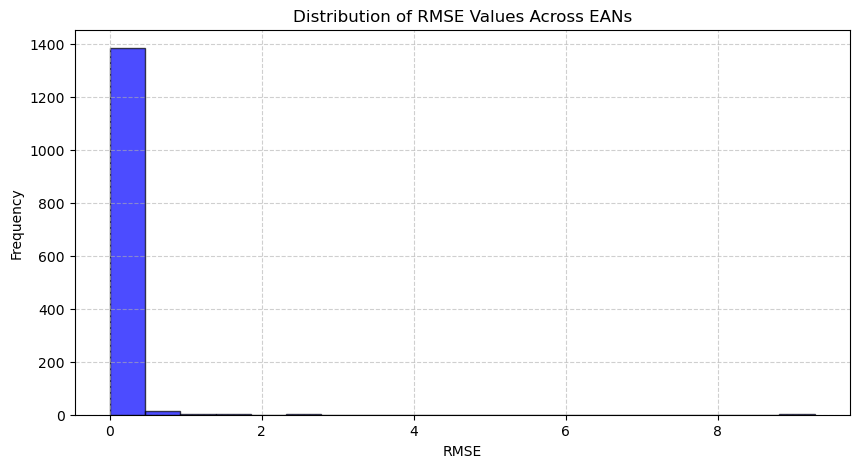

In [15]:
# Convert RMSE values to a NumPy array
knn_rmse_array = np.array(list(knn_rmse_values.values()))

# Compute statistics
mean_rmse = np.mean(knn_rmse_array)
median_rmse = np.median(knn_rmse_array)
std_rmse = np.std(knn_rmse_array)
min_rmse = np.min(knn_rmse_array)
max_rmse = np.max(knn_rmse_array)
percentile_75 = np.percentile(knn_rmse_array, 75)  # 75th percentile
percentile_90 = np.percentile(knn_rmse_array, 90)  # 90th percentile

# Print statistics
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Median RMSE: {median_rmse:.4f}")
print(f"Standard Deviation RMSE: {std_rmse:.4f}")
print(f"Minimum RMSE: {min_rmse:.4f}")
print(f"Maximum RMSE: {max_rmse:.4f}")
print(f"75th Percentile RMSE: {percentile_75:.4f}")
print(f"90th Percentile RMSE: {percentile_90:.4f}")

# Plot the distribution of RMSE values
plt.figure(figsize=(10, 5))
plt.hist(knn_rmse_array, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.title("Distribution of RMSE Values Across EANs")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [16]:
# 90th percentile is something around 1
# so setting a threshold = 1 is probably a good idea

High Error EANs Counts : 5
EAN 3552791573944.0 - Data Points: 58
                EAN  Total_Weekly_Consumption
count  5.800000e+01              5.800000e+01
mean   3.552792e+12              2.741379e+01
std    0.000000e+00              3.970330e+01
min    3.552792e+12              3.552714e-15
25%    3.552792e+12              3.552714e-15
50%    3.552792e+12              9.000000e+00
75%    3.552792e+12              4.600000e+01
max    3.552792e+12              1.910000e+02


C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3355352246.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Total_Weekly_Consumption"] = scaler.inverse_transform(


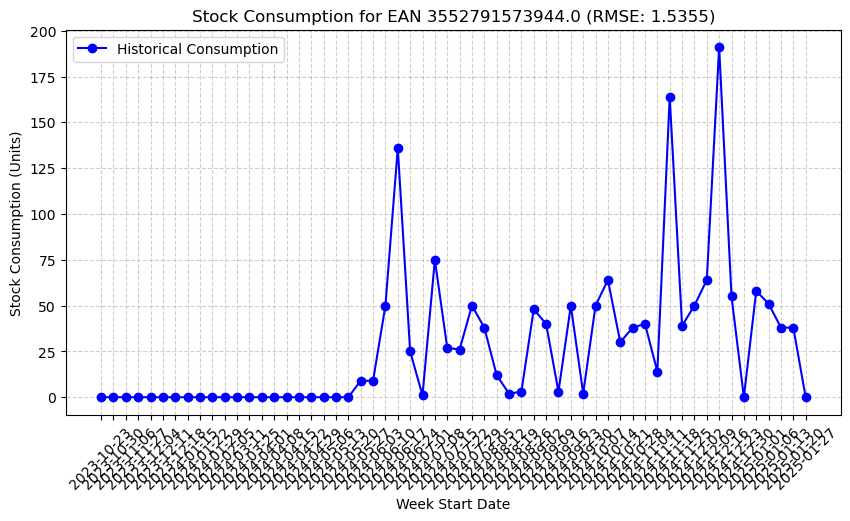

C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3355352246.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Total_Weekly_Consumption"] = scaler.inverse_transform(


EAN 4038372384266.0 - Data Points: 58
                EAN  Total_Weekly_Consumption
count  5.800000e+01              5.800000e+01
mean   4.038372e+12              3.660345e+01
std    0.000000e+00              3.604526e+01
min    4.038372e+12              3.552714e-15
25%    4.038372e+12              1.000000e+01
50%    4.038372e+12              3.300000e+01
75%    4.038372e+12              5.400000e+01
max    4.038372e+12              2.000000e+02


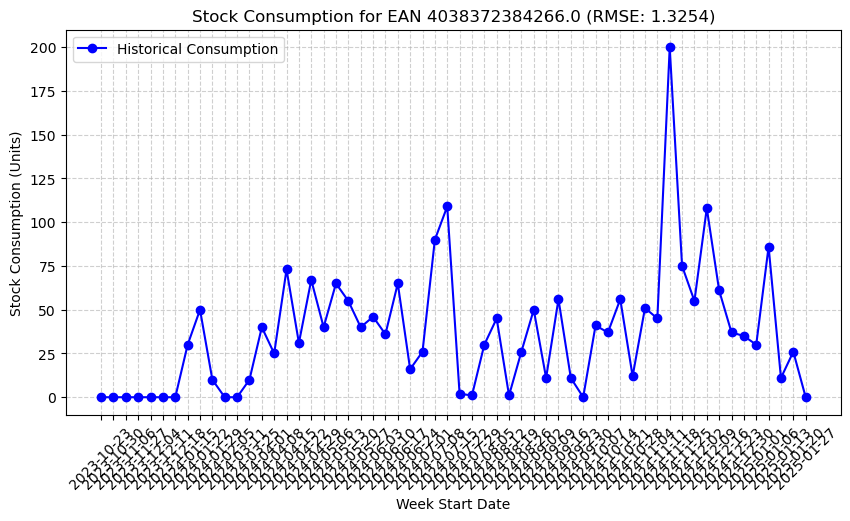

C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3355352246.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Total_Weekly_Consumption"] = scaler.inverse_transform(


EAN 4231814815510.0 - Data Points: 58
                EAN  Total_Weekly_Consumption
count  5.800000e+01              5.800000e+01
mean   4.231815e+12              2.284310e+02
std    0.000000e+00              2.435099e+02
min    4.231815e+12              3.552714e-15
25%    4.231815e+12              3.552714e-15
50%    4.231815e+12              2.355000e+02
75%    4.231815e+12              3.440000e+02
max    4.231815e+12              1.498000e+03


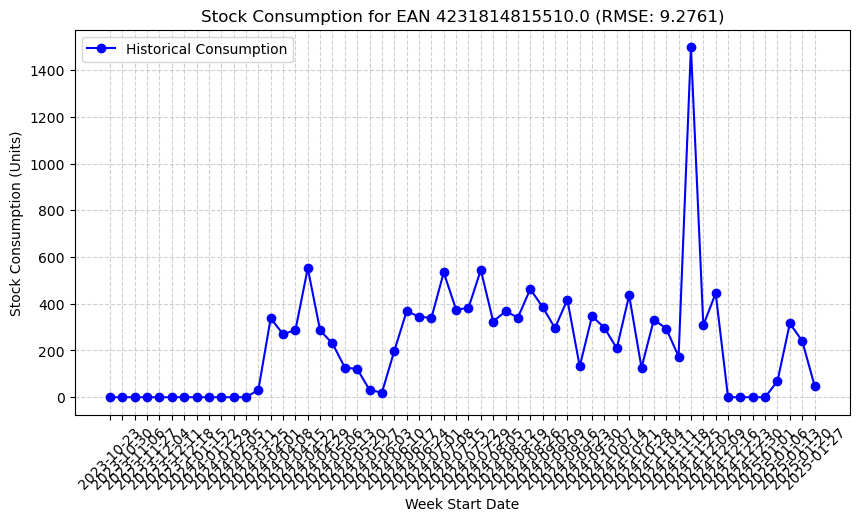

C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3355352246.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Total_Weekly_Consumption"] = scaler.inverse_transform(


EAN 6715860134022.0 - Data Points: 58
                EAN  Total_Weekly_Consumption
count  5.800000e+01              5.800000e+01
mean   6.715860e+12              2.479310e+01
std    0.000000e+00              2.957403e+01
min    6.715860e+12              3.552714e-15
25%    6.715860e+12              3.552714e-15
50%    6.715860e+12              1.650000e+01
75%    6.715860e+12              4.000000e+01
max    6.715860e+12              1.680000e+02


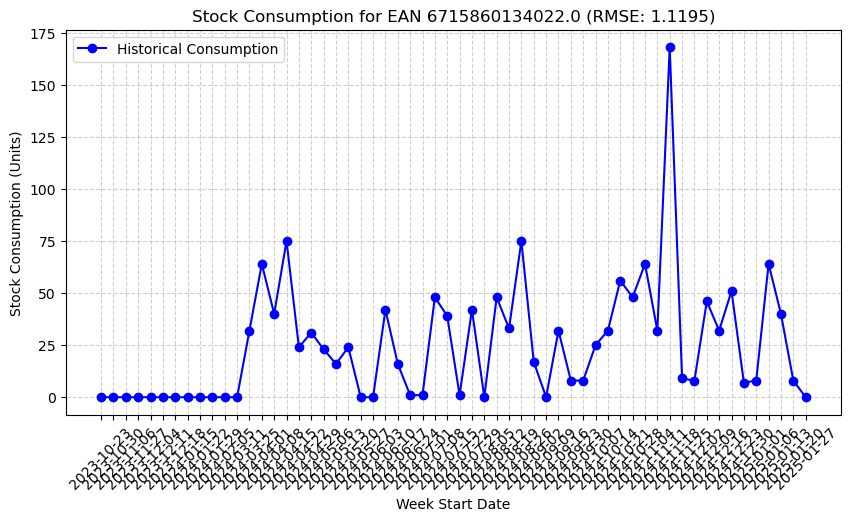

C:\Users\Dell\AppData\Local\Temp\ipykernel_16156\3355352246.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Total_Weekly_Consumption"] = scaler.inverse_transform(


EAN 8428820017374.0 - Data Points: 58
                EAN  Total_Weekly_Consumption
count  5.800000e+01              5.800000e+01
mean   8.428820e+12              9.456897e+01
std    0.000000e+00              7.867457e+01
min    8.428820e+12              3.552714e-15
25%    8.428820e+12              3.000000e+00
50%    8.428820e+12              9.700000e+01
75%    8.428820e+12              1.615000e+02
max    8.428820e+12              2.640000e+02


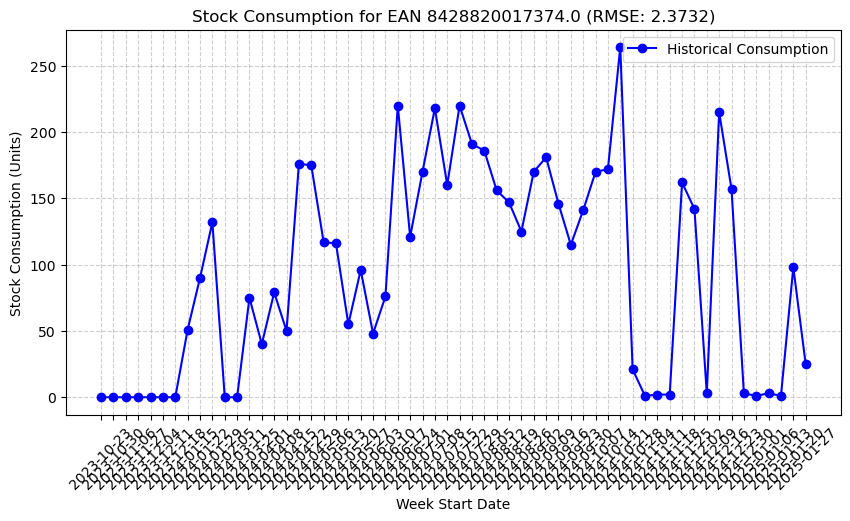

In [20]:
# Load the scaler
scaler = joblib.load("scaler.pkl")

threshold = 1

# Identify EANs with the highest RMSE values
high_error_eans = [ean for ean, rmse in knn_rmse_values.items() if rmse >= threshold]  

print(f"High Error EANs Counts : {len(high_error_eans)}")
# Analyze high-error EANs
for ean in high_error_eans:
    ean_data = df[df["EAN"] == ean]

    # Inverse transform the scaled data
    ean_data["Total_Weekly_Consumption"] = scaler.inverse_transform(
        ean_data[["Total_Weekly_Consumption"]].values.reshape(-1, 1)
    ).flatten()

    # Print summary statistics
    print(f"EAN {ean} - Data Points: {len(ean_data)}")
    print(ean_data.describe())  # Summary statistics

    # Plot historical consumption data
    plt.figure(figsize=(10, 5))
    plt.plot(ean_data["Week_Start"], ean_data["Total_Weekly_Consumption"], marker='o', linestyle='-', color='b', label="Historical Consumption")
    plt.xlabel("Week Start Date")
    plt.ylabel("Stock Consumption (Units)")
    plt.title(f"Stock Consumption for EAN {ean} (RMSE: {knn_rmse_values[ean]:.4f})")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

In [21]:
# Save KNN models and RMSE values
joblib.dump(knn_models, "knn_models_improved.pkl")
joblib.dump(knn_rmse_values, "knn_rmse_values_improved.pkl")

['knn_rmse_values_improved.pkl']

## RNN

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [9]:
# Load the data
df = pd.read_csv("weekly_consumption.csv")

In [10]:
# Dictionary to store models for each EAN
rnn_models = {}
rnn_rmse_values = {}  # Dictionary to store RMSE per EAN

# Load the saved scaler
scaler = joblib.load("scaler.pkl")

# Function to create sequences for RNN
def create_sequences(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

# Train an RNN model for each EAN
for ean in df["EAN"].unique():
    ean_data = df[df["EAN"] == ean]  # Filter data for specific EAN

    # Use only Total_Weekly_Consumption for RNN
    consumption_scaled = ean_data["Total_Weekly_Consumption"].values.reshape(-1, 1)

    # Create sequences for RNN
    timesteps = 3  # Use 3 weeks as input to predict the next week
    X, y = create_sequences(consumption_scaled, timesteps)

    # Train-test split (keep last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Reshape X_train and X_test for RNN input (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build RNN model
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=(timesteps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    # Store model
    rnn_models[ean] = model

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for this EAN
    rnn_rmse_values[ean] = rmse

    print(f"EAN {ean} - RNN RMSE: {rmse:.4f}")




1/1 [==============================] - 0s 170ms/step
EAN 1.0 - RNN RMSE: 0.0006
1/1 [==============================] - 0s 136ms/step
EAN 1013544381015.0 - RNN RMSE: 0.8302
1/1 [==============================] - 0s 133ms/step
EAN 1019421978364.0 - RNN RMSE: 0.0009
1/1 [==============================] - 0s 131ms/step
EAN 1024008213369.0 - RNN RMSE: 0.0018
1/1 [==============================] - 0s 128ms/step
EAN 1037601770462.0 - RNN RMSE: 0.0019
1/1 [==============================] - 0s 125ms/step
EAN 1042777655048.0 - RNN RMSE: 0.0009
1/1 [==============================] - 0s 145ms/step
EAN 1048540093755.0 - RNN RMSE: 0.0007
1/1 [==============================] - 0s 119ms/step
EAN 105685965293.0 - RNN RMSE: 0.0034
1/1 [==============================] - 0s 177ms/step
EAN 1062816480982.0 - RNN RMSE: 0.0004
1/1 [==============================] - 0s 126ms/step
EAN 1067813910580.0 - RNN RMSE: 0.0112
1/1 [==============================] - 0s 155ms/step
EAN 1075583423021.0 - RNN RMSE: 0.000

1/1 [==============================] - 0s 235ms/step
EAN 30705031098835.0 - RNN RMSE: 0.2632
1/1 [==============================] - 0s 207ms/step
EAN 30705031104253.0 - RNN RMSE: 0.7978
1/1 [==============================] - 0s 221ms/step
EAN 30705031113170.0 - RNN RMSE: 0.4609
1/1 [==============================] - 0s 233ms/step
EAN 30705031114207.0 - RNN RMSE: 0.2615
1/1 [==============================] - 0s 233ms/step
EAN 30705031114214.0 - RNN RMSE: 0.2578
1/1 [==============================] - 0s 219ms/step
EAN 30705031114221.0 - RNN RMSE: 0.0256
1/1 [==============================] - 0s 194ms/step
EAN 30705031114252.0 - RNN RMSE: 0.2632
1/1 [==============================] - 0s 204ms/step
EAN 30705031115488.0 - RNN RMSE: 0.2639
1/1 [==============================] - 0s 237ms/step
EAN 30705031116553.0 - RNN RMSE: 0.0075
1/1 [==============================] - 0s 251ms/step
EAN 30705031119400.0 - RNN RMSE: 0.1008
1/1 [==============================] - 0s 224ms/step
EAN 3070503112087

1/1 [==============================] - 2s 2s/step
EAN 3400931953173.0 - RNN RMSE: 0.0636
1/1 [==============================] - 0s 250ms/step
EAN 34009319531732.0 - RNN RMSE: 0.0003
1/1 [==============================] - 0s 207ms/step
EAN 3400931988014.0 - RNN RMSE: 0.0125
1/1 [==============================] - 0s 250ms/step
EAN 3400932070268.0 - RNN RMSE: 0.0224
1/1 [==============================] - 0s 234ms/step
EAN 3400932172146.0 - RNN RMSE: 0.0004
1/1 [==============================] - 0s 250ms/step
EAN 3400932299386.0 - RNN RMSE: 0.0148
1/1 [==============================] - 0s 250ms/step
EAN 3400932341641.0 - RNN RMSE: 0.0139
1/1 [==============================] - 0s 250ms/step
EAN 3400932459087.0 - RNN RMSE: 0.0065
1/1 [==============================] - 0s 187ms/step
EAN 3400932805433.0 - RNN RMSE: 0.0200
1/1 [==============================] - 0s 219ms/step
EAN 3400932862092.0 - RNN RMSE: 0.3194
1/1 [==============================] - 0s 250ms/step
EAN 3400932884506.0 - RNN RMS

1/1 [==============================] - 0s 204ms/step
EAN 3605874094468.0 - RNN RMSE: 0.0147
1/1 [==============================] - 0s 235ms/step
EAN 3605874173910.0 - RNN RMSE: 0.0012
1/1 [==============================] - 0s 174ms/step
EAN 3605874232020.0 - RNN RMSE: 0.0010
1/1 [==============================] - 0s 203ms/step
EAN 3605874350847.0 - RNN RMSE: 0.0001
1/1 [==============================] - 0s 266ms/step
EAN 3605874350854.0 - RNN RMSE: 0.0071
1/1 [==============================] - 0s 220ms/step
EAN 3605874403123.0 - RNN RMSE: 0.0024
1/1 [==============================] - 0s 235ms/step
EAN 3605874403130.0 - RNN RMSE: 0.0219
1/1 [==============================] - 0s 250ms/step
EAN 3605874403178.0 - RNN RMSE: 0.0011
1/1 [==============================] - 0s 188ms/step
EAN 3605874403185.0 - RNN RMSE: 0.0031
1/1 [==============================] - 0s 298ms/step
EAN 3605874403789.0 - RNN RMSE: 0.0075
1/1 [==============================] - 0s 250ms/step
EAN 3605874403888.0 - RNN R

1/1 [==============================] - 0s 219ms/step
EAN 3700572800028.0 - RNN RMSE: 0.0076
1/1 [==============================] - 0s 188ms/step
EAN 3700572800035.0 - RNN RMSE: 0.0099
1/1 [==============================] - 0s 203ms/step
EAN 3701126705547.0 - RNN RMSE: 0.0322
1/1 [==============================] - 0s 172ms/step
EAN 37011267111074.0 - RNN RMSE: 0.0332
1/1 [==============================] - 0s 234ms/step
EAN 3701362101356.0 - RNN RMSE: 0.0183
1/1 [==============================] - 0s 250ms/step
EAN 3701541300181.0 - RNN RMSE: 0.0010
1/1 [==============================] - 0s 173ms/step
EAN 3701637286109.0 - RNN RMSE: 0.2918
1/1 [==============================] - 0s 188ms/step
EAN 3723618082180.0 - RNN RMSE: 0.0896
1/1 [==============================] - 0s 188ms/step
EAN 3760087151572.0 - RNN RMSE: 0.0072
1/1 [==============================] - 0s 203ms/step
EAN 3760087153798.0 - RNN RMSE: 0.0542
1/1 [==============================] - 0s 204ms/step
EAN 3760098110018.0 - RNN 

1/1 [==============================] - 0s 188ms/step
EAN 4714116476994.0 - RNN RMSE: 0.0054
1/1 [==============================] - 0s 219ms/step
EAN 4719842159386.0 - RNN RMSE: 0.0150
1/1 [==============================] - 0s 234ms/step
EAN 4729298919537.0 - RNN RMSE: 0.0152
1/1 [==============================] - 0s 235ms/step
EAN 4731777992446.0 - RNN RMSE: 0.0086
1/1 [==============================] - 0s 234ms/step
EAN 4747402540592.0 - RNN RMSE: 0.0186
1/1 [==============================] - 0s 188ms/step
EAN 475925670937.0 - RNN RMSE: 0.0101
1/1 [==============================] - 0s 180ms/step
EAN 4759256709375.0 - RNN RMSE: 0.0011
1/1 [==============================] - 0s 203ms/step
EAN 4761879043052.0 - RNN RMSE: 0.0714
1/1 [==============================] - 0s 344ms/step
EAN 4769582168359.0 - RNN RMSE: 0.0160
1/1 [==============================] - 0s 203ms/step
EAN 4777155500226.0 - RNN RMSE: 0.0011
1/1 [==============================] - 0s 188ms/step
EAN 4781708287391.0 - RNN RM

1/1 [==============================] - 0s 187ms/step
EAN 5414736011691.0 - RNN RMSE: 0.0155
1/1 [==============================] - 0s 281ms/step
EAN 5414736011707.0 - RNN RMSE: 0.0123
1/1 [==============================] - 0s 188ms/step
EAN 5414736011721.0 - RNN RMSE: 0.0706
1/1 [==============================] - 0s 203ms/step
EAN 5414736018133.0 - RNN RMSE: 0.0074
1/1 [==============================] - 0s 234ms/step
EAN 5414736018140.0 - RNN RMSE: 0.0075
1/1 [==============================] - 0s 235ms/step
EAN 5414736018195.0 - RNN RMSE: 0.0188
1/1 [==============================] - 0s 234ms/step
EAN 5414736030234.0 - RNN RMSE: 0.0157
1/1 [==============================] - 0s 188ms/step
EAN 5414736030272.0 - RNN RMSE: 0.0494
1/1 [==============================] - 0s 187ms/step
EAN 5414736030319.0 - RNN RMSE: 0.0524
1/1 [==============================] - 0s 219ms/step
EAN 5414736030357.0 - RNN RMSE: 0.0105
1/1 [==============================] - 0s 203ms/step
EAN 5414736030395.0 - RNN R

1/1 [==============================] - 0s 203ms/step
EAN 6735837591057.0 - RNN RMSE: 0.0016
1/1 [==============================] - 0s 217ms/step
EAN 6740982376497.0 - RNN RMSE: 0.0109
1/1 [==============================] - 0s 204ms/step
EAN 6741162670497.0 - RNN RMSE: 0.0007
1/1 [==============================] - 0s 219ms/step
EAN 6791620550157.0 - RNN RMSE: 0.0267
1/1 [==============================] - 0s 234ms/step
EAN 6795502014448.0 - RNN RMSE: 0.0014
1/1 [==============================] - 0s 188ms/step
EAN 6798468516433.0 - RNN RMSE: 0.0020
1/1 [==============================] - 0s 203ms/step
EAN 6803326345283.0 - RNN RMSE: 0.0020
1/1 [==============================] - 0s 234ms/step
EAN 6837546379448.0 - RNN RMSE: 0.0005
1/1 [==============================] - 0s 250ms/step
EAN 6885232090303.0 - RNN RMSE: 0.0006
1/1 [==============================] - 0s 219ms/step
EAN 6906442338434.0 - RNN RMSE: 0.0037
1/1 [==============================] - 0s 188ms/step
EAN 6918300686459.0 - RNN R

1/1 [==============================] - 0s 250ms/step
EAN 8549220555804.0 - RNN RMSE: 0.0017
1/1 [==============================] - 0s 219ms/step
EAN 8553947275658.0 - RNN RMSE: 0.0478
1/1 [==============================] - 0s 187ms/step
EAN 8554469872684.0 - RNN RMSE: 0.0057
1/1 [==============================] - 0s 234ms/step
EAN 8570936782504.0 - RNN RMSE: 0.0042
1/1 [==============================] - 0s 219ms/step
EAN 8571860683375.0 - RNN RMSE: 0.0011
1/1 [==============================] - 0s 188ms/step
EAN 8584785487690.0 - RNN RMSE: 0.1118
1/1 [==============================] - 0s 266ms/step
EAN 8605871688312.0 - RNN RMSE: 0.0015
1/1 [==============================] - 0s 172ms/step
EAN 8607856378489.0 - RNN RMSE: 0.0081
1/1 [==============================] - 0s 234ms/step
EAN 8662539230451.0 - RNN RMSE: 0.0178
1/1 [==============================] - 0s 173ms/step
EAN 8663972506431.0 - RNN RMSE: 0.0014
1/1 [==============================] - 0s 172ms/step
EAN 8674456200456.0 - RNN R

1/1 [==============================] - 0s 57ms/step
Week 1 (2025-02-03) forecast for EAN 1013544381015.0: 25
Week 2 (2025-02-10) forecast for EAN 1013544381015.0: 9
Week 3 (2025-02-17) forecast for EAN 1013544381015.0: 21
Week 4 (2025-02-24) forecast for EAN 1013544381015.0: 15


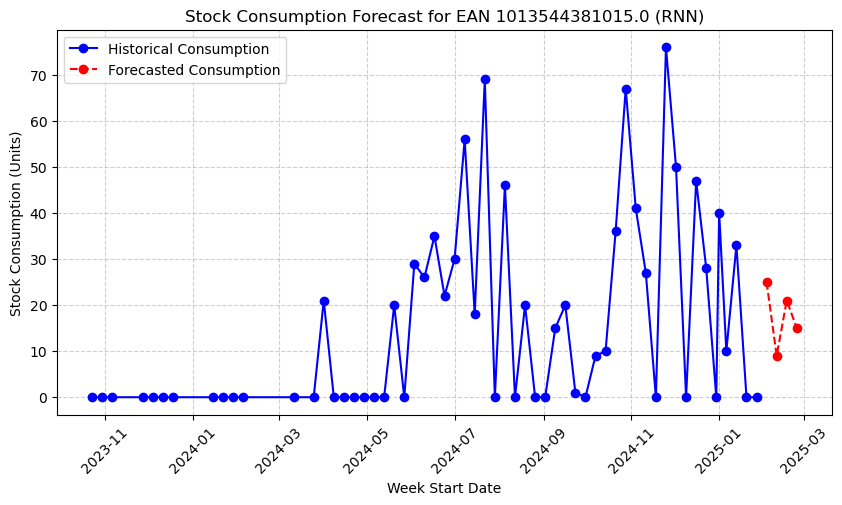

In [12]:
# Forecast for a specific EAN
ean = 1013544381015.0 

# Check if the RNN model for this EAN exists
if ean in rnn_models:
    rnn_model = rnn_models[ean]  # Get the pre-trained RNN model for this EAN

    # Filter data for the specific EAN
    ean_data = df[df["EAN"] == ean].copy()

    # Ensure 'Week_Start' is in datetime format
    ean_data["Week_Start"] = pd.to_datetime(ean_data["Week_Start"])

    # Use only Total_Weekly_Consumption for RNN
    consumption_scaled = ean_data["Total_Weekly_Consumption"].values.reshape(-1, 1)

    # Create sequences for RNN
    timesteps = 3
    X, y = create_sequences(consumption_scaled, timesteps)

    # Get the last sequence for forecasting
    last_sequence = X[-1].reshape((1, timesteps, 1))

    # Create future features for the next 4 weeks
    future_predictions_scaled = []
    future_dates = []  # To store the corresponding future weeks
    last_week_start = ean_data["Week_Start"].iloc[-1]  # Get last recorded date

    for i in range(1, 5):
        # Predict the next week's consumption (scaled)
        future_prediction_scaled = rnn_model.predict(last_sequence)[0][0]
        future_predictions_scaled.append(future_prediction_scaled)

        # Compute next week's start date
        next_week_start = last_week_start + pd.Timedelta(weeks=i)
        future_dates.append(next_week_start)

        # Update the sequence for the next prediction
        last_sequence = np.append(last_sequence[:, 1:, :], [[[future_prediction_scaled]]], axis=1)

    # Inverse transform the predictions to get actual values
    future_predictions = scaler.inverse_transform(
        np.array(future_predictions_scaled).reshape(-1, 1)
    ).flatten()

    # Convert to integer values
    future_predictions = np.round(future_predictions).astype(int)

    # Print the forecasted values
    for i, (date, prediction) in enumerate(zip(future_dates, future_predictions), start=1):
        print(f"Week {i} ({date.date()}) forecast for EAN {ean}: {prediction}")

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 5))

    # Plot past consumption data (already inverse transformed)
    plt.plot(ean_data["Week_Start"], scaler.inverse_transform(consumption_scaled).flatten(), marker='o', linestyle='-', color='b', label="Historical Consumption")

    # Plot forecasted future consumption data
    plt.plot(future_dates, future_predictions, marker='o', linestyle='--', color='r', label="Forecasted Consumption")

    # Formatting the plot
    plt.xlabel("Week Start Date")
    plt.ylabel("Stock Consumption (Units)")
    plt.title(f"Stock Consumption Forecast for EAN {ean} (RNN)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    # Show the plot
    plt.show()

else:
    print(f"No trained RNN model found for EAN {ean}.")

In [14]:
# Convert RMSE values to a NumPy array
rnn_rmse_array = np.array(list(rnn_rmse_values.values()))

# Compute Mean RMSE
rnn_mean_rmse = np.mean(rnn_rmse_array)
print(f"RNN Mean RMSE: {rnn_mean_rmse:.4f}")

# Compute Median RMSE
rnn_median_rmse = np.median(rnn_rmse_array)
print(f"RNN Median RMSE: {rnn_median_rmse:.4f}")

# Find Min and Max RMSE to detect best/worst cases
rnn_min_rmse = np.min(rnn_rmse_array)
rnn_max_rmse = np.max(rnn_rmse_array)

print(f"RNN Best EAN (lowest RMSE): {rnn_min_rmse:.4f}")
print(f"RNN Worst EAN (highest RMSE): {rnn_max_rmse:.4f}")

RNN Mean RMSE: 0.0547
RNN Median RMSE: 0.0085
RNN Best EAN (lowest RMSE): 0.0000
RNN Worst EAN (highest RMSE): 11.5106


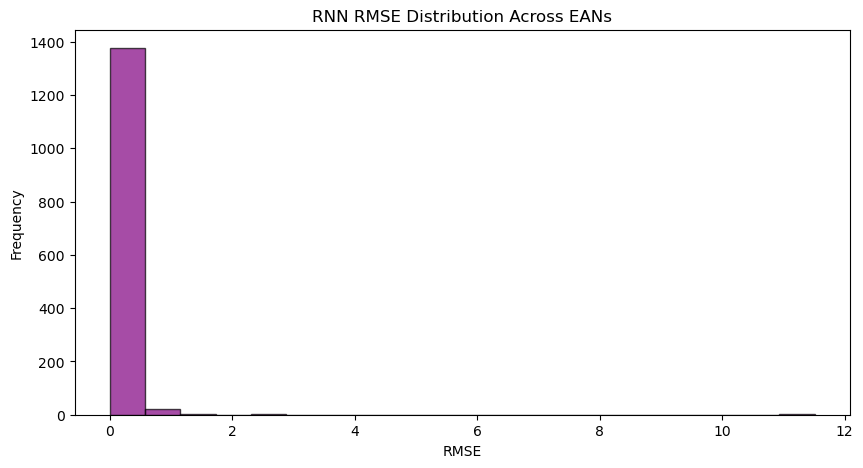

In [15]:
# Plot RMSE distribution
plt.figure(figsize=(10, 5))
plt.hist(rnn_rmse_array, bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.title("RNN RMSE Distribution Across EANs")
plt.show()

In [16]:
import os

# Create a directory to save RNN models
if not os.path.exists("rnn_models"):
    os.makedirs("rnn_models")

# Save each RNN model
for ean, model in rnn_models.items():
    model.save(f"rnn_models/rnn_model_{ean}.h5")

# Save RNN RMSE values
joblib.dump(rnn_rmse_values, "rnn_rmse_values.pkl")

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['rnn_rmse_values.pkl']

### RNN Model Conclusion